In [29]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
import pandas as pd
from scipy.signal import find_peaks
from scipy import signal

from scipy.signal import argrelextrema

40

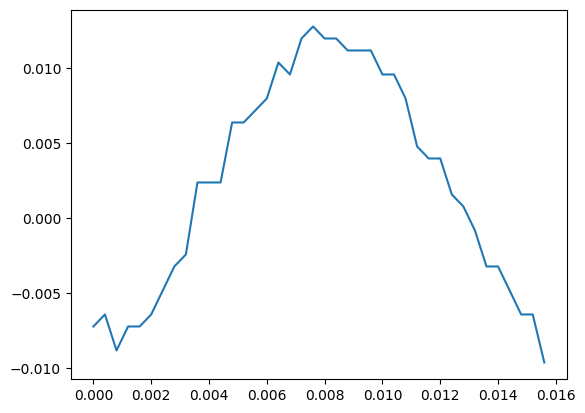

In [30]:
# Number of sample points
w = [-0.00720,-0.00640,-0.00880,-0.00720,-0.00720,-0.00640,-0.00480,-0.00320,-0.00240,0.00240,0.00240,0.00240,0.00640,0.00640,0.00720,0.00800,0.01040,0.00960,0.01200,0.01280,0.01200,0.01200,0.01120,0.01120,0.01120,0.00960,0.00960,0.00800,0.00480,0.00400,0.00400,0.00160,0.00080,-0.00080,-0.00320,-0.00320,-0.00480,-0.00640,-0.00640,-0.00960]
N = len(w)
fs = 2500
# sample spacing
T = 1 / fs
x = np.arange(0, N/fs, T)
y = np.array(w)
plt.figure()
plt.plot(x, y)
N

In [31]:
w = [-0.15200,-0.11200,-0.07200,-0.04000,-0.00800,0.02400,0.04800,1.01600,0.15200,0.20800,0.27200,0.33600,0.38400,0.44000,0.44000,0.42400,0.40800,0.41600,0.41600,0.40000,0.36000,0.30400,0.22400,0.14400,0.05600,-0.00800,-0.05600,-0.08000,-0.10400,-0.12800,-0.16800,-0.21600,-0.26400,-0.31200,-0.34400,-0.34400,-0.33600,-0.34400,-0.36000,-0.37600,-0.37600,-0.36000,-0.30400,-0.24800,-0.19200,-0.12000,-0.05600,0.00,0.05600,0.10400,0.16000,0.21600,0.28000,0.35200,0.41600,0.44800,0.44000,0.42400,0.42400,0.42400,0.41600,0.40000,0.34400,0.28800,0.20800,0.10400,0.03200,-0.03200,-0.06400,-0.08800,-0.11200,-0.16000,-0.19200,-0.24000,-0.28800,-0.32800,-0.35200,-0.34400,-0.32800,-0.33600,-0.36000,-0.37600,-0.36800,-0.34400,-0.28800,-0.22400,-0.16000,-0.09600,-0.03200,0.01600,0.06400,0.09600,0.16000,0.22400,0.29600,0.36000,0.42400,0.44800,0.44000,0.43200,0.41600,0.43200,0.41600,0.40000,0.33600,0.26400,0.18400,0.09600,0.02400,-0.04800,-0.07200,-0.10400,-0.12800,-0.16800,-0.22400,-0.27200,-0.32000,-0.34400,-0.35200,-0.33600,-0.32000,-0.33600,-0.36000,-0.36800,-0.36000,-0.32000,-0.24800,-0.19200,-0.12800,-0.07200,-0.02400,0.02400,0.07200,0.11200,0.16800,0.23200,0.30400,0.36000,0.42400,0.44000,0.42400,0.42400,0.42400,0.43200,0.41600,0.37600,0.33600,0.25600,0.16800,0.07200,0.00,-0.05600,-0.08800,-0.12000,-0.16000,-0.20000,-0.24800,-0.30400,-0.33600,-0.36000,-0.35200,-0.33600,-0.32000,-0.32800,-0.35200,-0.36000,-0.33600,-0.29600,-0.23200,-0.16800,-0.10400,-0.04800,0.00,0.04000,0.08000,0.12000,0.17600,0.24000,0.31200,0.37600,0.42400,0.44000,0.42400,0.41600,0.43200,0.43200,0.41600,0.36800,0.32000,0.23200,0.15200,0.06400,-0.00800,-0.05600,-0.09600,-0.12800,-0.17600,-0.23200,-0.28000,-0.32000,-0.36000,-0.36800,-0.36000,-0.32800,-0.32000,-0.34400,-0.35200,-0.36000,-0.32800,-0.26400,-0.20000,-0.12000,-0.07200,-0.03200,0.01600,0.05600,0.09600,0.12000,0.18400,0.25600,0.32800,0.37600,0.42400,0.42400,0.42400,0.41600,0.43200,0.44000,0.41600,0.36000,0.28800,0.22400,0.13600,0.04000,-0.01600,-0.06400,-0.10400,-0.15200,-0.19200,-0.24800,-0.29600,-0.33600,-0.36800,-0.37600,-0.36000,-0.34400,-0.34400,-0.35200,-0.35200,-0.34400,-0.30400,-0.23200,-0.16800,-0.10400,-0.04000,-0.00800,0.03200,0.06400,0.09600,0.14400,0.20000,0.26400,0.32800,0.40000,0.41600,0.41600,0.40800,0.42400,0.44000,0.44000,0.40800,0.36000,0.28800,0.20000,0.11200,0.03200,-0.02400,-0.06400,-0.11200,-0.16800,-0.22400,-0.26400,-0.32800,-0.36000,-0.38400,-0.38400,-0.36000,-0.33600,-0.34400,-0.36000,-0.34400,-0.32800,-0.28000,-0.20800,-0.12800,-0.06400,-0.01600,0.02400,0.04800,0.07200,0.11200,0.16000,0.20800,0.27200,0.33600,0.40000,0.40800,0.40800,0.41600,0.42400,0.44000,0.43200,0.40000,0.34400,0.26400,0.19200,0.09600,0.02400,-0.03200,-0.07200,-0.12000,-0.17600,-0.23200,-0.29600,-0.33600,-0.38400,-0.40800,-0.38400,-0.36000,-0.34400,-0.35200,-0.36000,-0.34400,-0.31200,-0.25600,-0.18400,-0.10400,-0.04000,0.01600,0.04000,0.06400,0.09600,0.12000,0.16800,0.22400,0.28000,0.34400,0.38400,0.40000,0.38400,0.40800,0.42400,0.44000,0.42400,0.37600,0.32000,0.24800,0.16800,0.08000,0.00800,-0.04000,-0.08000,-0.12800,-0.19200,-0.24800,-0.30400,-0.35200,-0.39200,-0.41600,-0.39200,-0.36000,-0.36000,-0.36800,-0.36000,-0.33600,-0.30400,-0.24000,-0.15200,-0.07200,-0.00800,0.03200,0.05600,0.08000,0.11200,0.14400,0.17600,0.24000,0.29600,0.34400,0.36800,0.38400,0.38400,0.40800,0.43200,0.44000,0.42400,0.37600,0.30400,0.23200,0.16000,0.07200,0.00,-0.04800,-0.08800,-0.14400,-0.20800,-0.26400,-0.32800,-0.36800,-0.40800,-0.41600,-0.38400,-0.36000,-0.36800,-0.36000,-0.36000,-0.32800,-0.28800,-0.20800,-0.12000,-0.04800,0.00800,0.05600,0.08000,0.10400,0.13600,0.15200,0.20000,0.25600,0.30400,0.36000,0.37600,0.37600,0.37600,0.40800,0.42400,0.43200,0.40800,0.36000,0.28800,0.21600,0.14400,0.05600,-0.00800,-0.05600,-0.09600,-0.16000,-0.22400,-0.28000,-0.34400,-0.37600,-0.42400,-0.42400,-0.39200,-0.36800,-0.36800,-0.36800,-0.36000,-0.32800,-0.26400,-0.18400,-0.09600,-0.03200,0.03200,0.06400,0.09600,0.12000,0.15200,0.17600,0.23200,0.28000,0.32000,0.36000,0.36000,0.36000,0.36800,0.40800,0.42400,0.41600,0.40000,0.32800,0.26400,0.20000,0.13600,0.04800,-0.02400,-0.06400,-0.10400,-0.16000,-0.22400,-0.29600,-0.35200,-0.39200,-0.41600,-0.41600,-0.38400,-0.37600,-0.39200,-0.38400,-0.36000,-0.31200,-0.24000,-0.16000,-0.07200,-0.00800,0.04800,0.08000,0.10400,0.13600,0.16800,0.20800,0.24800,0.29600,0.34400,0.36000,0.35200,0.36000,0.36000,0.40000,0.40800,0.40800,0.36800,0.32000,0.24800,0.17600,0.10400,0.04000,-0.02400,-0.07200,-0.11200,-0.16800,-0.23200,-0.29600,-0.36000,-0.41600,-0.43200,-0.40800,-0.38400,-0.38400,-0.39200,-0.37600,-0.35200,-0.30400,-0.22400,-0.12800,-0.05600,0.01600,0.06400,0.09600,0.11200,0.15200,0.18400,0.23200,0.27200,0.32000,0.36000,0.36000,0.36000,0.35200,0.36800,0.40000,0.40000,0.37600,0.33600,0.28000,0.22400,0.16000,0.08800,0.03200,-0.03200,-0.06400,-0.11200,-0.18400,-0.25600,-0.32000,-0.37600,-0.42400,-0.42400,-0.41600,-0.39200,-0.40800,-0.39200,-0.38400,-0.34400,-0.28000,-0.20800,-0.11200,-0.03200,0.03200,0.08800,0.10400,0.13600,0.16800,0.20000,0.24800,0.29600,0.33600,0.36800,0.36000,0.34400,0.36000,0.37600,0.40000,0.40000,0.36800,0.32000,0.25600,0.19200,0.12000,0.06400,0.01600,-0.03200,-0.07200,-0.12000,-0.19200,-0.25600,-0.32800,-0.37600,-0.42400,-0.41600,-0.40800,-0.40800,-0.40800,-0.41600,-0.36800,-0.32800,-0.26400,-0.18400,-0.09600,-0.01600,0.04000,0.08800,0.11200,0.15200,0.19200,0.23200,0.28000,0.31200,0.36000,0.36800,0.36000,0.33600,0.34400,0.36800,0.40000,0.37600,0.34400,0.28800,0.22400,0.16800,0.09600,0.04800,0.00,-0.04800,-0.08000,-0.12800,-0.20000,-0.27200,-0.33600,-0.38400,-0.42400,-0.41600,-0.39200,-0.40800,-0.41600,-0.39200,-0.36800,-0.32000,-0.24800,-0.16000,-0.07200,0.00,0.05600,0.09600,0.13600,0.16800,0.21600,0.26400,0.30400,0.34400,0.37600,0.36800,0.36000,0.34400,0.34400,0.37600,0.37600,0.36000,0.32800,0.26400,0.20000,0.14400,0.07200,0.02400,-0.01600,-0.05600,-0.09600,-0.14400,-0.20800,-0.28800,-0.34400,-0.39200,-0.42400,-0.40800,-0.39200,-0.40800,-0.41600,-0.40800,-0.36000,-0.31200,-0.23200,-0.14400,-0.06400,0.01600,0.06400,0.11200,0.14400,0.19200,0.23200,0.28000,0.32800,0.36800,0.40000,0.37600,0.36000,0.34400,0.35200,0.36000,0.36800,0.35200,0.29600,0.23200,0.16800,0.09600,0.04800,0.00800,-0.02400,-0.06400,-0.09600,-0.15200,-0.22400,-0.29600,-0.35200,-0.39200,-0.41600,-0.38400,-0.40800,-0.41600,-0.42400,-0.39200,-0.36000,-0.29600,-0.21600,-0.12000,-0.04800,0.02400,0.07200,0.11200,0.16000,0.20800,0.25600,0.30400,0.34400,0.38400,0.40800,0.38400,0.36000,0.35200,0.36000,0.36800,0.36000,0.32800,0.26400,0.20000,0.13600,0.07200,0.03200,-0.00800,-0.04000,-0.07200,-0.10400,-0.16800,-0.23200,-0.29600,-0.36000,-0.39200,-0.39200,-0.38400,-0.39200,-0.43200,-0.42400,-0.39200,-0.33600,-0.28000,-0.20000,-0.11200,-0.04000,0.03200,0.08000,0.12000,0.17600,0.22400,0.28000,0.33600,0.36800,0.40800,0.40800,0.38400,0.36800,0.36000,0.36800,0.36800,0.35200,0.31200,0.24800,0.16800,0.09600,0.04800,0.00800,-0.02400,-0.05600,-0.08000,-0.12000,-0.16800,-0.24800,-0.30400,-0.36000,-0.38400,-0.38400,-0.37600,-0.39200,-0.42400,-0.42400,-0.38400,-0.32800,-0.26400,-0.18400,-0.09600,-0.02400,0.04000,0.09600,0.14400,0.18400,0.24000,0.29600,0.34400,0.38400,0.42400,0.41600,0.40000,0.36800,0.36800,0.37600,0.36800,0.34400,0.29600,0.22400,0.14400,0.06400,0.02400,-0.02400,-0.04000,-0.06400,-0.09600,-0.12800,-0.19200,-0.24800,-0.31200,-0.36000,-0.36800,-0.37600,-0.37600,-0.40800,-0.42400,-0.41600,-0.37600,-0.32000,-0.24800,-0.16800,-0.08800,-0.00800,0.04000,0.09600,0.14400,0.20000,0.25600,0.30400,0.36800,0.40800,0.43200,0.41600,0.40000,0.37600,0.37600,0.37600,0.36000,0.32800,0.27200,0.20000,0.10400,0.04000,-0.00800,-0.04000,-0.05600,-0.08800,-0.10400,-0.15200,-0.20000,-0.26400,-0.32000,-0.36000,-0.36800,-0.36000,-0.37600,-0.40800,-0.42400,-0.40800,-0.36800,-0.29600,-0.23200,-0.16000,-0.07200,0.00,0.06400,0.10400,0.15200,0.20800,0.27200,0.32800,0.37600,0.42400,0.44000,0.41600,0.38400,0.37600,0.40000,0.38400,0.35200,0.32800,0.24800,0.16800,0.08000,0.01600,-0.03200,-0.05600,-0.08000,-0.09600,-0.12800,-0.16800,-0.23200,-0.28000,-0.32800,-0.35200,-0.35200,-0.35200,-0.36800,-0.40800,-0.41600,-0.38400,-0.34400,-0.28000,-0.20800,-0.12800,-0.06400,0.00800,0.07200,0.11200,0.16000,0.22400,0.28800,0.34400,0.38400,0.43200,0.43200,0.41600,0.40000,0.40000,0.40000,0.38400,0.35200,0.29600,0.22400,0.14400,0.05600,0.00,-0.04800,-0.07200,-0.09600,-0.11200,-0.15200,-0.20000,-0.24800,-0.29600,-0.33600,-0.34400,-0.33600,-0.35200,-0.37600,-0.40800,-0.39200,-0.37600,-0.33600,-0.26400,-0.20000,-0.12000,-0.04800,0.01600,0.07200,0.11200,0.16800,0.23200,0.29600,0.36000,0.41600,0.44000,0.43200,0.41600,0.40000,0.40800,0.40800,0.37600,0.34400,0.28000,0.20000,0.10400,0.03200,-0.01600,-0.06400,-0.08800,-0.11200,-0.12800,-0.16800,-0.21600,-0.26400,-0.32000,-0.33600,-0.35200,-0.33600,-0.34400,-0.36800,-0.39200,-0.38400,-0.35200,-0.29600,-0.24000,-0.18400,-0.10400,-0.03200,0.02400,0.08000,0.12000,0.17600,0.24800,0.31200,0.37600,0.42400,0.44800,0.43200,0.42400,0.40800,0.41600,0.40800,0.37600,0.33600,0.26400,0.17600,0.08800,0.01600,-0.04000,-0.07200,-0.09600,-0.11200,-0.15200,-0.19200,-0.24800,-0.29600,-0.32800,-0.35200,-0.33600,-0.32800,-0.34400,-0.36800,-0.38400,-0.37600,-0.33600,-0.28000,-0.20800,-0.15200,-0.08800,-0.03200,0.03200,0.08000,0.12000,0.19200,0.25600,0.32800,0.37600,0.44000,0.44000,0.44000,0.41600,0.41600,0.41600,0.41600,0.36800,0.32000,0.24000,0.16000,0.06400,-0.00800,-0.05600,-0.08000,-0.10400,-0.12800,-0.17600,-0.22400,-0.27200,-0.30400,-0.34400,-0.34400,-0.32800,-0.33600,-0.35200,-0.37600,-0.38400,-0.36000,-0.31200,-0.24800,-0.18400,-0.12000,-0.06400,-0.00800,0.04000,0.08800,0.13600,0.20000,0.26400,0.33600,0.40000,0.44000,0.44000,0.43200,0.41600,0.43200,0.43200,0.40800,0.36000,0.29600,0.22400,0.13600,0.04800,-0.01600,-0.06400,-0.08800,-0.12800,-0.16000,-0.20000,-0.24800,-0.29600,-0.33600,-0.35200,-0.34400,-0.32800,-0.32000,-0.35200,-0.36800,-0.36800,-0.34400,-0.27200,-0.22400,-0.16000,-0.09600,-0.04800,0.00,0.05600,0.09600,0.14400,0.20800,0.27200,0.33600,0.40800,0.43200,0.43200,0.42400,0.41600,0.43200,0.42400,0.40000,0.36000,0.28800,0.20000,0.10400,0.03200,-0.03200,-0.07200,-0.10400,-0.14400,-0.19200,-0.23200,-0.26400,-0.31200,-0.36000,-0.36000,-0.34400,-0.32000,-0.32800,-0.35200,-0.36800,-0.35200,-0.32000,-0.24800,-0.19200,-0.12800,-0.07200,-0.02400,0.02400,0.06400,0.10400,0.15200,0.20800,0.28800,0.34400,0.41600,0.43200,0.42400,0.41600,0.42400,0.43200,0.42400,0.40800,0.33600,0.26400,0.18400,0.09600,0.01600,-0.04000,-0.08000,-0.11200,-0.16000,-0.20800,-0.25600,-0.29600,-0.34400,-0.36800,-0.36000,-0.35200,-0.32800,-0.32800,-0.35200,-0.35200,-0.32800,-0.29600,-0.22400,-0.16000,-0.09600,-0.04800,-0.00800,0.03200,0.07200,0.11200,0.16000,0.22400,0.30400,0.36000,0.41600,0.43200,0.41600,0.41600,0.42400,0.44000,0.43200,0.40000,0.32800,0.24800,0.16800,0.08000,0.00800,-0.04800,-0.08800,-0.12000,-0.17600,-0.23200,-0.27200,-0.32000,-0.36000,-0.37600,-0.36800,-0.35200,-0.34400,-0.34400,-0.35200,-0.35200,-0.32000,-0.26400,-0.19200,-0.12000,-0.07200,-0.02400,0.00800,0.04800,0.08000,0.12000,0.16800,0.22400,0.30400,0.36800,0.41600,0.42400,0.40800,0.41600,0.43200,0.44000,0.42400,0.37600,0.32000,0.23200,0.16000,0.06400,0.00,-0.05600,-0.09600,-0.14400,-0.19200,-0.24800,-0.29600,-0.33600,-0.37600,-0.39200,-0.37600,-0.35200,-0.34400,-0.35200,-0.35200,-0.32800,-0.30400,-0.24000,-0.16000,-0.08800,-0.04000,0.00,0.03200,0.06400,0.09600,0.13600,0.17600,0.24800,0.31200,0.36800,0.40000,0.40800,0.40800,0.42400,0.44000,0.43200,0.41600,0.36800,0.29600,0.22400,0.14400,0.05600,-0.00800,-0.05600,-0.10400,-0.16000,-0.20800,-0.26400,-0.32800,-0.35200,-0.40800,-0.40800,-0.36000,-0.34400,-0.35200,-0.35200,-0.35200,-0.33600,-0.28000,-0.20800,-0.12800,-0.06400,-0.00800,0.03200,0.05600,0.08000,0.10400,0.15200,0.19200,0.26400,0.32000,0.36800,0.40000,0.40000,0.40000,0.41600,0.43200,0.43200,0.40800,0.35200,0.28000,0.20000,0.12000,0.04000,-0.01600,-0.06400,-0.10400,-0.16800,-0.22400,-0.28800,-0.33600,-0.37600,-0.41600,-0.40800,-0.37600,-0.35200,-0.36000,-0.36000,-0.34400,-0.32000,-0.27200,-0.19200,-0.10400,-0.04000,0.01600,0.04800,0.07200,0.09600,0.12000,0.16000,0.20800,0.27200,0.32800,0.36800,0.38400,0.38400,0.40000,0.41600,0.44000,0.43200,0.40000,0.33600,0.26400,0.19200,0.10400,0.03200,-0.03200,-0.07200,-0.12000,-0.17600,-0.24000,-0.30400,-0.35200,-0.40800,-0.42400,-0.40800,-0.37600,-0.36800,-0.36800,-0.36000,-0.35200,-0.31200,-0.24800,-0.16000,-0.07200,-0.01600,0.03200,0.06400,0.08800,0.11200,0.14400,0.18400,0.23200,0.28000,0.34400,0.36000,0.36800,0.36800,0.38400,0.41600,0.43200,0.42400,0.38400,0.32000,0.24000,0.16800,0.08800,0.02400,-0.04000,-0.08000,-0.12800,-0.19200,-0.24800,-0.31200,-0.36800,-0.40800,-0.42400,-0.40800,-0.37600,-0.36800,-0.37600,-0.36800,-0.34400,-0.29600,-0.22400,-0.12800,-0.05600,0.00800,0.05600,0.08800,0.10400,0.13600,0.16800,0.20000,0.25600,0.30400,0.34400,0.36000,0.36000,0.36000,0.37600,0.42400,0.42400,0.40800,0.36800,0.29600,0.23200,0.16000,0.08000,0.00800,-0.04000,-0.08800,-0.12800,-0.20000,-0.25600,-0.32800,-0.37600,-0.42400,-0.42400,-0.39200,-0.38400,-0.38400,-0.39200,-0.36800,-0.33600,-0.27200,-0.20000,-0.11200,-0.03200,0.02400,0.06400,0.09600,0.12000,0.15200,0.17600,0.22400,0.28000,0.32800,0.36000,0.36000,0.36000,0.35200,0.38400,0.41600,0.41600,0.38400,0.33600,0.27200,0.20800,0.14400,0.06400,0.00800,-0.05600,-0.08800,-0.15200,-0.20800,-0.27200,-0.33600,-0.39200,-0.42400,-0.42400,-0.39200,-0.38400,-0.39200,-0.39200,-0.36000,-0.32000,-0.26400,-0.17600,-0.08000,-0.00800,0.03200,0.08000,0.10400,0.13600,0.16800,0.20000,0.25600,0.29600,0.33600,0.36000,0.36000,0.34400,0.36800,0.38400,0.40000,0.40800,0.36000,0.30400,0.24800,0.18400,0.11200,0.05600,0.00,-0.05600,-0.08800,-0.15200,-0.21600,-0.28800,-0.35200,-0.41600,-0.43200,-0.42400,-0.40800,-0.40800,-0.41600,-0.38400,-0.36000,-0.32000,-0.24800,-0.15200,-0.06400,0.00800,0.06400,0.09600,0.11200,0.15200,0.19200,0.23200,0.28000,0.32800,0.36000,0.36800,0.35200,0.34400,0.36800,0.40000,0.40000,0.40000,0.34400,0.28000,0.21600,0.16000,0.09600,0.03200,-0.02400,-0.06400,-0.09600,-0.16000,-0.23200,-0.30400,-0.36000,-0.41600,-0.43200,-0.42400,-0.39200,-0.39200,-0.41600,-0.38400,-0.36000,-0.30400,-0.21600,-0.12800,-0.04800,0.02400,0.06400,0.09600,0.13600,0.17600,0.21600,0.26400,0.29600,0.34400,0.36800,0.36800,0.35200,0.33600,0.36000,0.37600,0.40000,0.36000,0.31200,0.24800,0.19200,0.13600,0.07200,0.02400,-0.03200,-0.06400,-0.10400,-0.16800,-0.24000,-0.31200,-0.37600,-0.41600,-0.42400,-0.40800,-0.40800,-0.41600,-0.42400,-0.39200,-0.34400,-0.28800,-0.20000,-0.11200,-0.02400,0.04000,0.08000,0.11200,0.16000,0.19200,0.24000,0.28800,0.32800,0.36000,0.37600,0.36800,0.35200,0.34400,0.36000,0.37600,0.38400,0.34400,0.28800,0.22400,0.16800,0.09600,0.04800,0.00,-0.04000,-0.08000,-0.11200,-0.18400,-0.24800,-0.31200,-0.38400,-0.41600,-0.41600,-0.39200,-0.39200,-0.42400,-0.41600,-0.38400,-0.33600,-0.26400,-0.18400,-0.09600,-0.01600,0.04800,0.09600,0.13600,0.17600,0.21600,0.25600,0.30400,0.34400,0.38400,0.38400,0.36800,0.34400,0.34400,0.36800,0.37600,0.36800,0.32800,0.25600,0.19200,0.13600,0.07200,0.03200,-0.00800,-0.04800,-0.08000,-0.12800,-0.19200,-0.26400,-0.32800,-0.37600,-0.40800,-0.39200,-0.40800,-0.40800,-0.42400,-0.41600,-0.37600,-0.32000,-0.24000,-0.16800,-0.08000,-0.00800,0.05600,0.09600,0.14400,0.18400,0.23200,0.28800,0.32800,0.37600,0.40000,0.38400,0.36800,0.36000,0.36000,0.36800,0.36000,0.34400,0.29600,0.23200,0.16800,0.09600,0.04800,0.00800,-0.02400,-0.06400,-0.09600,-0.12800,-0.20000,-0.26400,-0.33600,-0.38400,-0.38400,-0.39200,-0.39200,-0.41600,-0.42400,-0.41600,-0.36800,-0.31200,-0.23200,-0.15200,-0.06400,0.00800,0.06400,0.10400,0.16000,0.20800,0.25600,0.30400,0.35200,0.40000,0.41600,0.40000,0.37600,0.36000,0.36000,0.37600,0.36000,0.33600,0.27200,0.20000,0.13600,0.06400,0.02400,-0.00800,-0.04000,-0.07200,-0.10400,-0.15200,-0.20800,-0.28000,-0.34400,-0.37600,-0.38400,-0.38400,-0.39200,-0.42400,-0.42400,-0.40800,-0.36000,-0.29600,-0.21600,-0.12800,-0.05600,0.02400,0.06400,0.11200,0.16800,0.21600,0.27200,0.32000,0.36800,0.40800,0.42400,0.40000,0.36800,0.36000,0.37600,0.37600,0.35200,0.32800,0.25600,0.16800,0.09600,0.04000,-0.00800,-0.03200,-0.05600,-0.08000,-0.11200,-0.16000,-0.22400,-0.28800,-0.34400,-0.36800,-0.36800,-0.36800,-0.39200,-0.41600,-0.42400,-0.40800,-0.34400,-0.27200,-0.20000,-0.12000,-0.04800,0.02400,0.07200,0.11200,0.17600,0.23200,0.29600,0.34400,0.38400,0.42400,0.41600,0.40000,0.37600,0.37600,0.37600,0.37600,0.34400,0.30400,0.23200,0.14400,0.07200,0.01600,-0.03200,-0.04800,-0.06400,-0.08800,-0.12800,-0.17600,-0.24000,-0.30400,-0.35200,-0.36800,-0.36000,-0.36000,-0.39200,-0.42400,-0.41600,-0.38400,-0.33600,-0.26400,-0.19200,-0.10400,-0.03200,0.03200,0.08800,0.12000,0.19200,0.24800,0.30400,0.36000,0.40800,0.43200,0.42400,0.40800,0.40000,0.37600,0.38400,0.37600,0.33600,0.28800,0.20000,0.11200,0.04000,-0.00800,-0.04800,-0.07200,-0.08800,-0.12000,-0.16000,-0.20000,-0.25600,-0.31200,-0.33600,-0.35200,-0.35200,-0.36800,-0.38400,-0.42400,-0.41600,-0.36800,-0.30400,-0.24000,-0.17600,-0.08800,-0.01600,0.04800,0.08800,0.15200,0.20000,0.26400,0.32800,0.36000,0.42400,0.44000,0.42400,0.40800,0.40800,0.40000,0.40000,0.36000,0.32800,0.26400,0.17600,0.08800,0.01600,-0.03200,-0.06400,-0.08800,-0.10400,-0.12800,-0.17600,-0.23200,-0.26400,-0.32000,-0.34400,-0.33600,-0.35200,-0.35200,-0.39200,-0.41600,-0.39200,-0.35200,-0.29600,-0.23200,-0.16000,-0.08000,-0.00800,0.05600,0.09600,0.15200,0.20800,0.27200,0.34400,0.38400,0.43200,0.44000,0.42400,0.40800,0.40000,0.40800,0.40000,0.36800,0.31200,0.24000,0.15200,0.06400,0.00,-0.04800,-0.08000,-0.09600,-0.11200,-0.15200,-0.20000,-0.24800,-0.29600,-0.33600,-0.33600,-0.33600,-0.34400,-0.36000,-0.38400,-0.39200,-0.36000,-0.32800,-0.27200,-0.20800,-0.12800,-0.06400,0.00,0.06400,0.09600,0.16000,0.20800,0.28800,0.34400,0.40800,0.44000,0.44000,0.42400,0.40800,0.40800,0.41600,0.38400,0.36000,0.29600,0.21600,0.11200,0.04000,-0.01600,-0.05600,-0.08000,-0.10400,-0.12800,-0.17600,-0.22400,-0.27200,-0.32000,-0.34400,-0.34400,-0.32800,-0.33600,-0.36000,-0.38400,-0.38400,-0.36000,-0.30400,-0.24000,-0.18400,-0.11200,-0.04800,0.00800,0.06400,0.10400,0.16000,0.22400,0.29600,0.36000,0.42400,0.44000,0.44000,0.41600,0.41600,0.41600,0.41600,0.38400,0.33600,0.27200,0.19200,0.09600,0.01600,-0.03200,-0.07200,-0.09600,-0.12000,-0.16000,-0.20000,-0.24800,-0.29600,-0.33600,-0.34400,-0.34400,-0.34400,-0.33600,-0.36800,-0.37600,-0.37600,-0.34400,-0.27200,-0.20800,-0.15200,-0.08800,-0.03200,0.01600,0.07200,0.10400,0.16800,0.24000,0.30400,0.37600,0.42400,0.44800,0.43200,0.42400,0.41600,0.43200,0.41600,0.40000,0.32800,0.25600,0.17600,0.08000,0.00800,-0.04800,-0.07200,-0.11200,-0.14400,-0.18400,-0.23200,-0.28000,-0.31200,-0.35200,-0.35200,-0.32800,-0.32000,-0.34400,-0.36800,-0.37600,-0.35200,-0.31200,-0.24800,-0.19200,-0.12000,-0.07200,-0.01600,0.03200,0.08000,0.11200,0.17600,0.24800,0.31200,0.37600,0.42400,0.43200,0.43200,0.41600,0.43200,0.43200,0.42400,0.36800,0.32000,0.23200,0.16000,0.06400,-0.00800,-0.05600,-0.08800,-0.12800,-0.16800,-0.20800,-0.25600,-0.29600,-0.33600,-0.36000,-0.34400,-0.32800,-0.32800,-0.32800,-0.36000,-0.36800,-0.33600,-0.28800,-0.21600,-0.16000,-0.09600,-0.04800,0.00,0.04800,0.08800,0.12000,0.19200,0.25600,0.32800,0.38400,0.43200,0.42400,0.42400,0.42400,0.43200,0.43200,0.41600,0.36000,0.31200,0.22400,0.13600,0.04800,-0.01600,-0.06400,-0.10400,-0.14400,-0.19200,-0.23200,-0.28000,-0.32800,-0.36000,-0.37600,-0.36000,-0.33600,-0.32800,-0.35200,-0.34400,-0.35200,-0.32000,-0.26400,-0.18400,-0.12000,-0.06400,-0.02400,0.02400,0.06400,0.09600,0.14400,0.19200,0.26400,0.32800,0.40000,0.42400,0.42400,0.42400,0.41600,0.44000,0.43200,0.40800,0.35200,0.28000,0.20800,0.11200,0.03200,-0.02400,-0.07200,-0.11200,-0.16000,-0.20800,-0.25600,-0.30400,-0.33600,-0.37600,-0.36800,-0.36000,-0.34400,-0.33600,-0.35200,-0.36000,-0.34400,-0.29600,-0.22400,-0.16000,-0.08800,-0.04000,0.00,0.03200,0.07200,0.10400,0.15200,0.20000,0.28000,0.33600,0.40000,0.41600,0.41600,0.41600,0.42400,0.44000,0.43200,0.40000,0.34400,0.26400,0.19200,0.10400,0.02400,-0.03200,-0.07200,-0.11200,-0.16800,-0.23200,-0.28000,-0.32800,-0.36800,-0.39200,-0.38400,-0.36000,-0.34400,-0.34400,-0.36000,-0.34400,-0.32000,-0.27200,-0.20000,-0.12800,-0.05600,-0.01600,0.01600,0.04800,0.08000,0.11200,0.16000,0.21600,0.28000,0.34400,0.40000,0.41600,0.40800,0.40800,0.44000,0.44000,0.43200,0.40000,0.32800,0.25600,0.17600,0.08800,0.01600,-0.04800,-0.08800,-0.12800,-0.18400,-0.24000,-0.29600,-0.35200,-0.38400,-0.40800,-0.38400,-0.36000,-0.34400,-0.35200,-0.35200,-0.34400,-0.32000,-0.24800,-0.17600,-0.09600,-0.03200,0.00800,0.04800,0.06400,0.09600,0.12000,0.16800,0.22400,0.29600,0.36000,0.40000,0.40000,0.40000,0.40800,0.43200,0.44800,0.42400,0.37600,0.31200,0.23200,0.16000,0.07200,0.00,-0.04800,-0.08800,-0.14400,-0.20000,-0.25600,-0.30400,-0.36000,-0.40800,-0.41600,-0.38400,-0.36800,-0.35200,-0.36000,-0.35200,-0.32800,-0.29600,-0.22400,-0.12800,-0.06400,0.00,0.03200,0.06400,0.08800,0.11200,0.14400,0.18400,0.24000,0.30400,0.36000,0.37600,0.38400,0.38400,0.40800,0.43200,0.44000,0.41600,0.36800,0.28800,0.22400,0.14400,0.06400,-0.00800,-0.05600,-0.09600,-0.16000,-0.20800,-0.27200,-0.32800,-0.36800,-0.40800,-0.40800,-0.39200,-0.36800,-0.36000,-0.36000,-0.35200,-0.32800,-0.28000,-0.20000,-0.11200,-0.04000,0.01600,0.05600,0.08000,0.10400,0.13600,0.16800,0.20800,0.26400,0.32000,0.36000,0.36800,0.36800,0.37600,0.40800,0.43200,0.43200,0.40000,0.34400,0.28000,0.20000,0.12000,0.04800,-0.01600,-0.06400,-0.10400,-0.16800,-0.23200,-0.28800,-0.34400,-0.39200,-0.42400,-0.41600,-0.38400,-0.36800,-0.36800,-0.36000,-0.36000,-0.32000,-0.25600,-0.17600,-0.08800,-0.01600,0.03200,0.06400,0.09600,0.11200,0.15200,0.18400,0.23200,0.28800,0.32800,0.36000,0.36000,0.36000,0.36800,0.40000,0.42400,0.40800,0.37600,0.32800,0.26400,0.20000,0.10400,0.04000,-0.02400,-0.06400,-0.11200,-0.16800,-0.24000,-0.29600,-0.36000,-0.41600,-0.42400,-0.41600,-0.39200,-0.38400,-0.38400,-0.38400,-0.35200,-0.31200,-0.23200,-0.15200,-0.06400,0.00,0.04800,0.08000,0.11200,0.13600,0.16800,0.20800,0.26400,0.30400,0.34400,0.36000,0.36000,0.36000,0.36800,0.40800,0.41600,0.40800,0.36000,0.30400,0.24000,0.17600,0.09600,0.03200,-0.03200,-0.08000,-0.11200,-0.18400,-0.24800,-0.31200,-0.36800,-0.42400,-0.42400,-0.40800,-0.38400,-0.39200,-0.38400,-0.37600,-0.34400,-0.28800,-0.20800,-0.12000,-0.04000,0.01600,0.06400,0.09600,0.12000,0.16000,0.18400,0.23200,0.28000,0.32800,0.35200,0.36000,0.36000,0.35200,0.37600,0.40000,0.40800,0.37600,0.33600,0.28000,0.20800,0.15200,0.08000,0.01600,-0.04000,-0.08000,-0.12000,-0.19200,-0.27200,-0.32800,-0.38400,-0.42400,-0.43200,-0.40800,-0.40800,-0.39200,-0.40800,-0.36800,-0.33600,-0.28000,-0.19200,-0.09600,-0.01600,0.04000,0.08000,0.10400,0.14400,0.16800,0.20800,0.26400,0.30400,0.34400,0.36800,0.36800,0.35200,0.36000,0.37600,0.40000,0.40000,0.36800,0.30400,0.24800,0.19200,0.11200,0.05600,0.00800,-0.04000,-0.07200,-0.12800,-0.20000,-0.27200,-0.33600,-0.38400,-0.42400,-0.42400,-0.39200,-0.39200,-0.40800,-0.40800,-0.36800,-0.33600,-0.24800,-0.16800,-0.08000,0.00,0.04800,0.08800,0.11200,0.16000,0.20000,0.24000,0.28000,0.32800,0.36000,0.36800,0.36000,0.33600,0.34400,0.36800,0.40000,0.37600,0.33600,0.28000,0.21600,0.16000,0.09600,0.04000,-0.00800,-0.04800,-0.08800,-0.14400,-0.21600,-0.28800,-0.35200,-0.40800,-0.42400,-0.42400,-0.40800,-0.39200,-0.42400,-0.40800,-0.36800,-0.31200,-0.24000,-0.15200,-0.06400,0.00800,0.06400,0.10400,0.14400,0.17600,0.22400,0.26400,0.32000,0.34400,0.38400,0.37600,0.36000,0.34400,0.36000,0.37600,0.37600,0.36000,0.32000,0.24800,0.18400,0.13600,0.06400,0.02400,-0.02400,-0.06400,-0.09600,-0.15200,-0.22400,-0.29600,-0.36000,-0.40800,-0.41600,-0.40800,-0.38400,-0.41600,-0.41600,-0.39200,-0.36000,-0.30400,-0.22400,-0.12800,-0.04800,0.02400,0.07200,0.11200,0.15200,0.20000,0.24000,0.28800,0.33600,0.36800,0.40000,0.36800,0.36000,0.33600,0.36800,0.36800,0.36800,0.35200,0.29600,0.22400,0.16000,0.09600,0.04800,0.00,-0.03200,-0.07200,-0.10400,-0.16800,-0.23200,-0.31200,-0.36800,-0.39200,-0.40800,-0.39200,-0.39200,-0.42400,-0.42400,-0.39200,-0.35200,-0.28000,-0.20000,-0.12000,-0.04000,0.02400,0.08000,0.12000,0.16000,0.20800,0.26400,0.30400,0.36000,0.40000,0.40000,0.37600,0.36000,0.35200,0.36000,0.36800,0.36000,0.32800,0.25600,0.19200,0.12000,0.06400,0.02400,-0.00800,-0.04800,-0.08000,-0.11200,-0.17600,-0.24000,-0.31200,-0.37600,-0.39200,-0.39200,-0.38400,-0.40800,-0.42400,-0.42400,-0.39200,-0.32800,-0.26400,-0.19200,-0.09600,-0.02400,0.04000,0.08000,0.12000,0.18400,0.23200,0.28800,0.33600,0.37600,0.40000,0.40800,0.37600,0.36800,0.36000,0.37600,0.36800,0.35200,0.30400,0.23200,0.16000,0.08800,0.04000,0.00800,-0.03200,-0.06400,-0.08800,-0.12000,-0.18400,-0.24800,-0.32000,-0.37600,-0.39200,-0.38400,-0.38400,-0.41600,-0.43200,-0.41600,-0.37600,-0.32800,-0.25600,-0.16800,-0.08800,-0.00800,0.04000,0.09600,0.14400,0.20000,0.24800,0.29600,0.34400,0.40000,0.41600,0.41600,0.37600,0.36000,0.36800,0.36800,0.36000,0.33600,0.28000,0.20800,0.13600,0.06400,0.00800,-0.02400,-0.04800,-0.08000,-0.10400,-0.12800,-0.20000,-0.26400,-0.32000,-0.36800,-0.37600,-0.36800,-0.38400,-0.40800,-0.42400,-0.41600,-0.37600,-0.30400,-0.23200,-0.16000,-0.07200,0.00,0.05600,0.09600,0.15200,0.20800,0.26400,0.31200,0.37600,0.40800,0.42400,0.40800,0.38400,0.36800,0.37600,0.37600,0.36000,0.32800,0.26400,0.18400,0.09600,0.03200,-0.00800,-0.04000,-0.06400,-0.08800,-0.12000,-0.16000,-0.20800,-0.27200,-0.32800,-0.36000,-0.36800,-0.36000,-0.38400,-0.40800,-0.42400,-0.39200,-0.36000,-0.28800,-0.22400,-0.14400,-0.05600,0.00800,0.06400,0.10400,0.16000,0.21600,0.27200,0.32800,0.37600,0.43200,0.43200,0.41600,0.38400,0.37600,0.38400,0.37600,0.36000,0.31200,0.23200,0.15200,0.07200,0.00800,-0.03200,-0.06400,-0.08800,-0.10400,-0.12800,-0.17600,-0.23200,-0.28800,-0.32800,-0.36000,-0.36000,-0.35200,-0.37600,-0.41600,-0.40800,-0.38400,-0.34400,-0.27200,-0.20000,-0.12000,-0.05600,0.01600,0.07200,0.11200,0.17600,0.23200,0.29600,0.34400,0.40000,0.44000,0.44000,0.41600,0.40000,0.40000,0.40000,0.37600,0.34400,0.29600,0.21600,0.13600,0.04800,-0.00800,-0.04800,-0.07200,-0.09600,-0.12000,-0.15200,-0.20000,-0.25600,-0.30400,-0.33600,-0.35200,-0.34400,-0.35200,-0.37600,-0.39200,-0.40800,-0.36800,-0.32000,-0.25600,-0.18400,-0.11200,-0.04000,0.03200,0.07200,0.13600,0.17600,0.24000,0.31200,0.36000,0.41600,0.44000,0.44000,0.41600,0.40000,0.40000,0.40000,0.37600,0.33600,0.27200,0.19200,0.10400,0.03200,-0.02400,-0.06400,-0.08800,-0.11200,-0.14400,-0.17600,-0.22400,-0.28000,-0.32000,-0.34400,-0.33600,-0.33600,-0.35200,-0.36800,-0.38400,-0.37600,-0.35200,-0.29600,-0.23200,-0.16800,-0.09600,-0.03200,0.03200,0.08800,0.13600,0.19200,0.25600,0.31200,0.37600,0.43200,0.44000,0.43200,0.41600,0.40800,0.41600,0.40800,0.37600,0.32800,0.24800,0.16800,0.07200,0.00800,-0.04000,-0.07200,-0.09600,-0.12000,-0.16000,-0.20000,-0.24800,-0.29600,-0.33600,-0.35200,-0.34400,-0.33600,-0.35200,-0.37600,-0.39200,-0.36000,-0.32800,-0.26400,-0.20000,-0.14400,-0.08000,-0.01600,0.04000,0.08800,0.13600,0.20000,0.26400,0.33600,0.40000,0.44000,0.44800,0.42400,0.41600,0.41600,0.42400,0.40800,0.36000,0.30400,0.23200,0.14400,0.05600,-0.01600,-0.05600,-0.08800,-0.11200,-0.14400,-0.18400,-0.23200,-0.27200,-0.32000,-0.35200,-0.33600,-0.33600,-0.33600,-0.36000,-0.38400,-0.38400,-0.35200,-0.30400,-0.24000,-0.17600,-0.11200,-0.05600,0.00,0.04800,0.09600,0.14400,0.20800,0.27200,0.33600,0.40800,0.44000,0.43200,0.43200,0.42400,0.42400,0.42400,0.40800,0.36000,0.28800,0.20800,0.11200,0.04000,-0.02400,-0.07200,-0.08800,-0.12000,-0.16000,-0.20800,-0.25600,-0.29600,-0.33600,-0.36000,-0.33600,-0.32800,-0.32800,-0.35200,-0.37600,-0.36800,-0.32800,-0.28000,-0.20800,-0.15200,-0.08800,-0.03200,0.02400,0.06400,0.10400,0.16000,0.21600,0.28800,0.35200,0.40800,0.44000,0.42400,0.41600,0.42400,0.43200,0.43200,0.40000,0.34400,0.27200,0.19200,0.09600,0.01600,-0.04000,-0.08000,-0.10400,-0.15200,-0.19200,-0.23200,-0.28000,-0.32800,-0.35200,-0.36000,-0.32800,-0.32000,-0.32800,-0.35200,-0.36000,-0.35200,-0.32000,-0.24000,-0.19200,-0.12000,-0.06400,-0.01600,0.03200,0.07200,0.11200,0.16000,0.22400,0.29600,0.36000,0.41600,0.43200,0.42400,0.41600,0.42400,0.44000,0.43200,0.40000,0.33600,0.25600,0.16800,0.08000,0.00800,-0.04800,-0.08800,-0.12800,-0.16800,-0.21600,-0.26400,-0.31200,-0.34400,-0.36800,-0.36800,-0.33600,-0.33600,-0.33600,-0.36000,-0.36000,-0.33600,-0.28000,-0.22400,-0.15200,-0.08800,-0.04000,0.00,0.04000,0.08000,0.11200,0.16800,0.23200,0.30400,0.36800,0.41600,0.42400,0.41600,0.40800,0.42400,0.44000,0.42400,0.37600,0.31200,0.24000,0.15200,0.06400,0.00,-0.05600,-0.09600,-0.12800,-0.18400,-0.23200,-0.28000,-0.32800,-0.36000,-0.37600,-0.36800,-0.34400,-0.33600,-0.35200,-0.35200,-0.35200,-0.32000,-0.26400,-0.19200,-0.12000,-0.06400,-0.02400,0.02400,0.05600,0.09600,0.13600,0.17600,0.24800,0.30400,0.37600,0.41600,0.41600,0.40800,0.41600,0.44000,0.44000,0.41600,0.37600,0.30400,0.22400,0.14400,0.05600,-0.00800,-0.06400,-0.10400,-0.15200,-0.20000,-0.25600,-0.30400,-0.35200,-0.37600,-0.39200,-0.36800,-0.35200,-0.35200,-0.35200,-0.36000,-0.34400,-0.30400,-0.23200,-0.16000,-0.08000,-0.03200,0.00,0.04000,0.06400,0.10400,0.14400,0.19200,0.25600,0.32000,0.38400,0.40800,0.40800,0.40800,0.42400,0.44000,0.44000,0.41600,0.35200,0.28800,0.20800,0.12000,0.04000,-0.02400,-0.06400,-0.11200,-0.16000,-0.21600,-0.26400,-0.32800,-0.36800,-0.39200,-0.40800,-0.37600,-0.35200,-0.35200,-0.35200,-0.35200,-0.32800,-0.28000,-0.20000,-0.12800,-0.05600,0.00,0.03200,0.06400,0.08800,0.11200,0.15200,0.20000,0.26400,0.32800,0.37600,0.40000,0.40000,0.40800,0.42400,0.44000,0.44000,0.40800,0.34400,0.27200,0.19200,0.10400,0.03200,-0.02400,-0.07200,-0.11200,-0.16800,-0.23200,-0.29600,-0.33600,-0.38400,-0.42400,-0.39200,-0.37600,-0.35200,-0.36000,-0.36000,-0.34400,-0.32000,-0.26400,-0.18400,-0.09600,-0.03200,0.01600,0.04800,0.07200,0.10400,0.12000,0.16800,0.21600,0.27200,0.33600,0.36800,0.38400,0.38400,0.40000,0.41600,0.44000,0.42400,0.40000,0.32800,0.24800,0.17600,0.09600,0.02400,-0.04000,-0.07200,-0.12800,-0.18400,-0.24800,-0.29600,-0.35200,-0.39200,-0.42400,-0.38400,-0.36800,-0.36000,-0.36800,-0.36800,-0.34400,-0.30400,-0.24000,-0.15200,-0.06400,-0.00800,0.04000,0.07200,0.09600,0.12000,0.16000,0.18400,0.24000,0.29600,0.34400,0.36800,0.36800,0.37600,0.40000,0.43200,0.43200,0.41600,0.37600,0.31200,0.23200,0.16800,0.08000,0.00800,-0.04800,-0.08800,-0.14400,-0.20000,-0.26400,-0.32800,-0.36000,-0.41600,-0.42400,-0.39200,-0.37600,-0.36800,-0.37600,-0.36000,-0.34400,-0.28800,-0.21600,-0.12800,-0.04800,0.01600,0.06400,0.08800,0.11200,0.14400,0.16800,0.20800,0.26400,0.31200,0.34400,0.36800,0.36000,0.36800,0.40000,0.41600,0.41600,0.40800,0.34400,0.28800,0.21600,0.15200,0.06400,0.00,-0.05600,-0.08800,-0.15200,-0.20800,-0.26400,-0.32800,-0.38400,-0.42400,-0.42400,-0.39200,-0.36800,-0.38400,-0.38400,-0.36000,-0.32800,-0.26400,-0.18400,-0.09600,-0.02400,0.03200,0.07200,0.09600,0.12000,0.16000,0.19200,0.23200,0.28800,0.32800,0.36000,0.36000,0.35200,0.36000,0.40000,0.40800,0.40800,0.37600,0.32800,0.26400,0.20000,0.12000,0.05600,-0.00800,-0.05600,-0.09600,-0.15200,-0.21600,-0.28800,-0.34400,-0.41600,-0.43200,-0.42400,-0.39200,-0.38400,-0.38400,-0.39200,-0.36800,-0.32000,-0.24800,-0.16000,-0.08000,0.00,0.04800,0.08800,0.11200,0.14400,0.16800,0.20800,0.24800,0.31200,0.34400,0.36800,0.35200,0.35200,0.36800,0.40000,0.40800,0.40000,0.36800,0.29600,0.24000,0.17600,0.11200,0.04000,-0.01600,-0.06400,-0.09600,-0.16800,-0.23200,-0.29600,-0.36000,-0.41600,-0.43200,-0.42400,-0.39200,-0.39200,-0.40800,-0.38400,-0.36000,-0.31200,-0.22400,-0.14400,-0.05600,0.01600,0.06400,0.09600,0.12000,0.15200,0.19200,0.24000,0.28000,0.32800,0.36000,0.36800,0.36000,0.34400,0.36800,0.40000,0.40000,0.37600,0.33600,0.27200,0.20800,0.14400,0.08800,0.03200,-0.02400,-0.06400,-0.10400,-0.17600,-0.24000,-0.32000,-0.36800,-0.42400,-0.42400,-0.41600,-0.40800,-0.40800,-0.41600,-0.38400,-0.35200,-0.29600,-0.20800,-0.11200,-0.04000,0.03200,0.07200,0.10400,0.14400,0.17600,0.21600,0.27200,0.30400,0.34400,0.37600,0.36000,0.34400,0.34400,0.36800,0.38400,0.37600,0.36000,0.30400,0.24800,0.18400,0.11200,0.06400,0.01600,-0.03200,-0.08000,-0.11200,-0.18400,-0.25600,-0.32000,-0.37600,-0.41600,-0.41600,-0.41600,-0.40800,-0.41600,-0.41600,-0.39200,-0.34400,-0.26400,-0.18400,-0.09600,-0.01600,0.04000,0.08800,0.11200,0.16000,0.20000,0.24000,0.28800,0.32800,0.36800,0.36800,0.36800,0.35200,0.34400,0.36800,0.36800,0.37600,0.33600,0.27200,0.21600,0.16000,0.08800,0.04000,-0.00800,-0.04000,-0.08000,-0.12800,-0.19200,-0.26400,-0.32800,-0.38400,-0.41600,-0.41600,-0.39200,-0.40800,-0.41600,-0.41600,-0.37600,-0.32800,-0.25600,-0.16800,-0.08800,-0.00800,0.05600,0.09600,0.13600,0.17600,0.21600,0.27200,0.31200,0.36000,0.40000,0.38400,0.36000,0.34400,0.35200,0.36800,0.36800,0.36000,0.32000,0.24800,0.18400,0.11200,0.06400,0.02400,-0.01600,-0.05600,-0.09600,-0.12800,-0.20000,-0.28000,-0.32800,-0.39200,-0.40800,-0.39200,-0.39200,-0.41600,-0.43200,-0.41600,-0.36000,-0.31200,-0.23200,-0.16000,-0.06400,0.00,0.05600,0.09600,0.14400,0.19200,0.24000,0.28800,0.33600,0.37600,0.40800,0.37600,0.36800,0.34400,0.35200,0.36800,0.36000,0.33600,0.28800,0.22400,0.16000,0.08800,0.04000,0.00,-0.03200,-0.06400,-0.09600,-0.15200,-0.20800,-0.28000,-0.34400,-0.38400,-0.39200,-0.39200,-0.40800,-0.41600,-0.42400,-0.40800,-0.36000,-0.29600,-0.21600,-0.14400,-0.05600,0.01600,0.06400,0.10400,0.16000,0.21600,0.26400,0.32000,0.36000,0.40000,0.41600,0.40000,0.36800,0.36800,0.36800,0.36800,0.36000,0.32800,0.26400,0.19200,0.11200,0.06400,0.03200,-0.01600,-0.04800,-0.07200,-0.11200,-0.16000,-0.22400,-0.29600,-0.35200,-0.37600,-0.38400,-0.38400,-0.40800,-0.42400,-0.42400,-0.39200,-0.35200,-0.28000,-0.20000,-0.12000,-0.04800,0.02400,0.07200,0.11200,0.16800,0.23200,0.28000,0.32800,0.37600,0.42400,0.41600,0.40000,0.36800,0.36000,0.37600,0.36800,0.35200,0.30400,0.24800,0.16800,0.08800,0.03200,-0.00800,-0.03200,-0.06400,-0.08800,-0.12000,-0.16800,-0.23200,-0.29600,-0.35200,-0.37600,-0.37600,-0.38400,-0.39200,-0.42400,-0.42400,-0.38400,-0.33600,-0.26400,-0.19200,-0.10400,-0.03200,0.03200,0.08000,0.12000,0.17600,0.24000,0.28800,0.34400,0.40000,0.43200,0.41600,0.40000,0.37600,0.37600,0.37600,0.36800,0.34400,0.29600,0.21600,0.13600,0.05600,0.00800,-0.03200,-0.04800,-0.07200,-0.10400,-0.12800,-0.19200,-0.24000,-0.30400,-0.35200,-0.36000,-0.36000,-0.36000,-0.40800,-0.42400,-0.41600,-0.37600,-0.32000,-0.25600,-0.17600,-0.09600,-0.02400,0.04000,0.08800,0.13600,0.19200,0.25600,0.31200,0.36800,0.41600,0.44000,0.42400,0.38400,0.37600,0.37600,0.38400,0.37600,0.33600,0.27200,0.19200,0.09600,0.03200,-0.01600,-0.04800,-0.07200,-0.08800,-0.12000,-0.16000,-0.20800,-0.25600,-0.31200,-0.35200,-0.35200,-0.35200,-0.36800,-0.39200,-0.41600,-0.40800,-0.36000,-0.30400,-0.23200,-0.16800,-0.08000,-0.00800,0.04800,0.09600,0.15200,0.20000,0.27200,0.32800,0.37600,0.42400,0.44000,0.42400,0.40000,0.40000,0.40000,0.37600,0.36000,0.32000,0.25600,0.16800,0.08000,0.01600,-0.03200,-0.06400,-0.08800,-0.10400,-0.12800,-0.17600,-0.24000,-0.28000,-0.32800,-0.34400,-0.33600,-0.34400,-0.36800,-0.39200,-0.40800,-0.38400,-0.34400,-0.28800,-0.22400,-0.15200,-0.06400,0.00,0.05600,0.10400,0.16000,0.20800,0.28000,0.33600,0.40000,0.44000,0.44000,0.41600,0.40000,0.40800,0.40800,0.40000,0.35200,0.30400,0.22400,0.14400,0.05600,0.00,-0.04800,-0.08000,-0.09600,-0.12000,-0.16000,-0.20000,-0.25600,-0.29600,-0.33600,-0.34400,-0.34400,-0.34400,-0.36000,-0.39200,-0.39200,-0.36800,-0.32000,-0.26400,-0.20000,-0.12800,-0.05600,0.00800,0.06400,0.10400,0.16800,0.22400,0.28800,0.35200,0.40800,0.44000,0.44000,0.41600,0.40800,0.41600,0.41600,0.40000,0.34400,0.28000,0.20800,0.10400,0.03200,-0.02400,-0.06400,-0.09600,-0.11200,-0.14400,-0.17600,-0.23200,-0.28000,-0.32000,-0.35200,-0.33600,-0.33600,-0.33600,-0.36000,-0.38400,-0.37600,-0.35200,-0.28800,-0.23200,-0.17600,-0.10400,-0.04000,0.02400,0.07200,0.11200,0.16800,0.24000,0.30400,0.36800,0.42400,0.44000,0.44000,0.42400,0.40800,0.41600,0.41600,0.37600,0.33600,0.27200,0.17600,0.08800,0.00800,-0.04000,-0.07200,-0.09600,-0.12000,-0.16000,-0.20000,-0.25600,-0.29600,-0.34400,-0.34400,-0.34400,-0.33600,-0.35200,-0.37600,-0.38400,-0.36800,-0.32800,-0.26400,-0.20800,-0.14400,-0.08000,-0.03200,0.03200,0.07200,0.11200,0.17600,0.24800,0.32000,0.37600,0.43200,0.44000,0.43200,0.41600,0.41600,0.43200,0.41600,0.37600,0.32000,0.24800,0.16000,0.07200,0.00,-0.04800,-0.08000,-0.11200,-0.15200,-0.19200,-0.23200,-0.28000,-0.32000,-0.35200,-0.35200,-0.32800,-0.32000,-0.34400,-0.36800,-0.36800,-0.34400,-0.30400,-0.24000,-0.17600,-0.11200,-0.05600,-0.01600,0.04000,0.08000,0.12000,0.18400,0.25600,0.32800,0.38400,0.44000,0.43200,0.42400,0.41600,0.43200,0.43200,0.41600,0.37600,0.30400,0.22400,0.14400,0.05600,-0.01600,-0.06400,-0.09600,-0.12800,-0.16800,-0.20800,-0.25600,-0.30400,-0.33600,-0.36000,-0.34400,-0.33600,-0.32800,-0.34400,-0.36000,-0.36000,-0.32800,-0.27200,-0.20800,-0.15200,-0.08800,-0.03200,0.00800,0.05600,0.09600,0.14400,0.20000,0.26400,0.32800,0.40000,0.42400,0.43200,0.42400,0.42400,0.43200,0.43200,0.40800,0.36800,0.29600,0.20800,0.12000,0.03200,-0.03200,-0.07200,-0.10400,-0.15200,-0.19200,-0.23200,-0.28800,-0.32800,-0.36000,-0.36800,-0.35200,-0.32800,-0.32800,-0.34400,-0.36000,-0.35200,-0.30400,-0.24800,-0.17600,-0.11200,-0.06400,-0.01600,0.02400,0.06400,0.10400,0.14400,0.20800,0.28000,0.34400,0.40000,0.43200,0.42400,0.41600,0.41600,0.44000,0.44000,0.40800,0.34400,0.27200,0.19200,0.10400,0.02400,-0.03200,-0.07200,-0.11200,-0.16800,-0.20800,-0.26400,-0.31200,-0.35200,-0.37600,-0.36800,-0.34400,-0.34400,-0.33600,-0.35200,-0.35200,-0.32800,-0.28800,-0.21600,-0.15200,-0.08800,-0.03200,0.00800,0.03200,0.07200,0.10400,0.16000,0.21600,0.28000,0.35200,0.40800,0.41600,0.41600,0.41600,0.43200,0.44000,0.43200,0.40000,0.33600,0.26400,0.17600,0.09600,0.01600,-0.04000,-0.08800,-0.12000,-0.18400,-0.23200,-0.28000,-0.32800,-0.36800,-0.38400,-0.37600,-0.35200,-0.34400,-0.34400,-0.35200,-0.34400,-0.31200,-0.25600,-0.18400,-0.11200,-0.05600,0.00,0.02400,0.05600,0.08800,0.13600,0.16800,0.23200,0.29600,0.36000,0.40800,0.41600,0.41600,0.41600,0.43200,0.44000,0.41600,0.38400,0.32000,0.23200,0.16800,0.07200,0.00,-0.04800,-0.08800,-0.14400,-0.19200,-0.25600,-0.30400,-0.36000,-0.39200,-0.40800,-0.37600,-0.36000,-0.34400,-0.36000,-0.36000,-0.34400,-0.30400,-0.24000,-0.16000,-0.08000,-0.02400,0.01600,0.04800,0.07200,0.10400,0.13600,0.17600,0.24000,0.30400,0.36000,0.40000,0.38400,0.40000,0.41600,0.44000,0.43200,0.41600,0.36000,0.29600,0.22400,0.14400,0.06400,0.00,-0.05600,-0.08800,-0.15200,-0.20800,-0.26400,-0.32000,-0.36000,-0.40800,-0.39200,-0.38400,-0.36000,-0.36000,-0.36000,-0.36000,-0.33600,-0.28800,-0.20800,-0.12000,-0.05600,0.00,0.04000,0.06400,0.08800,0.11200,0.16000,0.20000,0.25600,0.31200,0.36000,0.37600,0.40000,0.38400,0.40800,0.43200,0.44000,0.40800,0.36000,0.27200,0.20800,0.13600,0.04800,-0.01600,-0.06400,-0.10400,-0.16800,-0.22400,-0.28000,-0.33600,-0.38400,-0.41600,-0.40800,-0.38400,-0.36800,-0.36000,-0.37600,-0.35200,-0.32800,-0.27200,-0.18400,-0.09600,-0.03200,0.02400,0.06400,0.08800,0.10400,0.13600,0.16800,0.21600,0.27200,0.32800,0.36000,0.36800,0.38400,0.38400,0.41600,0.43200,0.42400,0.40000,0.33600,0.27200,0.19200,0.11200,0.04000,-0.02400,-0.07200,-0.11200,-0.16800,-0.23200,-0.29600,-0.34400,-0.39200,-0.42400,-0.40800,-0.38400,-0.37600,-0.37600,-0.36800,-0.35200,-0.32000,-0.24000,-0.16000,-0.08000,-0.00800,0.04000,0.07200,0.09600,0.12000,0.15200,0.20000,0.24000,0.29600,0.34400,0.36000,0.35200,0.36000,0.37600,0.40800,0.42400,0.40800,0.36800,0.32000,0.24800,0.17600,0.09600,0.03200,-0.03200,-0.08000,-0.12000,-0.18400,-0.24800,-0.31200,-0.36800,-0.40800,-0.43200,-0.41600,-0.38400,-0.38400,-0.38400,-0.37600,-0.35200,-0.29600,-0.21600,-0.12800,-0.05600,0.00800,0.05600,0.08800,0.11200,0.14400,0.16800,0.20800,0.26400,0.31200,0.35200,0.36000,0.36000,0.35200,0.37600,0.40000,0.41600,0.40000,0.34400,0.29600,0.23200,0.16000,0.08000,0.01600,-0.03200,-0.08000,-0.12800,-0.19200,-0.26400,-0.32800,-0.37600,-0.42400,-0.42400,-0.40800,-0.38400,-0.38400,-0.39200,-0.36000,-0.33600,-0.28000,-0.20000,-0.11200,-0.03200,0.02400,0.06400,0.10400,0.12000,0.16000,0.19200,0.24000,0.28800,0.32800,0.36800,0.36000,0.36000,0.35200,0.37600,0.40800,0.40800,0.37600,0.32800,0.26400,0.20000,0.14400,0.07200,0.00800,-0.04000,-0.08800,-0.12800,-0.20000,-0.26400,-0.33600,-0.38400,-0.43200,-0.42400,-0.40800,-0.39200,-0.40800,-0.39200,-0.36800,-0.32800,-0.26400,-0.17600,-0.08800,-0.00800,0.04800,0.08800,0.11200,0.14400,0.17600,0.21600,0.27200,0.30400,0.35200,0.36800,0.36000,0.34400,0.36000,0.38400,0.40800,0.40000,0.36000,0.29600,0.23200,0.17600,0.10400,0.04800,0.00,-0.04800,-0.08800,-0.14400,-0.21600,-0.28800,-0.35200,-0.40800,-0.43200,-0.42400,-0.40800,-0.40800,-0.41600,-0.39200,-0.36000,-0.32000,-0.24000,-0.16000,-0.06400,0.00800,0.05600,0.09600,0.12000,0.16800,0.20000,0.24000,0.29600,0.33600,0.36800,0.36800,0.35200,0.33600,0.35200,0.37600,0.40000,0.36800,0.32800,0.27200,0.20800,0.15200,0.08800,0.03200,-0.01600,-0.05600,-0.08800,-0.16000,-0.22400,-0.30400,-0.36000,-0.40800,-0.42400,-0.40800,-0.40800,-0.41600,-0.42400,-0.40800,-0.36000,-0.29600,-0.22400,-0.12800,-0.04800,0.01600,0.07200,0.10400,0.15200,0.18400,0.22400,0.27200,0.32000,0.36000,0.37600,0.37600,0.35200,0.33600,0.36000,0.36800,0.37600,0.36000,0.31200,0.24000,0.17600,0.11200,0.06400,0.01600,-0.03200,-0.06400,-0.11200,-0.16800,-0.23200,-0.31200,-0.36800,-0.41600,-0.41600,-0.40800,-0.40800,-0.40800,-0.42400,-0.40800,-0.35200,-0.28800,-0.20800,-0.11200,-0.03200,0.03200,0.08000,0.11200,0.16000,0.20000,0.24800,0.29600,0.33600,0.36800,0.38400,0.36800,0.34400,0.33600,0.36000,0.36800,0.36800,0.33600,0.27200,0.20800,0.14400,0.08800,0.04000,0.00,-0.03200,-0.08000,-0.11200,-0.16800,-0.24000,-0.30400,-0.36800,-0.40800,-0.40800,-0.40800,-0.39200,-0.41600,-0.41600,-0.39200,-0.33600,-0.27200,-0.19200,-0.09600,-0.02400,0.04000,0.08000,0.13600,0.17600,0.22400,0.27200,0.32000,0.35200,0.38400,0.40000,0.37600,0.36000,0.36000,0.36000,0.36800,0.36000,0.31200,0.24800,0.17600,0.10400,0.06400,0.02400,-0.01600,-0.05600,-0.08800,-0.12000,-0.18400,-0.24800,-0.32000,-0.37600,-0.39200,-0.39200,-0.38400,-0.40800,-0.42400,-0.42400,-0.38400,-0.32800,-0.25600,-0.16800,-0.08800,-0.01600,0.04800,0.09600,0.14400,0.19200,0.24000,0.29600,0.34400,0.37600,0.40800,0.40800,0.37600,0.36000,0.36800,0.37600,0.36000,0.33600,0.28800,0.22400,0.14400,0.07200,0.03200,0.00,-0.03200,-0.06400,-0.09600,-0.12800,-0.20000,-0.25600,-0.32800,-0.37600,-0.38400,-0.39200,-0.39200,-0.40800,-0.42400,-0.41600,-0.37600,-0.32000,-0.24000,-0.16000,-0.07200,0.00,0.05600,0.09600,0.15200,0.20800,0.26400,0.31200,0.36000,0.40800,0.42400,0.40800,0.37600,0.36800,0.36800,0.37600,0.36800,0.33600,0.28000,0.20000,0.11200,0.04800,0.00,-0.03200,-0.05600,-0.07200,-0.10400,-0.15200,-0.20800,-0.27200,-0.33600,-0.36800,-0.37600,-0.36800,-0.38400,-0.42400,-0.42400,-0.39200,-0.36000,-0.29600,-0.22400,-0.14400,-0.06400,0.00800,0.06400,0.10400,0.16800,0.20800,0.28000,0.32800,0.36800,0.42400,0.42400,0.40800,0.38400,0.37600,0.38400,0.37600,0.36000,0.32000,0.25600,0.16800,0.08000,0.03200,-0.01600,-0.04800,-0.07200,-0.08800,-0.11200,-0.16800,-0.22400,-0.28000,-0.32800,-0.36000,-0.36000,-0.36800,-0.38400,-0.42400,-0.42400,-0.39200,-0.35200,-0.27200,-0.20800,-0.12800,-0.04800,0.01600,0.07200,0.11200,0.17600,0.22400,0.28800,0.34400,0.40000,0.44000,0.44000,0.40800,0.37600,0.38400,0.40000,0.37600,0.35200,0.30400,0.22400,0.14400,0.05600,0.00,-0.03200,-0.06400,-0.08000,-0.10400,-0.14400,-0.18400,-0.24000,-0.29600,-0.34400,-0.35200,-0.36000,-0.35200,-0.38400,-0.41600,-0.41600,-0.38400,-0.32800,-0.25600,-0.19200,-0.11200,-0.04000,0.03200,0.08000,0.12000,0.18400,0.23200,0.30400,0.36000,0.40800,0.44000,0.44000,0.40800,0.38400,0.38400,0.40000,0.36800,0.34400,0.28000,0.20000,0.11200,0.03200,-0.01600,-0.04800,-0.08000,-0.09600,-0.12000,-0.16800,-0.20800,-0.26400,-0.30400,-0.32800,-0.34400,-0.34400,-0.36000,-0.38400,-0.40800,-0.39200,-0.36800,-0.30400,-0.24000,-0.17600,-0.09600,-0.02400,0.04000,0.08000,0.13600,0.19200,0.25600,0.32000,0.36800,0.43200,0.44000,0.43200,0.41600,0.40800,0.40000,0.40000,0.37600,0.32800,0.25600,0.17600,0.08800,0.02400,-0.03200,-0.07200,-0.08800,-0.11200,-0.14400,-0.19200,-0.24000,-0.28800,-0.33600,-0.34400,-0.33600,-0.34400,-0.34400,-0.38400,-0.40800,-0.38400,-0.35200,-0.28000,-0.22400,-0.16000,-0.08000,-0.01600,0.04000,0.09600,0.13600,0.20000,0.27200,0.32800,0.40000,0.43200,0.44000,0.43200,0.41600,0.40800,0.41600,0.40000,0.36800,0.32000,0.24000,0.15200,0.06400,0.00,-0.04800,-0.07200,-0.09600,-0.12000,-0.16800,-0.20800,-0.26400,-0.29600,-0.34400,-0.34400,-0.33600,-0.33600,-0.36000,-0.38400,-0.38400,-0.36800,-0.32000,-0.25600,-0.19200,-0.12800,-0.06400,-0.00800,0.04800,0.09600,0.14400,0.20800,0.28000,0.34400,0.40800,0.44800,0.44000,0.42400,0.40800,0.41600,0.41600,0.40000,0.36000,0.29600,0.20800,0.11200,0.04000,-0.01600,-0.05600,-0.08800,-0.11200,-0.15200,-0.18400,-0.24000,-0.28000,-0.32800,-0.35200,-0.33600,-0.33600,-0.34400,-0.36000,-0.37600,-0.36800,-0.35200,-0.29600,-0.23200,-0.16800,-0.10400,-0.04800,0.00800,0.06400,0.09600,0.15200,0.22400,0.29600,0.36000,0.41600,0.44800,0.44000,0.42400,0.42400,0.42400,0.41600,0.40000,0.35200,0.27200,0.19200,0.09600,0.02400,-0.03200,-0.07200,-0.10400,-0.12800,-0.17600,-0.21600,-0.26400,-0.30400,-0.34400,-0.36000,-0.33600,-0.32800,-0.33600,-0.36000,-0.36800,-0.36800,-0.32800,-0.26400,-0.20000,-0.14400,-0.08000,-0.03200,0.01600,0.06400,0.10400,0.16800,0.22400,0.29600,0.36000,0.41600,0.44000,0.43200,0.41600,0.42400,0.44000,0.41600,0.38400,0.33600,0.25600,0.17600,0.08000,0.00800,-0.04800,-0.08000,-0.11200,-0.15200,-0.20000,-0.23200,-0.29600,-0.33600,-0.36000,-0.35200,-0.34400,-0.32000,-0.33600,-0.35200,-0.36800,-0.35200,-0.30400,-0.23200,-0.16800,-0.11200,-0.05600,-0.01600,0.03200,0.08000,0.11200,0.17600,0.24000,0.30400,0.37600,0.42400,0.43200,0.42400,0.41600,0.42400,0.43200,0.41600,0.37600,0.32000,0.24000,0.16000,0.06400,0.00,-0.05600,-0.09600,-0.12800,-0.17600,-0.22400,-0.26400,-0.31200,-0.34400,-0.36800,-0.36000,-0.33600,-0.32800,-0.34400,-0.35200,-0.36000,-0.32800,-0.26400,-0.20000,-0.14400,-0.08000,-0.03200,0.00800,0.04800,0.09600,0.13600,0.18400,0.24800,0.31200,0.37600,0.41600,0.42400,0.41600,0.41600,0.43200,0.43200,0.40800,0.36800,0.30400,0.22400,0.14400,0.05600,-0.01600,-0.06400,-0.09600,-0.15200,-0.19200,-0.24000,-0.29600,-0.33600,-0.36800,-0.37600,-0.36000,-0.33600,-0.34400,-0.35200,-0.35200,-0.34400,-0.30400,-0.24000,-0.16800,-0.10400,-0.05600,-0.01600,0.02400,0.06400,0.09600,0.14400,0.19200,0.26400,0.32800,0.40000,0.41600,0.41600,0.40800,0.42400,0.44000,0.43200,0.41600,0.35200,0.28800,0.20800,0.11200,0.04800,-0.02400,-0.06400,-0.10400,-0.16000,-0.21600,-0.25600,-0.32000,-0.35200,-0.38400,-0.38400,-0.36800,-0.34400,-0.34400,-0.35200,-0.35200,-0.32800,-0.29600,-0.22400,-0.14400,-0.07200,-0.02400,0.01600,0.04000,0.07200,0.10400,0.15200,0.20000,0.27200,0.32800,0.40000,0.40800,0.40800,0.40800,0.42400,0.44800,0.43200,0.40000,0.33600,0.26400,0.19200,0.10400,0.03200,-0.03200,-0.07200,-0.12000,-0.17600,-0.23200,-0.28000,-0.33600,-0.37600,-0.40800,-0.38400,-0.36000,-0.35200,-0.36000,-0.36000,-0.35200,-0.32800,-0.26400,-0.19200,-0.11200,-0.04800,0.00,0.03200,0.06400,0.08800,0.12000,0.16000,0.21600,0.28000,0.33600,0.37600,0.40000,0.40000,0.40800,0.43200,0.44000,0.43200,0.38400,0.32800,0.24800,0.17600,0.08800,0.02400,-0.03200,-0.07200,-0.12800,-0.18400,-0.24000,-0.30400,-0.35200,-0.39200,-0.41600,-0.39200,-0.36800,-0.35200,-0.36800,-0.36000,-0.34400,-0.31200,-0.24000,-0.16800,-0.08000,-0.01600,0.02400,0.04800,0.08000,0.10400,0.13600,0.17600,0.23200,0.28800,0.34400,0.37600,0.38400,0.38400,0.40000,0.43200,0.44000,0.42400,0.36800,0.30400,0.24000,0.16800,0.07200,0.00800,-0.04800,-0.08800,-0.14400,-0.20000,-0.25600,-0.32000,-0.36000,-0.41600,-0.40800,-0.38400,-0.36800,-0.36000,-0.37600,-0.36000,-0.33600,-0.29600,-0.21600,-0.12800,-0.05600,0.00800,0.04800,0.07200,0.09600,0.12000,0.16000,0.20000,0.24800,0.30400,0.35200,0.36800,0.36800,0.37600,0.40000,0.42400,0.43200,0.40800,0.36000,0.28800,0.21600,0.14400,0.06400,-0.00800,-0.05600,-0.08800,-0.15200,-0.20800,-0.26400,-0.32800,-0.38400,-0.42400,-0.40800,-0.39200,-0.37600,-0.37600,-0.36800,-0.36000,-0.33600,-0.26400,-0.19200,-0.10400,-0.03200,0.02400,0.06400,0.09600,0.11200,0.14400,0.17600,0.22400,0.27200,0.32000,0.36000,0.36000,0.36000,0.36800,0.40000,0.42400,0.42400,0.40000,0.33600,0.28000,0.20800,0.13600,0.04800,-0.00800,-0.06400,-0.10400,-0.16800,-0.22400,-0.28800,-0.35200,-0.40800,-0.42400,-0.40800,-0.38400,-0.37600,-0.38400,-0.39200,-0.36000,-0.32000,-0.24800,-0.16800,-0.08800,-0.01600,0.04000,0.07200,0.10400,0.13600,0.16000,0.20000,0.24000,0.28800,0.34400,0.36000,0.36000,0.36000,0.36800,0.40000,0.41600,0.41600,0.37600,0.31200,0.25600,0.19200,0.11200,0.04000,-0.01600,-0.06400,-0.10400,-0.16000,-0.23200,-0.30400,-0.36000,-0.41600,-0.42400,-0.41600,-0.38400,-0.37600,-0.38400,-0.38400,-0.36000,-0.29600,-0.23200,-0.14400,-0.06400,0.00800,0.05600,0.09600,0.11200,0.14400,0.17600,0.21600,0.26400,0.31200,0.35200,0.36800,0.36000,0.36000,0.36800,0.38400,0.41600,0.38400,0.34400,0.28800,0.22400,0.16000,0.09600,0.03200,-0.02400,-0.06400,-0.11200,-0.18400,-0.24800,-0.32000,-0.36800,-0.42400,-0.42400,-0.41600,-0.39200,-0.40800,-0.41600,-0.38400,-0.35200,-0.29600,-0.20800,-0.12000,-0.04000,0.03200,0.07200,0.10400,0.13600,0.16800,0.20000,0.25600,0.29600,0.33600,0.36000,0.36000,0.36000,0.35200,0.36800,0.40800,0.40000,0.36800,0.32000,0.26400,0.20000,0.13600,0.07200,0.01600,-0.03200,-0.07200,-0.11200,-0.18400,-0.26400,-0.32000,-0.37600,-0.42400,-0.41600,-0.41600,-0.39200,-0.39200,-0.40800,-0.38400,-0.32800,-0.27200,-0.19200,-0.09600,-0.01600,0.04000,0.08000,0.11200,0.15200,0.18400,0.22400,0.27200,0.32000,0.35200,0.36800,0.36000,0.34400,0.35200,0.36800,0.40000,0.38400,0.35200,0.30400,0.23200,0.17600,0.10400,0.05600,0.00,-0.04000,-0.07200,-0.12800,-0.19200,-0.27200,-0.33600,-0.38400,-0.42400,-0.41600,-0.40800,-0.40800,-0.41600,-0.40800,-0.36800,-0.32800,-0.24800,-0.16800,-0.08000,-0.00800,0.05600,0.08800,0.12000,0.16800,0.20800,0.24800,0.29600,0.33600,0.37600,0.38400,0.35200,0.34400,0.35200,0.36800,0.37600,0.37600,0.32800,0.26400,0.20000,0.14400,0.08000,0.03200,-0.01600,-0.05600,-0.08800,-0.12800,-0.20800,-0.27200,-0.33600,-0.40800,-0.41600,-0.40800,-0.39200,-0.40800,-0.42400,-0.41600,-0.36800,-0.32000,-0.23200,-0.16000,-0.07200,0.00800,0.06400,0.10400,0.15200,0.19200,0.23200,0.27200,0.32800,0.36800,0.40000,0.38400,0.36000,0.35200,0.35200,0.36800,0.37600,0.35200,0.30400,0.24000,0.17600,0.10400,0.05600,0.01600,-0.02400,-0.06400,-0.09600,-0.15200,-0.21600,-0.28800,-0.35200,-0.38400,-0.40800,-0.39200,-0.40800,-0.41600,-0.42400,-0.41600,-0.36000,-0.29600,-0.21600,-0.12800,-0.05600,0.01600,0.07200,0.11200,0.15200,0.20000,0.24800,0.29600,0.35200,0.38400,0.40800,0.37600,0.36000,0.35200,0.36000,0.36800,0.36800,0.33600,0.28000,0.20800,0.14400,0.08000,0.03200,0.00,-0.04000,-0.06400,-0.10400,-0.16000,-0.22400,-0.29600,-0.36000,-0.38400,-0.39200,-0.38400,-0.39200,-0.42400,-0.42400,-0.39200,-0.34400,-0.28000,-0.20800,-0.12000,-0.04000,0.02400,0.07200,0.12000,0.16800,0.21600,0.26400,0.32800,0.36000,0.40800,0.40800,0.38400,0.36000,0.36000,0.36800,0.36800,0.35200,0.32800,0.24800,0.17600,0.10400,0.05600,0.00800,-0.02400,-0.05600,-0.08000,-0.11200,-0.16800,-0.23200,-0.31200,-0.36800,-0.38400,-0.38400,-0.38400,-0.40800,-0.42400,-0.41600,-0.39200,-0.32800,-0.27200,-0.19200,-0.10400,-0.03200,0.04000,0.08800,0.13600,0.17600,0.23200,0.29600,0.33600,0.38400,0.41600,0.41600,0.38400,0.36800,0.36800,0.37600,0.36800,0.34400,0.30400,0.23200,0.15200,0.07200,0.02400,-0.01600,-0.04800,-0.06400,-0.09600,-0.12800,-0.18400,-0.24800,-0.31200,-0.36000,-0.36000,-0.38400,-0.38400,-0.41600,-0.42400,-0.42400,-0.37600,-0.32000,-0.24800,-0.16800,-0.09600,-0.01600,0.04000,0.08800,0.13600,0.19200,0.24800,0.30400,0.36000,0.40000,0.43200,0.42400,0.40000,0.36800,0.36800,0.37600,0.36800,0.33600,0.28000,0.20000,0.11200,0.04800,0.00,-0.03200,-0.06400,-0.08800,-0.10400,-0.15200,-0.20000,-0.26400,-0.32000,-0.36000,-0.36800,-0.36800,-0.36000,-0.40800,-0.42400,-0.41600,-0.36000,-0.30400,-0.24000,-0.16000,-0.07200,0.00,0.05600,0.09600,0.14400,0.20800,0.26400,0.32800,0.36800,0.42400,0.43200,0.41600,0.40000,0.37600,0.40000,0.38400,0.36800,0.32800,0.26400,0.17600,0.08800,0.01600,-0.02400,-0.05600,-0.07200,-0.10400,-0.12800,-0.16800,-0.21600,-0.27200,-0.32800,-0.35200,-0.35200,-0.36000,-0.36800,-0.41600,-0.41600,-0.39200,-0.35200,-0.29600,-0.21600,-0.15200,-0.06400,0.00800,0.06400,0.10400,0.16000,0.21600,0.27200,0.33600,0.40000,0.44000,0.44000,0.42400,0.40000,0.40000,0.40000,0.38400,0.36000,0.30400,0.23200,0.15200,0.06400,0.00,-0.04000,-0.06400,-0.08800,-0.11200,-0.15200,-0.19200,-0.24000,-0.29600,-0.32800,-0.34400,-0.34400,-0.35200,-0.36800,-0.39200,-0.40800,-0.37600,-0.33600,-0.26400,-0.20800,-0.12800,-0.05600,0.02400,0.07200,0.11200,0.16800,0.22400,0.29600,0.36000,0.40800,0.44000,0.44000,0.42400,0.40800,0.40800,0.40800,0.37600,0.35200,0.28000,0.20800,0.11200,0.04000,-0.01600,-0.05600,-0.08000,-0.10400,-0.12800,-0.16800,-0.21600,-0.27200,-0.31200,-0.34400,-0.34400,-0.33600,-0.34400,-0.37600,-0.39200,-0.39200,-0.36000,-0.31200,-0.24800,-0.18400,-0.11200,-0.04000,0.02400,0.07200,0.11200,0.17600,0.23200,0.30400,0.36800,0.42400,0.44800,0.44000,0.41600,0.40800,0.40800,0.40800,0.38400,0.33600,0.26400,0.18400,0.09600,0.02400,-0.03200,-0.07200,-0.08800,-0.12000,-0.15200,-0.19200,-0.24800,-0.28800,-0.32800,-0.34400,-0.34400,-0.34400,-0.34400,-0.36800,-0.38400,-0.38400,-0.33600,-0.28800,-0.22400,-0.16000,-0.09600,-0.03200,0.03200,0.07200,0.11200,0.18400,0.24800,0.32000,0.37600,0.43200,0.44000,0.44000,0.41600,0.41600,0.42400,0.40800,0.36800,0.32000,0.25600,0.16000,0.07200,0.00,-0.04800,-0.08000,-0.10400,-0.12800,-0.16800,-0.22400,-0.26400,-0.31200,-0.34400,-0.34400,-0.34400,-0.33600,-0.35200,-0.37600,-0.38400,-0.36000,-0.32000,-0.24800,-0.19200,-0.12000,-0.07200,-0.01600,0.04000,0.08000,0.12000,0.19200,0.26400,0.32800,0.40000,0.43200,0.44000,0.43200,0.41600,0.42400,0.42400,0.41600,0.36800,0.31200,0.22400,0.14400,0.04800,-0.01600,-0.05600,-0.08800,-0.12000,-0.16000,-0.20000,-0.24800,-0.29600,-0.32800,-0.35200,-0.33600,-0.33600,-0.32800,-0.35200,-0.37600,-0.36800,-0.34400,-0.28800,-0.23200,-0.16000,-0.09600,-0.04800,0.00800,0.05600,0.09600,0.13600,0.20000,0.28000,0.33600,0.40000,0.43200,0.42400,0.41600,0.42400,0.43200,0.43200,0.40800,0.36000,0.28800,0.20800,0.11200,0.03200,-0.02400,-0.07200,-0.09600,-0.14400,-0.18400,-0.23200,-0.27200,-0.32000,-0.35200,-0.36000,-0.35200,-0.32800,-0.32800,-0.35200,-0.36000,-0.36000,-0.32000,-0.25600,-0.20000,-0.12800,-0.07200,-0.02400,0.01600,0.06400,0.10400,0.15200,0.20800,0.28800,0.35200,0.40800,0.43200,0.42400,0.41600,0.42400,0.44000,0.42400,0.40800,0.34400,0.27200,0.19200,0.09600,0.01600,-0.04000,-0.08000,-0.12000,-0.16000,-0.20000,-0.24800,-0.29600,-0.32800,-0.36800,-0.36000,-0.35200,-0.33600,-0.32800,-0.34400,-0.36000,-0.33600,-0.29600,-0.22400,-0.16000,-0.09600,-0.04800,0.00,0.03200,0.07200,0.10400,0.15200,0.21600,0.29600,0.35200,0.40800,0.43200,0.42400,0.41600,0.42400,0.43200,0.43200,0.40000,0.32800,0.26400,0.17600,0.08000,0.01600,-0.04000,-0.08000,-0.12000,-0.17600,-0.22400,-0.27200,-0.32000,-0.36000,-0.37600,-0.36800,-0.34400,-0.33600,-0.35200,-0.35200,-0.35200,-0.32800,-0.27200,-0.20000,-0.12800,-0.07200,-0.02400,0.00800,0.04000,0.08000,0.11200,0.17600,0.22400,0.30400,0.36800,0.40800,0.41600,0.40800,0.41600,0.43200,0.44000,0.42400,0.37600,0.32000,0.23200,0.16000,0.07200,0.00,-0.04800,-0.08800,-0.14400,-0.19200,-0.24800,-0.29600,-0.34400,-0.36800,-0.38400,-0.36800,-0.35200,-0.34400,-0.36000,-0.36000,-0.33600,-0.30400,-0.24800,-0.16800,-0.09600,-0.04000,0.00,0.03200,0.06400,0.09600,0.13600,0.18400,0.24800,0.31200,0.36800,0.40800,0.41600,0.40800,0.41600,0.44000,0.43200,0.41600,0.36800,0.30400,0.22400,0.13600,0.06400,-0.00800,-0.05600,-0.09600,-0.15200,-0.20000,-0.26400,-0.32000,-0.36000,-0.40800,-0.38400,-0.37600,-0.34400,-0.34400,-0.36000,-0.35200,-0.32800,-0.29600,-0.22400,-0.14400,-0.06400,-0.01600,0.02400,0.05600,0.08000,0.10400,0.14400,0.19200,0.25600,0.32000,0.36800,0.40000,0.40000,0.40000,0.42400,0.44000,0.43200,0.40800,0.35200,0.28000,0.20800,0.13600,0.04800,-0.01600,-0.05600,-0.10400,-0.16000,-0.21600,-0.28000,-0.32800,-0.36800,-0.41600,-0.39200,-0.36800,-0.36000,-0.36000,-0.36800,-0.35200,-0.32800,-0.27200,-0.19200,-0.11200,-0.04000,0.00800,0.04800,0.08000,0.09600,0.12000,0.16800,0.20800,0.27200,0.32800,0.36800,0.37600,0.38400,0.40000,0.41600,0.44000,0.43200,0.40000,0.32800,0.27200,0.19200,0.10400,0.03200,-0.03200,-0.07200,-0.12000,-0.17600,-0.23200,-0.29600,-0.35200,-0.39200,-0.42400,-0.40800,-0.36800,-0.36000,-0.36800,-0.36800,-0.35200,-0.32000,-0.24800,-0.16800,-0.08000,-0.01600,0.03200,0.06400,0.09600,0.11200,0.14400,0.17600,0.23200,0.28000,0.33600,0.36800,0.36000,0.36800,0.38400,0.41600,0.43200,0.41600,0.37600,0.31200,0.24800,0.17600,0.09600,0.02400,-0.04000,-0.08000,-0.12000,-0.18400,-0.24800,-0.31200,-0.36000,-0.41600,-0.43200,-0.40800,-0.38400,-0.36800,-0.37600,-0.36000,-0.34400,-0.30400,-0.23200,-0.14400,-0.05600,0.00800,0.04800,0.08000,0.10400,0.13600,0.16800,0.20000,0.25600,0.30400,0.34400,0.36800,0.36800,0.36800,0.38400,0.41600,0.41600,0.40800,0.36800,0.29600,0.23200,0.16800,0.08800,0.01600,-0.04000,-0.08000,-0.12800,-0.20000,-0.26400,-0.32800,-0.36800,-0.42400,-0.41600,-0.40800,-0.37600,-0.38400,-0.38400,-0.36000,-0.33600,-0.28800,-0.20800,-0.11200,-0.03200,0.01600,0.06400,0.09600,0.12000,0.15200,0.17600,0.22400,0.28000,0.32000,0.36000,0.36000,0.36000,0.36000,0.38400,0.41600,0.40800,0.40000,0.34400,0.28000,0.21600,0.15200,0.06400,0.00800,-0.04800,-0.08800,-0.14400,-0.20800,-0.28000,-0.33600,-0.39200,-0.43200,-0.42400,-0.38400,-0.38400,-0.38400,-0.38400,-0.36800,-0.32800,-0.26400,-0.17600,-0.08800,-0.01600,0.03200,0.08000,0.10400,0.13600,0.16800,0.20800,0.24800,0.29600,0.34400,0.36800,0.36800,0.34400,0.36000,0.38400,0.40800,0.40000,0.36800,0.30400,0.24800,0.19200,0.12000,0.05600,0.00,-0.05600,-0.09600,-0.15200,-0.21600,-0.28800,-0.35200,-0.41600,-0.43200,-0.42400,-0.40800,-0.39200,-0.40800,-0.39200,-0.35200,-0.31200,-0.24800,-0.16000,-0.07200,0.00800,0.06400,0.09600,0.12000,0.15200,0.18400,0.22400,0.27200,0.31200,0.36000,0.36800,0.36000,0.34400,0.36000,0.40000,0.40800,0.38400,0.34400,0.28800,0.21600,0.16000,0.09600,0.04000,-0.01600,-0.06400,-0.09600,-0.16000,-0.23200,-0.30400,-0.36000,-0.41600,-0.43200,-0.41600,-0.40800,-0.40800,-0.41600,-0.39200,-0.36000,-0.29600,-0.22400,-0.12800,-0.04800,0.02400,0.06400,0.09600,0.13600,0.17600,0.20800,0.24800,0.29600,0.33600,0.36800,0.36800,0.34400,0.34400,0.36000,0.37600,0.38400,0.36800,0.32000,0.25600,0.19200,0.13600,0.06400,0.01600,-0.02400,-0.06400,-0.10400,-0.16800,-0.23200,-0.30400,-0.36800,-0.41600,-0.42400,-0.41600,-0.39200,-0.41600,-0.41600,-0.39200,-0.35200,-0.28800,-0.20000,-0.11200,-0.03200,0.03200,0.08000,0.11200,0.16000,0.19200,0.24000,0.27200,0.32800,0.36800,0.37600,0.36800,0.35200,0.34400,0.36800,0.37600,0.37600,0.34400,0.28800,0.22400,0.16800,0.10400,0.04800,0.00,-0.04000,-0.07200,-0.11200,-0.17600,-0.24800,-0.32000,-0.38400,-0.41600,-0.40800,-0.40800,-0.40800,-0.41600,-0.41600,-0.39200,-0.33600,-0.26400,-0.18400,-0.09600,-0.01600,0.04800,0.08800,0.13600,0.17600,0.21600,0.25600,0.31200,0.34400,0.38400,0.38400,0.36800,0.34400,0.34400,0.36000,0.37600,0.36000,0.32800,0.26400,0.19200,0.13600,0.07200,0.03200,-0.00800,-0.04800,-0.08800,-0.12000,-0.19200,-0.25600,-0.32800,-0.37600,-0.40800,-0.40800,-0.39200,-0.40800,-0.42400,-0.41600,-0.39200,-0.32000,-0.24800,-0.16800,-0.08000,-0.01600,0.04800,0.09600,0.14400,0.18400,0.23200,0.28000,0.32800,0.37600,0.40000,0.40000,0.37600,0.36000,0.36000,0.36800,0.36800,0.36000,0.30400,0.22400,0.16000,0.09600,0.04000,0.00800,-0.02400,-0.06400,-0.08800,-0.12800,-0.20000,-0.27200,-0.32800,-0.38400,-0.39200,-0.38400,-0.39200,-0.41600,-0.41600,-0.41600,-0.36800,-0.31200,-0.23200,-0.15200,-0.07200,0.00,0.06400,0.10400,0.15200,0.20000,0.25600,0.30400,0.34400,0.38400,0.41600,0.40000,0.37600,0.36000,0.36000,0.37600,0.36800,0.33600,0.28000,0.20000,0.13600,0.06400,0.02400,-0.01600,-0.04000,-0.07200,-0.10400,-0.15200,-0.20800,-0.28800,-0.33600,-0.37600,-0.37600,-0.38400,-0.39200,-0.42400,-0.42400,-0.40800,-0.35200,-0.29600,-0.21600,-0.12800,-0.05600,0.00800,0.06400,0.10400,0.16000,0.21600,0.27200,0.32000,0.36800,0.41600,0.41600,0.40000,0.36800,0.36800,0.36800,0.36800,0.35200,0.32800,0.25600,0.17600,0.10400,0.04000,0.00,-0.03200,-0.05600,-0.08000,-0.11200,-0.16000,-0.22400,-0.29600,-0.34400,-0.37600,-0.36800,-0.37600,-0.39200,-0.42400,-0.42400,-0.39200,-0.35200,-0.27200,-0.20000,-0.12000,-0.04800,0.02400,0.07200,0.11200,0.17600,0.21600,0.28800,0.33600,0.38400,0.42400,0.41600,0.40800,0.37600,0.37600,0.38400,0.36800,0.33600,0.30400,0.23200,0.15200,0.06400,0.01600,-0.03200,-0.05600,-0.07200,-0.08800,-0.12800,-0.17600,-0.23200,-0.29600,-0.34400,-0.36000,-0.36800,-0.36800,-0.39200,-0.42400,-0.42400,-0.38400,-0.33600,-0.26400,-0.19200,-0.10400,-0.03200,0.03200,0.08000,0.12000,0.17600,0.24000,0.30400,0.36000,0.40800,0.44000,0.41600,0.40000,0.38400,0.38400,0.38400,0.36800,0.34400,0.27200,0.20800,0.11200,0.04000,-0.00800,-0.04000,-0.07200,-0.08800,-0.11200,-0.15200,-0.20000,-0.24800,-0.31200,-0.34400,-0.35200,-0.36000,-0.36000,-0.38400,-0.41600,-0.41600,-0.37600,-0.31200,-0.24000,-0.16800,-0.08800,-0.02400,0.04800,0.08800,0.14400,0.20000,0.25600,0.31200,0.36800,0.42400,0.44000,0.43200,0.40800,0.40000,0.40000,0.40000,0.36000,0.32800,0.26400,0.18400,0.08800,0.02400,-0.02400,-0.06400,-0.08000,-0.10400,-0.12800,-0.17600,-0.23200,-0.28000,-0.32000,-0.34400,-0.33600,-0.35200,-0.36000,-0.38400,-0.41600,-0.39200,-0.36000,-0.29600,-0.23200,-0.16000,-0.08000,-0.00800,0.04800,0.09600,0.14400,0.20000,0.27200,0.33600,0.38400,0.43200,0.44000,0.42400,0.40000,0.40800,0.40800,0.40000,0.36800,0.31200,0.24000,0.15200,0.06400,0.00800,-0.03200,-0.07200,-0.09600,-0.11200,-0.15200,-0.20000,-0.24800,-0.29600,-0.33600,-0.34400,-0.33600,-0.33600,-0.35200,-0.37600,-0.38400,-0.36000,-0.33600,-0.27200,-0.20800,-0.14400,-0.06400,0.00,0.05600,0.10400,0.15200,0.20800,0.27200,0.34400,0.40000,0.44000,0.44000,0.41600,0.41600,0.40800,0.40800,0.40000,0.36000,0.29600,0.21600,0.12000,0.04800,-0.01600,-0.06400,-0.08800,-0.10400,-0.12800,-0.17600,-0.22400,-0.26400,-0.31200,-0.34400,-0.34400,-0.33600,-0.34400,-0.36000,-0.38400,-0.37600,-0.35200,-0.29600,-0.24000,-0.18400,-0.11200,-0.05600,0.00800,0.06400,0.10400,0.16800,0.23200,0.29600,0.36000,0.41600,0.44800,0.44000,0.44000,0.41600,0.42400,0.41600,0.38400,0.33600,0.28000,0.20000,0.09600,0.02400,-0.04000,-0.07200,-0.08800,-0.12000,-0.15200,-0.20000,-0.24800,-0.29600,-0.33600,-0.35200,-0.33600,-0.33600,-0.35200,-0.36800,-0.38400,-0.36800,-0.34400,-0.28000,-0.21600,-0.15200,-0.08800,-0.03200,0.02400,0.07200,0.10400,0.16800,0.23200,0.31200,0.36800,0.40800,0.44000,0.43200,0.41600,0.41600,0.43200,0.41600,0.40000,0.33600,0.25600,0.17600,0.08000,0.00800,-0.04000,-0.08000,-0.11200,-0.14400,-0.18400,-0.22400,-0.26400,-0.32000,-0.34400,-0.35200,-0.33600,-0.32000,-0.33600,-0.36000,-0.36000,-0.35200,-0.31200,-0.24000,-0.19200,-0.12000,-0.06400,-0.01600,0.03200,0.08000,0.11200,0.17600,0.24800,0.31200,0.37600,0.42400,0.44000,0.43200,0.41600,0.42400,0.43200,0.41600,0.36800,0.31200,0.23200,0.15200,0.05600,-0.00800,-0.05600,-0.08800,-0.12000,-0.16000,-0.20800,-0.25600,-0.31200,-0.33600,-0.36000,-0.35200,-0.32800,-0.32800,-0.34400,-0.36000,-0.36000,-0.33600,-0.28000,-0.22400,-0.16000,-0.09600,-0.04800,0.00,0.04800,0.08800,0.12000,0.19200,0.26400,0.32800,0.40000,0.42400,0.42400,0.41600,0.42400,0.43200,0.44000,0.41600,0.36800,0.30400,0.22400,0.13600,0.04800,-0.02400,-0.06400,-0.10400,-0.14400,-0.18400,-0.23200,-0.28000,-0.32000,-0.36000,-0.36800,-0.36000,-0.33600,-0.32800,-0.34400,-0.36000,-0.35200,-0.31200,-0.26400,-0.19200,-0.12000,-0.06400,-0.02400,0.02400,0.05600,0.10400,0.14400,0.20000,0.26400,0.33600,0.40000,0.42400,0.41600,0.41600,0.42400,0.43200,0.43200,0.40800,0.36000,0.28800,0.20000,0.11200,0.03200,-0.02400,-0.06400,-0.10400,-0.16000,-0.20000,-0.24800,-0.30400,-0.33600,-0.37600,-0.36800,-0.35200,-0.33600,-0.32800,-0.35200,-0.35200,-0.32800,-0.29600,-0.22400,-0.16000,-0.08800,-0.04000,0.00,0.03200,0.07200,0.10400,0.15200,0.20800,0.28000,0.33600,0.40000,0.42400,0.40800,0.41600,0.42400,0.44000,0.43200,0.40000,0.34400,0.26400,0.19200,0.09600,0.02400,-0.03200,-0.07200,-0.12000,-0.17600,-0.22400,-0.28000,-0.32800,-0.36000,-0.38400,-0.38400,-0.36000,-0.34400,-0.34400,-0.36000,-0.35200,-0.32800,-0.26400,-0.19200,-0.12000,-0.06400,-0.01600,0.02400,0.04800,0.08000,0.11200,0.16000,0.21600,0.28800,0.34400,0.40800,0.40800,0.40800,0.41600,0.43200,0.43200,0.43200,0.40000,0.32800,0.25600,0.17600,0.08800,0.01600,-0.04800,-0.08000,-0.12800,-0.18400,-0.23200,-0.29600,-0.34400,-0.39200,-0.39200,-0.37600,-0.36000,-0.34400,-0.36000,-0.35200,-0.34400,-0.30400,-0.24800,-0.16800,-0.09600,-0.03200,0.01600,0.04000,0.06400,0.09600,0.13600,0.16800,0.22400,0.29600,0.36000,0.40000,0.40000,0.40000,0.40800,0.43200,0.44800,0.42400,0.37600,0.30400,0.24000,0.16000,0.07200,0.00800,-0.05600,-0.08000,-0.14400,-0.20000,-0.25600,-0.31200,-0.36000,-0.40800,-0.39200,-0.38400,-0.36800,-0.35200,-0.36000,-0.35200,-0.34400,-0.29600,-0.22400,-0.14400,-0.05600,-0.00800,0.03200,0.06400,0.08800,0.11200,0.15200,0.19200,0.24800,0.30400,0.36000,0.36800,0.38400,0.40000,0.40800,0.43200,0.43200,0.41600,0.36000,0.29600,0.22400,0.14400,0.05600,-0.00800,-0.06400,-0.09600,-0.15200,-0.21600,-0.27200,-0.33600,-0.37600,-0.41600,-0.41600,-0.39200,-0.36800,-0.36800,-0.37600,-0.35200,-0.33600,-0.28000,-0.20000,-0.11200,-0.03200,0.01600,0.05600,0.08000,0.09600,0.13600,0.16800,0.20800,0.26400,0.32000,0.36000,0.36800,0.37600,0.37600,0.40800,0.43200,0.43200,0.40800,0.34400,0.28000,0.20800,0.12000,0.05600,-0.01600,-0.06400,-0.10400,-0.16800,-0.23200,-0.28000,-0.34400,-0.38400,-0.42400,-0.41600,-0.39200,-0.37600,-0.36800,-0.36800,-0.36000,-0.32000,-0.25600,-0.17600,-0.08000,-0.01600,0.04000,0.07200,0.09600,0.11200,0.15200,0.19200,0.23200,0.28000,0.32800,0.36000,0.36000,0.36000,0.37600,0.40000,0.43200,0.41600,0.37600,0.32800,0.26400,0.19200,0.10400,0.04000,-0.02400,-0.07200,-0.11200,-0.16800,-0.24000,-0.30400,-0.36000,-0.41600,-0.42400,-0.40800,-0.38400,-0.39200,-0.38400,-0.37600,-0.35200,-0.31200,-0.23200,-0.15200,-0.06400,0.00800,0.05600,0.08000,0.11200,0.13600,0.16800,0.20800,0.25600,0.30400,0.34400,0.36800,0.36000,0.35200,0.37600,0.40800,0.42400,0.40800,0.36000,0.30400,0.24000,0.17600,0.09600,0.03200,-0.03200,-0.07200,-0.12000,-0.18400,-0.24800,-0.32000,-0.35200,-0.42400,-0.43200,-0.40800,-0.39200,-0.38400,-0.38400,-0.37600,-0.34400,-0.28800,-0.20800,-0.12000,-0.04000,0.01600,0.06400,0.10400,0.12000,0.16000,0.18400,0.23200,0.27200,0.32800,0.36000,0.36000,0.35200,0.35200,0.36800,0.40800,0.40800,0.37600,0.33600,0.28000,0.20800,0.14400,0.07200,0.01600,-0.04000,-0.08000,-0.12000,-0.19200,-0.26400,-0.32800,-0.38400,-0.42400,-0.42400,-0.40800,-0.38400,-0.39200,-0.38400,-0.36800,-0.33600,-0.27200,-0.18400,-0.09600,-0.01600,0.04000,0.08000,0.10400,0.14400,0.16800,0.20800,0.25600,0.30400,0.34400,0.36800,0.36000,0.36000,0.35200,0.37600,0.40000,0.40000,0.36800,0.30400,0.24800,0.18400,0.11200,0.05600,0.00800,-0.04000,-0.08000,-0.12800,-0.20000,-0.28000,-0.34400,-0.39200,-0.42400,-0.42400,-0.40800,-0.40800,-0.41600,-0.40800,-0.36800,-0.32800,-0.24800,-0.16800,-0.07200,0.00,0.04800,0.08800,0.12000,0.16000,0.19200,0.23200,0.28800,0.32800,0.36000,0.36800,0.36000,0.34400,0.36000,0.36800,0.38400,0.36800,0.33600,0.28000,0.21600,0.15200,0.09600,0.04000,-0.00800,-0.04800,-0.08800,-0.15200,-0.21600,-0.28800,-0.35200,-0.39200,-0.42400,-0.41600,-0.39200,-0.40800,-0.42400,-0.41600,-0.36800,-0.30400,-0.23200,-0.14400,-0.05600,0.00800,0.06400,0.10400,0.14400,0.17600,0.21600,0.26400,0.32000,0.35200,0.37600,0.37600,0.35200,0.34400,0.36000,0.37600,0.37600,0.36000,0.32000,0.25600,0.18400,0.13600,0.06400,0.01600,-0.02400,-0.06400,-0.09600,-0.16000,-0.22400,-0.28800,-0.36000,-0.40800,-0.41600,-0.39200,-0.39200,-0.40800,-0.42400,-0.40800,-0.36000,-0.29600,-0.21600,-0.12800,-0.04800,0.02400,0.07200,0.11200,0.16000,0.20000,0.24000,0.28800,0.33600,0.36800,0.38400,0.37600,0.36000,0.34400,0.36000,0.36800,0.36800,0.33600,0.29600,0.22400,0.16000,0.09600,0.04800,0.00,-0.03200,-0.07200,-0.10400,-0.16000,-0.23200,-0.30400,-0.36800,-0.39200,-0.40800,-0.40800,-0.41600,-0.42400,-0.41600,-0.39200,-0.35200,-0.27200,-0.20000,-0.11200,-0.03200,0.03200,0.07200,0.11200,0.16800,0.21600,0.26400,0.31200,0.35200,0.38400,0.40000,0.37600,0.36000,0.35200,0.36000,0.36800,0.36000,0.32800,0.26400,0.18400,0.11200,0.06400,0.02400,-0.00800,-0.04800,-0.08000,-0.11200,-0.17600,-0.24000,-0.30400,-0.36000,-0.38400,-0.39200,-0.38400,-0.39200,-0.42400,-0.42400,-0.38400,-0.33600,-0.26400,-0.18400,-0.10400,-0.02400,0.04000,0.08800,0.12000,0.18400,0.23200,0.28000,0.33600,0.37600,0.41600,0.40800,0.37600,0.36000,0.36000,0.36800,0.36800,0.34400,0.30400,0.23200,0.16000,0.08800,0.03200,0.00,-0.03200,-0.06400,-0.08800,-0.12800,-0.19200,-0.25600,-0.31200,-0.36000,-0.38400,-0.38400,-0.38400,-0.41600,-0.43200,-0.41600,-0.37600,-0.31200,-0.24000,-0.16800,-0.08000,-0.00800,0.04800,0.09600,0.14400,0.20000,0.25600,0.30400,0.36000,0.40000,0.41600,0.40800,0.37600,0.36000,0.36800,0.36800,0.36000,0.33600,0.28800,0.20800,0.12000,0.05600,0.00800,-0.02400,-0.04800,-0.07200,-0.10400,-0.14400,-0.20000,-0.26400,-0.32800,-0.36800,-0.36800,-0.37600,-0.38400,-0.42400,-0.43200,-0.40800,-0.36800,-0.30400,-0.23200,-0.15200,-0.07200,0.00,0.06400,0.09600,0.15200,0.20800,0.26400,0.32800,0.36800,0.41600,0.42400,0.40800,0.40000,0.37600,0.37600,0.37600,0.36000,0.32800,0.26400,0.17600,0.09600,0.03200,-0.01600,-0.04000,-0.06400,-0.08800,-0.11200,-0.16000,-0.21600,-0.27200,-0.33600,-0.36000,-0.36000,-0.36800,-0.38400,-0.41600,-0.42400,-0.40800,-0.35200,-0.29600,-0.21600,-0.14400,-0.05600,0.01600,0.06400,0.10400,0.16800,0.21600,0.28000,0.33600,0.38400,0.43200,0.42400,0.41600,0.37600,0.37600,0.38400,0.37600,0.36000,0.31200,0.23200,0.15200,0.07200,0.00800,-0.03200,-0.06400,-0.08000,-0.10400,-0.12800,-0.18400,-0.23200,-0.28800,-0.33600,-0.35200,-0.36000,-0.36000,-0.38400,-0.41600,-0.41600,-0.38400,-0.33600,-0.26400,-0.20000,-0.12000,-0.04000,0.02400,0.07200,0.12000,0.18400,0.23200,0.29600,0.34400,0.40800,0.44000,0.43200,0.41600,0.40000,0.40000,0.38400,0.37600,0.34400,0.28800,0.20800,0.11200,0.04000,-0.00800,-0.04800,-0.07200,-0.09600,-0.12000,-0.16000,-0.20800,-0.25600,-0.31200,-0.33600,-0.35200,-0.34400,-0.36000,-0.38400,-0.40800,-0.39200,-0.36800,-0.32000,-0.25600,-0.19200,-0.11200,-0.03200,0.03200,0.08800,0.13600,0.18400,0.24000,0.30400,0.36800,0.42400,0.44800,0.43200,0.41600,0.40000,0.40800,0.40800,0.36800,0.33600,0.26400,0.18400,0.09600,0.03200,-0.02400,-0.06400,-0.08800,-0.11200,-0.14400,-0.18400,-0.23200,-0.28000,-0.32800,-0.34400,-0.33600,-0.33600,-0.34400,-0.37600,-0.40800,-0.38400,-0.35200,-0.29600,-0.23200,-0.16800,-0.09600,-0.02400,0.04000,0.09600,0.13600,0.19200,0.26400,0.32800,0.37600,0.43200,0.44000,0.43200,0.41600,0.40800,0.41600,0.40800,0.36800,0.31200,0.24000,0.16000,0.07200,0.00,-0.04800,-0.07200,-0.09600,-0.12000,-0.16000,-0.20000,-0.25600,-0.29600,-0.34400,-0.34400,-0.33600,-0.32800,-0.36000,-0.38400,-0.37600,-0.36800,-0.32000,-0.26400,-0.20000,-0.14400,-0.07200,-0.01600,0.04800,0.08800,0.13600,0.20000,0.27200,0.33600,0.40000,0.44000,0.44800,0.43200,0.41600,0.41600,0.41600,0.40800,0.36000,0.30400,0.22400,0.13600,0.04000,-0.01600,-0.06400,-0.08000,-0.10400,-0.15200,-0.18400,-0.23200,-0.28000,-0.32000,-0.35200,-0.33600,-0.33600,-0.33600,-0.36000,-0.38400,-0.37600,-0.35200,-0.30400,-0.24000,-0.17600,-0.11200,-0.04800,0.00800,0.05600,0.09600,0.14400,0.20800,0.28800,0.35200,0.40800,0.44800,0.44000,0.43200,0.42400,0.43200,0.43200,0.40000,0.36000,0.28800,0.20800,0.10400,0.03200,-0.02400,-0.06400,-0.09600,-0.12800,-0.16800,-0.20800,-0.25600,-0.29600,-0.34400,-0.34400,-0.33600,-0.32800,-0.32800,-0.35200,-0.36800,-0.36800,-0.32800,-0.27200,-0.20800,-0.15200,-0.08800,-0.04000,0.01600,0.06400,0.10400,0.16000,0.21600,0.29600,0.36000,0.41600,0.44000,0.43200,0.41600,0.42400,0.43200,0.43200,0.40000,0.34400,0.26400,0.17600,0.08800,0.01600,-0.04000,-0.08000,-0.11200,-0.15200,-0.19200,-0.24000,-0.28000,-0.32000,-0.35200,-0.36000,-0.34400,-0.32800,-0.32800,-0.35200,-0.36000,-0.35200,-0.30400,-0.24000,-0.18400,-0.11200,-0.06400,-0.01600,0.03200,0.07200,0.11200,0.16800,0.23200,0.30400,0.36800,0.42400,0.43200,0.43200,0.42400,0.43200,0.44000,0.42400,0.38400,0.32800,0.25600,0.16800,0.07200,0.00,-0.05600,-0.08800,-0.12800,-0.16800,-0.21600,-0.26400,-0.32000,-0.34400,-0.36800,-0.36800,-0.33600,-0.32800,-0.33600,-0.35200,-0.35200,-0.33600,-0.28800,-0.21600,-0.15200,-0.08800,-0.04000,0.00,0.04000,0.08000,0.12000,0.16800,0.24000,0.31200,0.37600,0.41600,0.42400,0.42400,0.41600,0.43200,0.44000,0.41600,0.36800,0.32000,0.23200,0.15200,0.06400,0.00,-0.05600,-0.08800,-0.12800,-0.18400,-0.23200,-0.29600,-0.32800,-0.36000,-0.37600,-0.36000,-0.34400,-0.33600,-0.35200,-0.35200,-0.35200,-0.31200,-0.24800,-0.17600,-0.12000,-0.06400,-0.01600,0.02400,0.05600,0.09600,0.13600,0.18400,0.24800,0.32000,0.37600,0.40800,0.42400,0.41600,0.41600,0.44000,0.43200,0.41600,0.36000,0.29600,0.21600,0.13600,0.04800,-0.01600,-0.06400,-0.10400,-0.16000,-0.20800,-0.26400,-0.30400,-0.35200,-0.38400,-0.38400,-0.36000,-0.34400,-0.34400,-0.35200,-0.35200,-0.32800,-0.29600,-0.23200,-0.15200,-0.08000,-0.03200,0.00800,0.04000,0.07200,0.10400,0.15200,0.20000,0.26400,0.32000,0.37600,0.40000,0.40800,0.41600,0.42400,0.44800,0.43200,0.40800,0.35200,0.28000,0.20000,0.11200,0.04000,-0.02400,-0.06400,-0.11200,-0.16800,-0.22400,-0.27200,-0.32800,-0.36800,-0.40800,-0.38400,-0.36800,-0.34400,-0.35200,-0.36000,-0.36000,-0.32800,-0.28000,-0.20000,-0.12000,-0.04800,0.00,0.03200,0.06400,0.08800,0.12000,0.15200,0.20800,0.27200,0.32800,0.38400,0.40000,0.40000,0.40000,0.42400,0.44000,0.43200,0.40000,0.33600,0.26400,0.19200,0.10400,0.03200,-0.03200,-0.07200,-0.12000,-0.16800,-0.23200,-0.29600,-0.34400,-0.38400,-0.41600,-0.39200,-0.36000,-0.36000,-0.36000,-0.35200,-0.33600,-0.32000,-0.24800,-0.16800,-0.08800,-0.02400,0.02400,0.04800,0.08000,0.10400,0.13600,0.16800,0.22400,0.28800,0.33600,0.37600,0.40000,0.37600,0.40800,0.42400,0.44000,0.43200,0.37600,0.32000,0.25600,0.17600,0.08800,0.01600,-0.04000,-0.08000,-0.12800,-0.19200,-0.24800,-0.31200,-0.36800,-0.40800,-0.42400,-0.39200,-0.36000,-0.36000,-0.37600,-0.36800,-0.34400,-0.30400,-0.23200,-0.14400,-0.06400,0.00,0.04000,0.07200,0.09600,0.11200,0.16000,0.20000,0.24000,0.29600,0.34400,0.37600,0.37600,0.36800,0.40000,0.43200,0.43200,0.40800,0.36800,0.30400,0.23200,0.16000,0.07200,0.00,-0.05600,-0.08800,-0.15200,-0.20800,-0.27200,-0.32800,-0.37600,-0.42400,-0.42400,-0.39200,-0.36800,-0.36800,-0.37600,-0.36800,-0.32800,-0.28000,-0.20000,-0.11200,-0.04000,0.01600,0.06400,0.08800,0.11200,0.14400,0.17600,0.21600,0.27200,0.31200,0.34400,0.36000,0.36000,0.36000,0.40000,0.41600,0.42400,0.40000,0.34400,0.28800,0.21600,0.14400,0.06400,0.00,-0.05600,-0.08800,-0.16000,-0.20800,-0.28000,-0.34400,-0.39200,-0.42400,-0.42400,-0.39200,-0.36800,-0.37600,-0.37600,-0.36000,-0.32000,-0.25600,-0.17600,-0.08800,-0.01600,0.04000,0.07200,0.09600,0.12000,0.16000,0.19200,0.23200,0.28800,0.33600,0.36000,0.36000,0.35200,0.36000,0.40000,0.40800,0.40800,0.37600,0.32800,0.26400,0.20000,0.12000,0.04000,-0.01600,-0.06400,-0.09600,-0.16000,-0.22400,-0.29600,-0.35200,-0.40800,-0.42400,-0.41600,-0.39200,-0.38400,-0.40800,-0.38400,-0.36000,-0.31200,-0.24000,-0.15200,-0.06400,0.00800,0.05600,0.09600,0.11200,0.14400,0.17600,0.22400,0.26400,0.31200,0.35200,0.36000,0.36000,0.35200,0.36000,0.40000,0.40800,0.40000,0.36000,0.29600,0.23200,0.16800,0.09600,0.04000,-0.01600,-0.06400,-0.10400,-0.16800,-0.24000,-0.31200,-0.36000,-0.42400,-0.42400,-0.41600,-0.39200,-0.39200,-0.40800,-0.38400,-0.36000,-0.29600,-0.22400,-0.12800,-0.04000,0.02400,0.07200,0.09600,0.12000,0.16000,0.20000,0.24000,0.28800,0.32800,0.36000,0.36000,0.36000,0.36000,0.36800,0.40000,0.40000,0.37600,0.32800,0.26400,0.20000,0.14400,0.07200,0.02400,-0.03200,-0.06400,-0.10400,-0.18400,-0.24800,-0.32800,-0.36800,-0.42400,-0.43200,-0.40800,-0.39200,-0.41600,-0.41600,-0.38400,-0.33600,-0.28000,-0.20000,-0.10400,-0.03200,0.03200,0.07200,0.10400,0.14400,0.18400,0.22400,0.26400,0.31200,0.35200,0.36800,0.36000,0.35200,0.34400,0.36800,0.40000,0.40000,0.36000,0.29600,0.23200,0.17600,0.11200,0.06400,0.00800,-0.03200,-0.08000,-0.12000,-0.18400,-0.26400,-0.33600,-0.39200,-0.41600,-0.42400,-0.40800,-0.39200,-0.41600,-0.42400,-0.38400,-0.33600,-0.25600,-0.18400,-0.08800,-0.01600,0.04000,0.08800,0.12000,0.16800,0.20000,0.24800,0.29600,0.33600,0.36800,0.37600,0.36000,0.34400,0.34400,0.36800,0.38400,0.36800,0.33600,0.27200,0.20800,0.15200,0.08800,0.03200,-0.00800,-0.04800,-0.08800,-0.12800,-0.20000,-0.27200,-0.33600,-0.39200,-0.42400,-0.40800,-0.39200,-0.40800,-0.41600,-0.41600,-0.37600,-0.32000,-0.24800,-0.16000,-0.07200,0.00800,0.06400,0.10400,0.14400,0.18400,0.22400,0.28000,0.32000,0.35200,0.40000,0.38400,0.36800,0.34400,0.35200,0.36800,0.37600,0.36000,0.31200,0.24000,0.17600,0.11200,0.05600,0.02400,-0.02400,-0.05600,-0.08800,-0.12800,-0.20800,-0.28800,-0.34400,-0.38400,-0.41600,-0.39200,-0.38400,-0.41600,-0.43200,-0.40800,-0.36000,-0.29600,-0.22400,-0.15200,-0.06400,0.01600,0.06400,0.10400,0.15200,0.20000,0.24800,0.29600,0.33600,0.36800,0.40800,0.38400,0.36800,0.35200,0.35200,0.36800,0.36800,0.33600,0.28000,0.20800,0.15200,0.08800,0.04000,0.00,-0.04000,-0.07200,-0.10400,-0.16000,-0.21600,-0.28800,-0.35200,-0.38400,-0.39200,-0.39200,-0.39200,-0.42400,-0.41600,-0.39200,-0.35200,-0.28800,-0.21600,-0.12800,-0.04800,0.02400,0.07200,0.11200,0.16000,0.21600,0.26400,0.32000,0.36000,0.40800,0.41600,0.37600,0.36000,0.36000,0.36800,0.37600,0.36000,0.32800,0.25600,0.18400,0.10400,0.04800,0.01600,-0.01600,-0.04800,-0.07200,-0.11200,-0.16800,-0.23200,-0.29600,-0.36000,-0.38400,-0.38400,-0.39200,-0.40800,-0.42400,-0.42400,-0.39200,-0.33600,-0.27200,-0.20000,-0.11200,-0.03200,0.03200,0.08000,0.13600,0.18400,0.23200,0.28800,0.34400,0.38400,0.42400,0.41600,0.38400,0.36800,0.36000,0.37600,0.36800,0.35200,0.31200,0.23200,0.16000,0.08000,0.02400,-0.01600,-0.04000,-0.06400,-0.09600,-0.12000,-0.17600,-0.24000,-0.30400,-0.36000,-0.36800,-0.36800,-0.38400,-0.41600,-0.42400,-0.41600,-0.38400,-0.32800,-0.26400,-0.18400,-0.09600,-0.02400,0.04000,0.08000,0.13600,0.19200,0.24800,0.30400,0.36000,0.40000,0.42400,0.41600,0.40000,0.36800,0.37600,0.37600,0.36000,0.33600,0.28000,0.20000,0.12000,0.05600,0.00,-0.03200,-0.05600,-0.08000,-0.10400,-0.14400,-0.20000,-0.25600,-0.32000,-0.36000,-0.36000,-0.36800,-0.37600,-0.41600,-0.42400,-0.41600,-0.36800,-0.31200,-0.24000,-0.16800,-0.08000,-0.00800,0.05600,0.09600,0.14400,0.20000,0.26400,0.32800,0.36800,0.41600,0.44000,0.42400,0.40000,0.38400,0.38400,0.38400,0.36800,0.32800,0.26400,0.17600,0.09600,0.02400,-0.02400,-0.04800,-0.07200,-0.09600,-0.12000,-0.16800,-0.22400,-0.27200,-0.32800,-0.34400,-0.36000,-0.36000,-0.37600,-0.39200,-0.41600,-0.40800,-0.35200,-0.29600,-0.41600,-0.41600,-0.41600,-0.41600,-0.42400,-0.42400,-0.42400,-0.43200,-0.41600,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.41600,-0.41600,-0.41600,-0.41600,-0.40800,-0.41600,-0.41600,-0.40800,-0.39200,-0.38400,-0.39200,-0.37600,-0.36800,-0.36800,-0.36800,-0.36800,-0.36000,-0.35200,-0.34400,-0.34400,-0.33600,-0.33600,-0.32000,-0.32000,-0.30400,-0.29600,-0.28800,-0.28800,-0.27200,-0.27200,-0.25600,-0.24800,-0.24000,-0.24000,-0.23200,-0.22400,-0.21600,-0.20000,-0.20000,-0.19200,-0.19200,-0.17600,-0.16800,-0.16000,-0.15200,-0.14400,-0.12800,-0.12000,-0.11200,-0.10400,-0.10400,-0.08800,-0.08000,-0.07200,-0.06400,-0.06400,-0.04800,-0.04800,-0.03200,-0.03200,-0.02400,-0.01600,-0.00800,0.00,0.00800,0.00800,0.01600,0.03200,0.03200,0.03200,0.04000,0.04000,0.05600,0.05600,0.06400,0.06400,0.07200,0.07200,0.08000,0.08000,0.08000,0.09600,0.09600,0.09600,0.10400,0.10400,0.11200,0.11200,0.12000,0.12000,0.13600,0.14400,0.14400,0.15200,0.16000,0.16000,0.16000,0.16800,0.16800,0.17600,0.18400,0.19200,0.19200,0.20000,0.20800,0.20800,0.20800,0.22400,0.22400,0.23200,0.23200,0.24000,0.24000,0.24800,0.25600,0.26400,0.27200,0.27200,0.27200,0.28000,0.28800,0.29600,0.29600,0.30400,0.30400,0.32000,0.32000,0.32800,0.32800,0.33600,0.33600,0.34400,0.34400,0.34400,0.35200,0.36000,0.36000,0.36000,0.36000,0.37600,0.37600,0.40000,0.38400,0.38400,0.40000,0.40800,0.40800,0.40800,0.40800,0.40800,0.40800,0.40800,0.40800,0.41600,0.41600,0.40800,0.41600,0.41600,0.40800,0.40800,0.40800,0.40800,0.40000,0.40000,0.40000,0.40000,0.40000,0.38400,0.40000,0.38400,0.37600,0.37600,0.37600,0.37600,0.37600,0.36800,0.36800,0.36800,0.36000,0.36000,0.36000,0.36000,0.36000,0.35200,0.36000,0.36000,0.36000,0.36000,0.36800,0.36800,0.36000,0.36800,0.36800,0.36800,0.36800,0.36800,0.36800,0.36800,0.36800,0.37600,0.37600,0.36800,0.36800,0.37600,0.38400,0.37600,0.37600,0.36800,0.36800,0.36800,0.36800,0.36000,0.36800,0.36000,0.36800,0.36000,0.36800,0.36000,0.35200,0.35200,0.35200,0.34400,0.33600,0.33600,0.33600,0.32800,0.32800,0.32800,0.31200,0.31200,0.30400,0.29600,0.29600,0.28800,0.27200,0.26400,0.26400,0.24800,0.24000,0.24000,0.23200,0.22400,0.21600,0.20800,0.20000,0.19200,0.18400,0.17600,0.16800,0.16800,0.16000,0.15200,0.14400,0.13600,0.12000,0.11200,0.10400,0.09600,0.09600,0.08800,0.08000,0.07200,0.07200,0.06400,0.06400,0.06400,0.04800,0.04800,0.04800,0.04000,0.03200,0.03200,0.03200,0.01600,0.02400,0.02400,0.00800,0.00800,0.00800,0.00,0.00,0.00,-0.00800,-0.01600,-0.01600,-0.01600,-0.01600,-0.02400,-0.02400,-0.03200,-0.03200,-0.03200,-0.03200,-0.04000,-0.04000,-0.04000,-0.04800,-0.04800,-0.05600,-0.05600,-0.06400,-0.06400,-0.06400,-0.07200,-0.07200,-0.07200,-0.08000,-0.08000,-0.08000,-0.08000,-0.08800,-0.08800,-0.09600,-0.10400,-0.10400,-0.10400,-0.11200,-0.11200,-0.12000,-0.12000,-0.12000,-0.12800,-0.12800,-0.14400,-0.15200,-0.16000,-0.16000,-0.16800,-0.17600,-0.18400,-0.19200,-0.19200,-0.20000,-0.20800,-0.21600,-0.22400,-0.23200,-0.23200,-0.24000,-0.24000,-0.25600,-0.26400,-0.27200,-0.27200,-0.27200,-0.28800,-0.29600,-0.30400,-0.30400,-0.31200,-0.32000,-0.32800,-0.33600,-0.32800,-0.34400,-0.34400,-0.36000,-0.36000,-0.36800,-0.36000,-0.36800,-0.36800,-0.37600,-0.36800,-0.38400,-0.38400,-0.38400,-0.38400,-0.38400,-0.38400,-0.38400,-0.38400,-0.38400,-0.38400,-0.38400,-0.38400,-0.39200,-0.38400,-0.39200,-0.38400,-0.39200,-0.38400,-0.38400,-0.38400,-0.38400,-0.38400,-0.37600,-0.38400,-0.38400,-0.38400,-0.37600,-0.38400,-0.38400,-0.40800,-0.39200,-0.40800,-0.40800,-0.39200,-0.39200,-0.41600,-0.41600,-0.40800,-0.41600,-0.42400,-0.42400,-0.42400,-0.43200,-0.42400,-0.41600,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.41600,-0.41600,-0.40800,-0.41600,-0.40800,-0.39200,-0.39200,-0.38400,-0.37600,-0.37600,-0.36800,-0.36000,-0.36000,-0.36000,-0.36000,-0.35200,-0.33600,-0.32800,-0.32800,-0.32000,-0.31200,-0.31200,-0.30400,-0.29600,-0.28000,-0.28000,-0.27200,-0.26400,-0.25600,-0.24800,-0.24000,-0.23200,-0.22400,-0.21600,-0.20800,-0.20000,-0.19200,-0.18400,-0.17600,-0.16800,-0.16000,-0.15200,-0.14400,-0.12800,-0.12800,-0.12000,-0.10400,-0.09600,-0.08800,-0.08000,-0.08000,-0.06400,-0.05600,-0.05600,-0.04800,-0.04000,-0.03200,-0.03200,-0.01600,0.00,0.00,0.00,0.00800,0.02400,0.02400,0.03200,0.03200,0.04000,0.04800,0.04800,0.05600,0.05600,0.06400,0.06400,0.07200,0.08000,0.08000,0.08800,0.08800,0.08800,0.09600,0.10400,0.10400,0.11200,0.10400,0.12000,0.12000,0.13600,0.13600,0.14400,0.15200,0.15200,0.16800,0.16800,0.16800,0.17600,0.17600,0.18400,0.19200,0.20000,0.20000,0.20800,0.21600,0.21600,0.22400,0.23200,0.23200,0.24000,0.24000,0.24800,0.25600,0.26400,0.26400,0.26400,0.27200,0.28800,0.29600,0.30400,0.29600,0.30400,0.31200,0.31200,0.32000,0.32800,0.33600,0.33600,0.34400,0.34400,0.35200,0.36000,0.36000,0.36800,0.36800,0.37600,0.37600,0.37600,0.38400,0.40000,0.40000,0.40000,0.40800,0.41600,0.41600,0.41600,0.42400,0.42400,0.41600,0.41600,0.42400,0.42400,0.41600,0.42400,0.41600,0.41600,0.41600,0.42400,0.41600,0.41600,0.41600,0.40800,0.40000,0.40000,0.40000,0.40800,0.40000,0.38400,0.40000,0.38400,0.37600,0.37600,0.36800,0.38400,0.36800,0.37600,0.36800,0.36800,0.36000,0.36000,0.36800,0.36800,0.36000,0.36000,0.36800,0.36800,0.36000,0.36000,0.36800,0.36000,0.36800,0.36800,0.36800,0.36800,0.37600,0.37600,0.37600,0.36800,0.37600,0.36800,0.36800,0.37600,0.37600,0.37600,0.37600,0.36800,0.36800,0.36800,0.36800,0.36800,0.36000,0.36800,0.36000,0.36000,0.36800,0.36000,0.36000,0.36000,0.34400,0.34400,0.35200,0.34400,0.33600,0.33600,0.32800,0.32000,0.30400,0.31200,0.30400,0.28800,0.29600,0.28000,0.28000,0.27200,0.26400,0.24800,0.24800,0.24000,0.23200,0.22400,0.21600,0.20800,0.20000,0.19200,0.17600,0.17600,0.16800,0.15200,0.15200,0.14400,0.13600,0.12000,0.11200,0.10400,0.10400,0.09600,0.08800,0.07200,0.08000,0.06400,0.06400,0.05600,0.05600,0.04800,0.04000,0.03200,0.03200,0.02400,0.03200,0.01600,0.00800,0.00800,0.00800,0.00,0.00,-0.00800,-0.00800,-0.00800,-0.01600,-0.01600,-0.02400,-0.02400,-0.04000,-0.03200,-0.03200,-0.03200,-0.04000,-0.04000,-0.04000,-0.04000,-0.04800,-0.05600,-0.04800,-0.04800,-0.05600,-0.05600,-0.06400,-0.06400,-0.06400,-0.06400,-0.07200,-0.07200,-0.07200,-0.08000,-0.08000,-0.08000,-0.08800,-0.08800,-0.09600,-0.09600,-0.09600,-0.10400,-0.10400,-0.10400,-0.10400,-0.11200,-0.12000,-0.12000,-0.12000,-0.12800,-0.12800,-0.12800,-0.15200,-0.15200,-0.15200,-0.16000,-0.16000,-0.16800,-0.17600,-0.19200,-0.19200,-0.20000,-0.20800,-0.21600,-0.22400,-0.22400,-0.23200,-0.24000,-0.24000,-0.25600,-0.25600,-0.26400,-0.27200,-0.28000,-0.28000,-0.28800,-0.30400,-0.30400,-0.31200,-0.31200,-0.32000,-0.32800,-0.33600,-0.33600,-0.34400,-0.34400,-0.35200,-0.34400,-0.36000,-0.36000,-0.36800,-0.36800,-0.36800,-0.36800,-0.36800,-0.36000,-0.37600,-0.36800,-0.37600,-0.37600,-0.36800,-0.36800,-0.37600,-0.37600,-0.37600,-0.37600,-0.36800,-0.36800,-0.36800,-0.37600,-0.38400,-0.36800,-0.37600,-0.37600,-0.37600,-0.36800,-0.37600,-0.37600,-0.37600,-0.38400,-0.37600,-0.38400,-0.39200,-0.38400,-0.38400,-0.38400,-0.39200,-0.39200,-0.39200,-0.40800,-0.40800,-0.40800,-0.41600,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.43200,-0.42400,-0.42400,-0.42400,-0.42400,-0.41600,-0.42400,-0.41600,-0.42400,-0.42400,-0.41600,-0.41600,-0.40800,-0.40800,-0.39200,-0.38400,-0.39200,-0.38400,-0.37600,-0.37600,-0.36000,-0.36800,-0.36000,-0.36000,-0.35200,-0.34400,-0.33600,-0.33600,-0.32000,-0.32000,-0.31200,-0.30400,-0.29600,-0.28800,-0.28000,-0.27200,-0.26400,-0.25600,-0.24800,-0.24000,-0.23200,-0.23200,-0.22400,-0.21600,-0.20000,-0.20000,-0.19200,-0.18400,-0.17600,-0.16800,-0.16000,-0.15200,-0.15200,-0.14400,-0.12800,-0.11200,-0.11200,-0.09600,-0.09600,-0.08000,-0.07200,-0.07200,-0.06400,-0.05600,-0.04800,-0.04000,-0.03200,-0.02400,-0.01600,-0.00800,0.00,0.00,0.00800,0.01600,0.02400,0.02400,0.03200,0.04000,0.04000,0.04800,0.05600,0.05600,0.06400,0.06400,0.07200,0.07200,0.08000,0.08000,0.08800,0.08800,0.09600,0.09600,0.10400,0.10400,0.11200,0.11200,0.12000,0.13600,0.13600,0.14400,0.14400,0.16000,0.16000,0.16800,0.16800,0.16800,0.18400,0.18400,0.20000,0.20000,0.20000,0.20800,0.20800,0.21600,0.22400,0.23200,0.23200,0.24000,0.24800,0.25600,0.26400,0.26400,0.28000,0.27200,0.28000,0.28800,0.29600,0.30400,0.31200,0.31200,0.32000,0.32800,0.32800,0.33600,0.35200,0.34400,0.35200,0.35200,0.36000,0.36000,0.36800,0.36800,0.37600,0.38400,0.40000,0.40000,0.40000,0.40800,0.40800,0.40800,0.40800,0.41600,0.40800,0.42400,0.43200,0.42400,0.44000,0.43200,0.42400,0.43200,0.43200,0.42400,0.42400,0.43200,0.42400,0.43200,0.41600,0.42400,0.40800,0.41600,0.42400,0.41600,0.40800,0.41600,0.41600,0.40800,0.40800,0.40000,0.40000,0.40000,0.37600,0.38400,0.38400,0.38400,0.37600,0.37600,0.38400,0.37600,0.37600,0.36800,0.37600,0.37600,0.36800,0.37600,0.37600,0.37600,0.37600,0.37600,0.37600,0.37600,0.37600,0.38400,0.38400,0.37600,0.38400,0.38400,0.38400,0.36800,0.38400,0.37600,0.36800,0.38400,0.36800,0.37600,0.37600,0.36800,0.37600,0.36800,0.36800,0.36800,0.36800,0.36000,0.36800,0.36000,0.35200,0.35200,0.34400,0.34400,0.33600,0.32800,0.32800,0.32800,0.32000,0.31200,0.31200,0.30400,0.29600,0.28000,0.28000,0.28000,0.27200,0.25600,0.24800,0.24000,0.23200,0.22400,0.21600,0.20800,0.20000,0.19200,0.18400,0.17600,0.16800,0.16800,0.15200,0.15200,0.13600,0.12000,0.11200,0.10400,0.09600,0.08800,0.08000,0.07200,0.07200,0.06400,0.05600,0.05600,0.04000,0.04000,0.03200,0.03200,0.02400,0.02400,0.01600,0.00800,0.00,0.00,0.00,0.00,-0.01600,-0.00800,-0.01600,-0.02400,-0.02400,-0.03200,-0.03200,-0.03200,-0.03200,-0.04000,-0.04000,-0.04800,-0.04800,-0.04800,-0.04800,-0.04800,-0.05600,-0.05600,-0.06400,-0.06400,-0.06400,-0.06400,-0.06400,-0.07200,-0.07200,-0.07200,-0.07200,-0.08000,-0.08800,-0.08800,-0.08800,-0.09600,-0.09600,-0.09600,-0.09600,-0.10400,-0.10400,-0.10400,-0.10400,-0.11200,-0.11200,-0.12000,-0.12000,-0.12000,-0.12800,-0.12800,-0.12800,-0.12800,-0.14400,-0.15200,-0.16000,-0.16000,-0.16800,-0.16800,-0.17600,-0.18400,-0.19200,-0.20000,-0.20000,-0.20800,-0.21600,-0.21600,-0.22400,-0.23200,-0.24000,-0.24000,-0.24800,-0.24800,-0.25600,-0.26400,-0.27200,-0.28000,-0.28800,-0.28800,-0.29600,-0.29600,-0.30400,-0.32000,-0.32000,-0.32800,-0.33600,-0.33600,-0.34400,-0.34400,-0.34400,-0.34400,-0.35200,-0.35200,-0.35200,-0.36000,-0.36000,-0.36000,-0.36000,-0.36000,-0.36800,-0.36800,-0.36000,-0.36000,-0.36000,-0.36800,-0.36800,-0.36000,-0.36800,-0.36000,-0.36800,-0.36800,-0.36800,-0.36000,-0.36800,-0.36000,-0.36800,-0.36800,-0.36800,-0.37600,-0.37600,-0.37600,-0.36800,-0.36000,-0.37600,-0.37600,-0.37600,-0.38400,-0.38400,-0.39200,-0.38400,-0.39200,-0.40800,-0.40800,-0.41600,-0.40800,-0.40800,-0.41600,-0.42400,-0.41600,-0.41600,-0.41600,-0.41600,-0.42400,-0.41600,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.42400,-0.41600,-0.41600,-0.42400,-0.41600,-0.41600,-0.40800,-0.40800,-0.40800,-0.38400,-0.38400,-0.38400,-0.37600,-0.36800,-0.37600,-0.36800,-0.36000,-0.34400,-0.35200,-0.33600,-0.33600,-0.32800,-0.32000,-0.32000,-0.30400,-0.30400,-0.28800,-0.28800,-0.27200,-0.28000,-0.26400,-0.25600,-0.24800,-0.24000,-0.24000,-0.23200,-0.22400,-0.22400,-0.20800,-0.20000,-0.19200,-0.19200,-0.18400,-0.16800,-0.16800,-0.16000,-0.15200,-0.14400,-0.12800,-0.12000,-0.11200,-0.10400,-0.09600,-0.08800,-0.08000,-0.07200,-0.06400,-0.05600,-0.04800,-0.04000,-0.03200,-0.03200,-0.01600,-0.01600,-0.00800,0.00,0.00,0.01600,0.02400,0.02400,0.03200,0.04000,0.04800,0.05600,0.04800,0.05600,0.06400,0.06400,0.07200,0.07200,0.08000,0.08000,0.08800,0.08800,0.09600,0.09600,0.10400,0.10400,0.11200,0.11200,0.11200,0.13600,0.14400,0.14400,0.15200,0.16000,0.16000,0.16000,0.16800,0.17600,0.17600,0.18400,0.19200,0.20000,0.20000,0.20800,0.20800,0.21600,0.22400,0.23200,0.23200,0.24000,0.24800,0.26400,0.26400,0.27200,0.27200,0.28000,0.28800,0.28800,0.29600,0.30400,0.30400,0.32800,0.32000,0.32800,0.32800,0.33600,0.34400,0.34400,0.36000,0.36000,0.36800,0.36800,0.37600,0.37600,0.38400,0.38400,0.40800,0.40000,0.40800,0.41600,0.40800,0.42400,0.42400,0.42400,0.43200,0.42400,0.43200,0.43200,0.43200,0.44000,0.43200,0.44000,0.44000,0.42400,0.43200,0.43200,0.43200,0.42400,0.42400,0.42400,0.42400,0.41600,0.42400,0.42400,0.41600,0.41600,0.41600,0.40800,0.40800,0.40000,0.40000,0.40000,0.40000,0.38400,0.40000,0.38400,0.40000,0.38400,0.38400,0.38400,0.37600,0.37600,0.37600,0.37600,0.38400,0.40000,0.37600,0.38400,0.37600,0.37600,0.37600,0.38400,0.38400,0.40000,0.40000,0.40000,0.40000,0.38400,0.38400,0.38400,0.38400,0.40000,0.38400,0.38400,0.37600,0.37600,0.37600,0.37600,0.36800,0.36800,0.37600,0.36800,0.36800,0.36000,0.36000,0.35200,0.34400,0.35200,0.34400,0.33600,0.33600,0.33600,0.32800,0.32800,0.31200,0.31200,0.29600,0.29600,0.28000,0.28800,0.27200,0.26400,0.26400,0.24800,0.24000,0.23200,0.22400,0.21600,0.20800,0.20000,0.19200,0.19200,0.17600,0.16800,0.16800,0.15200,0.14400,0.13600,0.12000,0.11200,0.10400,0.09600,0.08800,0.08000,0.07200,0.06400,0.06400,0.05600,0.04000,0.04000,0.04000,0.03200,0.02400,0.02400,0.01600,0.00800,0.00,0.00,-0.00800,-0.00800,-0.01600,-0.02400,-0.02400,-0.03200,-0.03200,-0.04000,-0.04000,-0.04800,-0.04000,-0.04800,-0.05600,-0.05600,-0.05600,-0.05600,-0.05600,-0.06400,-0.06400,-0.06400,-0.07200,-0.07200,-0.07200,-0.07200,-0.08000,-0.08000,-0.08800,-0.08800,-0.08000,-0.08800,-0.09600,-0.09600,-0.09600,-0.09600,-0.10400,-0.10400,-0.10400,-0.10400,-0.11200,-0.11200,-0.11200,-0.11200,-0.12000,-0.12000,-0.12800,-0.12800,-0.12800,-0.12800,-0.14400,-0.15200,-0.15200,-0.15200,-0.16000,-0.16800,-0.16800,-0.16800,-0.17600,-0.17600,-0.18400,-0.19200,-0.19200,-0.20000,-0.20800,-0.21600,-0.22400,-0.22400,-0.23200,-0.24000,-0.24000,-0.24800,-0.24800,-0.25600,-0.26400,-0.27200,-0.26400,-0.28000,-0.28800,-0.28800,-0.29600,-0.30400,-0.30400,-0.32000,-0.32000,-0.32000,-0.32800,-0.32800,-0.32800,-0.32800,-0.32800,-0.33600,-0.34400,-0.33600,-0.34400,-0.34400,-0.35200,-0.35200,-0.35200,-0.35200,-0.35200,-0.35200,-0.35200,-0.35200,-0.35200,-0.35200,-0.35200,-0.35200,-0.35200,-0.34400,-0.35200,-0.36000,-0.36000,-0.35200,-0.35200,-0.35200,-0.35200,-0.36000,-0.35200,-0.36000,-0.36000,-0.36000,-0.36000,-0.36800,-0.36000,-0.36800,-0.36800,-0.37600,-0.36800,-0.38400,-0.38400,-0.38400,-0.38400,-0.39200,-0.39200,-0.40800,-0.39200,-0.39200,-0.39200,-0.41600,-0.41600,-0.40800,-0.41600,-0.41600,-0.41600,-0.41600,-0.41600,-0.41600,-0.41600,-0.41600,-0.41600,-0.41600,-0.40800,-0.40800,-0.39200,-0.39200,-0.39200,-0.39200,-0.38400,-0.39200,-0.38400,-0.36800,-0.36800,-0.36000,-0.36000,-0.35200,-0.36000,-0.35200,-0.33600,-0.34400,-0.33600,-0.32000,-0.32000,-0.31200,-0.30400,-0.30400,-0.29600,-0.28000,-0.28000,-0.26400,-0.25600,-0.25600,-0.24800,-0.23200,-0.23200,-0.22400,-0.21600,-0.20800,-0.20800,-0.20000,-0.19200,-0.18400,-0.17600,-0.16800,-0.16000,-0.16000,-0.15200,-0.12800,-0.12800,-0.12000,-0.11200,-0.10400,-0.09600,-0.08800,-0.08000,-0.07200,-0.06400,-0.05600,-0.05600,-0.04800,-0.04000,-0.03200,-0.03200,-0.01600,-0.00800,-0.00800,0.00,0.00800,0.02400,0.02400,0.02400,0.04000,0.03200,0.04800,0.04800,0.05600,0.06400,0.06400,0.06400,0.07200,0.07200,0.08000,0.08800,0.08800,0.09600,0.09600,0.09600,0.10400,0.11200,0.11200,0.12000,0.12000,0.13600,0.14400,0.15200,0.15200,0.16000,0.16000,0.16800,0.17600,0.17600,0.19200,0.19200,0.20000,0.20000,0.20800,0.21600,0.22400,0.22400,0.24000,0.24000,0.24800,0.24800,0.26400,0.27200,0.28000,0.28000,0.28800,0.28800,0.29600,0.30400,0.31200,0.31200,0.32800,0.32800,0.32800,0.33600,0.34400,0.34400,0.36000,0.36000,0.36000,0.36000,0.36800,0.37600,0.38400,0.38400,0.38400,0.40000,0.41600,0.40800,0.41600,0.42400,0.41600,0.42400,0.42400,0.42400,0.43200,0.43200,0.43200,0.44000,0.44000,0.44000,0.44000,0.44000,0.44000,0.44000,0.44000,0.43200,0.44000,0.43200,0.43200,0.43200,0.43200,0.41600,0.42400,0.42400,0.41600,0.40800,0.41600,0.41600,0.41600,0.41600,0.41600,0.40800,0.40000,0.40000,0.40000,0.40000,0.38400,0.40000,0.40000,0.40000,0.38400,0.40000,0.40000,0.40000,0.40000,0.40000,0.40000,0.40000,0.40000,0.40000,0.40000,0.40800,0.40000,0.40800,0.40000,0.38400,0.40000,0.40000,0.40000,0.40000,0.38400,0.38400,0.38400,0.38400,0.37600,0.38400,0.37600,0.37600,0.37600,0.36800,0.36800,0.36000,0.36000,0.35200,0.35200,0.35200,0.34400,0.33600,0.33600,0.32800,0.32800,0.32800,0.31200,0.31200,0.31200,0.29600,0.28000,0.28000,0.27200,0.26400,0.25600,0.24800,0.24800,0.23200,0.22400,0.22400,0.20800,0.20000,0.20000,0.18400,0.17600,0.16800,0.16000,0.15200,0.14400,0.13600,0.11200,0.10400,0.10400,0.09600,0.08800,0.08000,0.07200,0.06400,0.05600,0.04800,0.04800,0.04000,0.03200,0.03200,0.01600,0.01600,0.00800,0.00,0.00,-0.00800,-0.01600,-0.01600,-0.02400,-0.03200,-0.03200,-0.03200,-0.04000,-0.04800,-0.04800,-0.05600,-0.05600,-0.05600,-0.06400,-0.06400,-0.06400,-0.06400,-0.07200,-0.07200,-0.07200,-0.07200,-0.08000,-0.08000,-0.08000,-0.08800,-0.08800,-0.08800,-0.09600,-0.09600,-0.09600,-0.09600,-0.09600,-0.09600,-0.10400,-0.10400,-0.10400,-0.11200,-0.11200,-0.11200,-0.11200,-0.12000,-0.12000,-0.12000,-0.12000,-0.14400,-0.12800,-0.12800,-0.14400,-0.14400,-0.15200,-0.16000,-0.16000,-0.16000,-0.16000,-0.17600,-0.17600,-0.19200,-0.19200,-0.19200,-0.20000,-0.20000,-0.20800,-0.20800,-0.21600,-0.22400,-0.23200,-0.23200,-0.24000,-0.24800,-0.24800,-0.24800,-0.25600,-0.26400,-0.27200,-0.27200,-0.27200,-0.28000,-0.28800,-0.29600,-0.30400,-0.29600,-0.31200,-0.31200,-0.32800,-0.32000,-0.32800,-0.32800,-0.32800,-0.33600,-0.32800,-0.34400,-0.33600,-0.34400,-0.33600,-0.35200,-0.34400,-0.35200,-0.34400,-0.35200,-0.35200,-0.35200,-0.35200,-0.34400,-0.35200,-0.34400,-0.34400,-0.34400,-0.35200,-0.34400,-0.35200,-0.33600,-0.33600,-0.35200,-0.35200,-0.34400,-0.34400,-0.34400,-0.34400,-0.35200,-0.35200,-0.35200,-0.35200,-0.35200,-0.36000,-0.36000,-0.36000,-0.36800,-0.36000,-0.36800,-0.36800,-0.37600,-0.37600,-0.38400,-0.38400,-0.39200,-0.39200,-0.39200,-0.39200,-0.39200,-0.40800,-0.40800,-0.40800,-0.39200,-0.39200,-0.40800,-0.39200,-0.41600,-0.40800,-0.39200,-0.40800,-0.39200,-0.40800,-0.39200,-0.40800,-0.38400,-0.39200,-0.38400,-0.38400,-0.38400,-0.36800,-0.37600,-0.36800,-0.36800,-0.36000,-0.35200,-0.35200,-0.35200,-0.34400,-0.33600,-0.32800,-0.32000,-0.32000,-0.31200,-0.29600,-0.30400,-0.29600,-0.28800,-0.27200,-0.28000,-0.26400,-0.25600,-0.24800,-0.24800,-0.24000,-0.23200,-0.22400,-0.21600,-0.20800,-0.20800,-0.20000,-0.19200,-0.19200,-0.18400,-0.16800,-0.16800,-0.16000,-0.14400,-0.14400,-0.12800,-0.12000,-0.11200,-0.10400,-0.09600,-0.08800,-0.08800,-0.07200,-0.07200,-0.06400,-0.05600,-0.04800,-0.04000,-0.03200,-0.03200,-0.01600,-0.01600,-0.00800,0.00,0.00800,0.01600,0.01600,0.02400,0.03200,0.03200,0.04000,0.04000,0.05600,0.05600,0.06400,0.06400,0.07200,0.07200,0.08000,0.08800,0.08800,0.09600,0.09600,0.10400,0.10400,0.10400,0.11200,0.11200,0.12000,0.13600,0.13600,0.14400,0.14400,0.15200,0.16000,0.16800,0.17600,0.17600,0.18400,0.19200,0.20000,0.20000,0.20800,0.20800,0.21600,0.22400,0.22400,0.24000,0.24000,0.24800,0.25600,0.27200,0.27200,0.27200,0.28800,0.29600,0.30400,0.30400,0.31200,0.31200,0.32000,0.32800,0.33600,0.33600,0.34400,0.35200,0.36000,0.36000,0.36800,0.36800,0.37600,0.38400,0.40000,0.38400,0.40800,0.40800,0.40800,0.41600,0.41600,0.42400,0.42400,0.43200,0.43200,0.43200,0.44000,0.44000,0.44000,0.44000,0.44000,0.43200,0.44000,0.44000,0.44000,0.44000,0.44000,0.44000,0.44000,0.43200,0.43200,0.43200,0.43200,0.42400,0.42400,0.43200,0.42400,0.42400,0.41600,0.41600,0.40800,0.41600,0.41600,0.40800,0.40800,0.40000,0.40800,0.40000,0.40000,0.40000,0.40000,0.40000,0.40800,0.40000,0.40000,0.40800,0.40800,0.40800,0.40800,0.40800,0.40800,0.40800,0.41600,0.40800,0.40800,0.40800,0.40800,0.40000,0.40800,0.40800,0.40800,0.40800,0.40000,0.40000,0.40000,0.40000,0.40000,0.38400,0.38400,0.37600,0.36800,0.36800,0.36800,0.36800,0.36000,0.36000,0.35200,0.35200,0.33600,0.34400,0.33600,0.32800,0.32800,0.32000,0.30400,0.30400,0.29600,0.29600,0.28000,0.27200,0.27200,0.26400,0.24800,0.24000,0.23200,0.23200,0.21600,0.20800,0.20000,0.19200,0.18400,0.17600,0.16800,0.16000,0.15200,0.14400,0.13600,0.12000,0.10400,0.10400,0.09600,0.08800,0.08000,0.07200,0.06400,0.05600,0.05600,0.04800,0.04000,0.03200,0.03200,0.03200,0.01600,0.01600,0.00,0.00,-0.00800,-0.01600,-0.02400,-0.02400,-0.03200,-0.03200,-0.03200,-0.04000,-0.04800,-0.04800,-0.05600,-0.05600,-0.06400,-0.06400,-0.06400,-0.07200,-0.07200,-0.08000,-0.07200,-0.08000,-0.08000,-0.08000,-0.08800,-0.08800,-0.08800,-0.08800,-0.08800,-0.09600,-0.09600,-0.10400,-0.10400,-0.10400,-0.11200,-0.10400,-0.11200,-0.10400,-0.11200,-0.11200,-0.12000,-0.12000,-0.12800,-0.12800,-0.12800,-0.12800,-0.14400,-0.15200,-0.15200,-0.15200,-0.16000,-0.16000,-0.16800,-0.16800,-0.16800,-0.17600,-0.17600,-0.18400,-0.19200,-0.20000,-0.20000,-0.20800,-0.21600,-0.22400,-0.22400,-0.22400,-0.23200,-0.23200,-0.24000,-0.24000,-0.25600,-0.25600,-0.26400,-0.26400,-0.27200,-0.28000,-0.28000,-0.28000,-0.28800,-0.29600,-0.30400,-0.30400,-0.29600,-0.31200,-0.32000,-0.32800,-0.32800,-0.32800,-0.32800,-0.32800,-0.32800,-0.33600,-0.34400,-0.34400,-0.33600,-0.35200,-0.34400,-0.34400,-0.33600,-0.33600,-0.34400,-0.35200,-0.34400,-0.34400,-0.34400,-0.34400,-0.34400,-0.34400,-0.33600,-0.33600,-0.33600,-0.33600,-0.33600,-0.34400,-0.33600,-0.33600,-0.33600,-0.33600,-0.33600,-0.34400,-0.33600,-0.34400,-0.34400,-0.34400,-0.34400,-0.34400,-0.34400,-0.35200,-0.35200,-0.36000,-0.36000,-0.36000,-0.36000,-0.36800,-0.37600,-0.36800,-0.37600,-0.38400,-0.38400,-0.37600,-0.38400,-0.38400,-0.38400,-0.38400,-0.39200,-0.39200,-0.39200,-0.39200,-0.38400,-0.39200,-0.38400,-0.39200,-0.39200,-0.39200,-0.38400,-0.37600,-0.38400,-0.38400,-0.38400,-0.36800,-0.36800,-0.36800,-0.36800,-0.36000,-0.35200,-0.35200,-0.35200,-0.35200,-0.34400,-0.32800,-0.32800,-0.32000,-0.32000,-0.31200,-0.30400,-0.29600,-0.29600,-0.29600,-0.28000,-0.26400,-0.26400,-0.26400,-0.25600,-0.24800,-0.24000,-0.24000,-0.23200,-0.22400,-0.22400,-0.20800,-0.20800,-0.20000,-0.19200,-0.18400,-0.18400,-0.17600,-0.16800,-0.16000,-0.15200,-0.14400,-0.12800,-0.12800,-0.12000,-0.11200,-0.10400,-0.09600,-0.08800,-0.08800,-0.07200,-0.07200,-0.06400,-0.05600,-0.04800,-0.04000,-0.04000,-0.03200,-0.03200,-0.01600,-0.00800,-0.00800,0.00,0.00800,0.01600,0.02400,0.03200,0.03200,0.03200,0.04800,0.04800,0.05600,0.05600,0.06400,0.06400,0.07200,0.08000,0.08000,0.08800,0.08800,0.09600,0.09600,0.10400,0.09600,0.10400,0.11200,0.11200,0.12000,0.13600,0.13600,0.14400,0.14400,0.15200,0.16000,0.16800,0.16800,0.17600,0.18400,0.19200,0.20000,0.20000,0.20800,0.21600,0.22400,0.22400,0.23200,0.24000,0.25600,0.26400,0.26400,0.26400,0.28000,0.28800,0.29600,0.29600,0.29600,0.31200,0.32000,0.32800,0.33600,0.33600,0.34400,0.35200,0.35200,0.36000,0.36000,0.36800,0.36800,0.37600,0.38400,0.40000,0.40000,0.40800,0.40800,0.41600,0.41600,0.42400,0.43200,0.43200,0.43200,0.44000,0.44000,0.43200,0.44800,0.44800,0.44000,0.44800,0.44800,0.44000,0.44000,0.44800,0.44000,0.44000,0.44800,0.44000,0.44000,0.44000,0.43200,0.43200,0.43200,0.43200,0.42400,0.42400,0.41600,0.42400,0.41600,0.42400,0.41600,0.41600,0.41600,0.41600,0.41600,0.40800,0.41600,0.41600,0.40800,0.41600,0.40800,0.40800,0.41600,0.41600,0.40800,0.41600,0.40800,0.40800,0.41600,0.41600,0.41600,0.42400,0.40800,0.40800,0.41600,0.41600,0.40800,0.40800,0.40800,0.41600,0.40800,0.40800,0.40000,0.40000,0.40000,0.40000,0.40000,0.38400,0.37600,0.38400,0.37600,0.37600,0.36800,0.36000,0.36000,0.35200,0.35200,0.34400,0.33600,0.32800,0.32800,0.32000,0.32000,0.31200,0.30400,0.29600,0.29600,0.28000,0.27200,0.26400,0.25600,0.24800,0.24000,0.23200,0.22400,0.21600,0.20800,0.20000,0.18400,0.17600,0.16800,0.16000,0.16000,0.15200,0.13600,0.11200,0.11200,0.10400,0.09600,0.08800,0.08000,0.07200,0.06400,0.05600,0.05600,0.04000,0.03200,0.03200,0.02400,0.02400,0.00800,0.00800,0.00,-0.00800,-0.01600,-0.01600,-0.02400,-0.02400,-0.03200,-0.04000,-0.04000,-0.04800,-0.04800,-0.05600,-0.05600,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,-1.02400,0.93600,0.99200,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.92800,0.74400,0.56000,0.38400,0.20800,0.04000,-0.12000,-0.26400,-0.40800,-0.52000,-0.61600,-0.71200,-0.80000,-0.89600,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.88800,-0.72800,-0.55200,-0.39200,-0.24000,-0.10400,0.03200,0.13600,0.23200,0.32000,0.39200,0.47200,0.55200,0.61600,0.67200,0.72000,0.77600,0.87200,0.89600,0.93600,0.96800,1.00800,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96800,0.80800,0.60800,0.41600,0.24800,0.08000,-0.08000,-0.25600,-0.39200,-0.52000,-0.60800,-0.71200,-0.80000,-0.88000,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.85600,-0.66400,-0.48000,-0.30400,-0.16000,-0.03200,0.11200,0.24000,0.33600,0.44000,0.52000,0.60800,0.70400,0.76800,0.80800,0.84800,0.90400,0.94400,0.98400,1.00800,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.98400,0.84000,0.66400,0.49600,0.31200,0.13600,-0.00800,-0.17600,-0.33600,-0.44800,-0.56000,-0.68000,-0.75200,-0.84800,-0.95200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.95200,-0.77600,-0.62400,-0.45600,-0.28000,-0.12000,0.01600,0.16000,0.28800,0.40000,0.47200,0.57600,0.67200,0.72800,0.80800,0.87200,0.91200,0.95200,0.97600,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.90400,0.72000,0.56000,0.36800,0.21600,0.04000,-0.11200,-0.26400,-0.39200,-0.52800,-0.64000,-0.72800,-0.81600,-0.89600,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.91200,-0.73600,-0.54400,-0.36800,-0.20800,-0.04000,0.09600,0.23200,0.35200,0.45600,0.56000,0.64800,0.73600,0.80000,0.86400,0.91200,0.94400,0.99200,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.89600,0.76800,0.57600,0.44000,0.28000,0.10400,-0.04800,-0.18400,-0.33600,-0.47200,-0.58400,-0.68800,-0.76800,-0.85600,-0.93600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.89600,-0.69600,-0.51200,-0.32800,-0.14400,0.02400,0.17600,0.30400,0.48000,0.52800,0.61600,0.72000,0.80800,0.84800,0.90400,0.94400,0.98400,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.98400,0.86400,0.72000,0.58400,0.44800,0.29600,0.13600,0.00,-0.12800,-0.26400,-0.40000,-0.52800,-0.63200,-0.72800,-0.80800,-0.88800,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.87200,-0.68800,-0.48000,-0.28000,-0.11200,0.06400,0.21600,0.36000,0.46400,0.56800,0.65600,0.73600,0.83200,0.88000,0.92800,0.97600,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.92000,0.76800,0.66400,0.53600,0.41600,0.27200,0.12800,0.00,-0.11200,-0.23200,-0.34400,-0.46400,-0.59200,-0.68800,-0.76800,-0.85600,-0.92800,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.88000,-0.69600,-0.50400,-0.31200,-0.13600,0.01600,0.16800,0.32000,0.44000,0.56000,0.64800,0.73600,0.81600,0.89600,0.95200,0.99200,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.95200,0.83200,0.71200,0.58400,0.45600,0.33600,0.21600,0.08800,-0.03200,-0.14400,-0.24800,-0.36000,-0.48000,-0.57600,-0.68000,-0.76800,-0.85600,-0.91200,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.91200,-0.72800,-0.54400,-0.36000,-0.16800,0.01600,0.16800,0.32000,0.44800,0.56800,0.68800,0.77600,0.87200,0.92800,0.99200,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.94400,0.84800,0.70400,0.58400,0.44800,0.35200,0.24800,0.12800,0.00800,-0.10400,-0.20800,-0.30400,-0.40000,-0.52000,-0.60800,-0.71200,-0.79200,-0.86400,-0.92800,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.95200,-0.77600,-0.58400,-0.40000,-0.21600,-0.02400,0.12000,0.27200,0.40000,0.52800,0.64000,0.75200,0.83200,0.90400,0.96800,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.92800,0.80800,0.69600,0.60000,0.47200,0.36000,0.27200,0.17600,0.06400,-0.03200,-0.12800,-0.22400,-0.30400,-0.39200,-0.48000,-0.57600,-0.69600,-0.78400,-0.84800,-0.91200,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.84800,-0.65600,-0.47200,-0.27200,-0.10400,0.06400,0.20000,0.34400,0.48000,0.59200,0.69600,0.79200,0.86400,0.94400,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.90400,0.77600,0.64800,0.52000,0.40800,0.31200,0.21600,0.09600,0.04000,-0.04000,-0.15200,-0.22400,-0.30400,-0.39200,-0.45600,-0.52800,-0.63200,-0.72000,-0.80000,-0.86400,-0.92800,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.88800,-0.70400,-0.52800,-0.32800,-0.16000,0.03200,0.18400,0.33600,0.44800,0.56800,0.68000,0.76800,0.86400,0.93600,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,-0.55200,-0.64800,-0.74400,-0.82400,-0.91200,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.94400,-0.79200,-0.60800,-0.48000,-0.33600,-0.19200,-0.07200,0.04000,0.13600,0.21600,0.28000,0.37600,0.45600,0.52000,0.57600,0.62400,0.68800,0.74400,0.83200,0.88000,0.92000,0.96000,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.92000,0.75200,0.56800,0.36800,0.20000,0.03200,-0.12000,-0.26400,-0.40800,-0.54400,-0.62400,-0.71200,-0.80000,-0.88800,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.86400,-0.67200,-0.49600,-0.36000,-0.19200,-0.07200,0.05600,0.20000,0.26400,0.36000,0.44800,0.52000,0.59200,0.66400,0.70400,0.74400,0.79200,0.85600,0.89600,0.95200,0.99200,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96000,0.78400,0.61600,0.41600,0.25600,0.08000,-0.10400,-0.23200,-0.40000,-0.52000,-0.63200,-0.73600,-0.80800,-0.89600,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.95200,-0.77600,-0.60800,-0.41600,-0.25600,-0.09600,0.06400,0.16800,0.28800,0.39200,0.51200,0.57600,0.64000,0.73600,0.79200,0.84000,0.90400,0.92000,0.96000,0.99200,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.98400,0.82400,0.66400,0.45600,0.31200,0.16000,-0.03200,-0.18400,-0.33600,-0.44800,-0.56800,-0.68000,-0.76800,-0.84800,-0.92800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92000,-0.73600,-0.56800,-0.38400,-0.24000,-0.08800,0.08000,0.20800,0.31200,0.43200,0.53600,0.61600,0.71200,0.76000,0.82400,0.88000,0.93600,0.96800,1.00000,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.88800,0.72800,0.56000,0.38400,0.20800,0.04800,-0.12000,-0.25600,-0.40800,-0.56000,-0.64000,-0.73600,-0.83200,-0.89600,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.88000,-0.69600,-0.50400,-0.32000,-0.15200,0.00,0.15200,0.28800,0.39200,0.48800,0.57600,0.70400,0.76800,0.82400,0.89600,0.92800,0.96000,1.00000,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.85600,0.73600,0.56800,0.41600,0.26400,0.10400,-0.04800,-0.18400,-0.33600,-0.46400,-0.56800,-0.69600,-0.77600,-0.84800,-0.92800,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.87200,-0.66400,-0.48000,-0.27200,-0.11200,0.04800,0.20000,0.35200,0.48000,0.57600,0.67200,0.74400,0.83200,0.88000,0.90400,0.96000,1.00000,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.93600,0.81600,0.66400,0.52800,0.40000,0.25600,0.13600,-0.03200,-0.16800,-0.28800,-0.41600,-0.53600,-0.64000,-0.72800,-0.81600,-0.87200,-0.94400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.86400,-0.66400,-0.44800,-0.24800,-0.07200,0.08000,0.23200,0.37600,0.49600,0.60800,0.68800,0.77600,0.85600,0.90400,0.96000,1.00000,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.98400,0.87200,0.73600,0.60800,0.48800,0.36800,0.23200,0.09600,-0.03200,-0.15200,-0.27200,-0.37600,-0.48800,-0.59200,-0.68800,-0.78400,-0.86400,-0.92800,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.86400,-0.67200,-0.46400,-0.28800,-0.10400,0.06400,0.20000,0.37600,0.47200,0.60000,0.69600,0.79200,0.85600,0.91200,0.98400,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.89600,0.77600,0.64800,0.52000,0.40800,0.28000,0.16000,0.02400,-0.08800,-0.19200,-0.28800,-0.40800,-0.51200,-0.61600,-0.71200,-0.80800,-0.87200,-0.93600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.88000,-0.67200,-0.48800,-0.30400,-0.12000,0.06400,0.22400,0.37600,0.48800,0.60800,0.72000,0.81600,0.88800,0.95200,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.99200,0.89600,0.78400,0.64000,0.52000,0.40000,0.28000,0.18400,0.08000,-0.05600,-0.12800,-0.22400,-0.33600,-0.43200,-0.52800,-0.62400,-0.71200,-0.81600,-0.88000,-0.92800,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.93600,-0.76800,-0.56000,-0.35200,-0.17600,-0.00800,0.16000,0.32000,0.43200,0.53600,0.68000,0.76800,0.85600,0.92800,0.99200,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.98400,0.83200,0.74400,0.62400,0.49600,0.38400,0.28000,0.20000,0.12000,0.00,-0.07200,-0.16800,-0.27200,-0.34400,-0.42400,-0.52800,-0.60000,-0.69600,-0.80000,-0.87200,-0.92800,-0.97600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.97600,-0.81600,-0.61600,-0.44000,-0.22400,-0.08000,0.09600,0.25600,0.38400,0.52000,0.62400,0.73600,0.82400,0.92000,0.97600,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96800,0.84000,0.69600,0.55200,0.44800,0.34400,0.25600,0.14400,0.04800,-0.03200,-0.12000,-0.20000,-0.27200,-0.34400,-0.43200,-0.51200,-0.57600,-0.64000,-0.72800,-0.81600,-0.88800,-0.94400,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.87200,-0.65600,-0.47200,-0.28800,-0.11200,0.05600,0.21600,0.35200,0.47200,0.60000,0.68800,0.80000,0.89600,0.96800,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96000,0.83200,0.68800,0.53600,0.38400,0.26400,0.15200,0.05600,-0.04000,-0.12000,-0.19200,-0.27200,-0.34400,-0.39200,-0.44800,-0.52800,-0.58400,-0.64800,-0.70400,-0.75200,-0.84000,-0.90400,-0.95200,-0.99200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.90400,-0.73600,-0.53600,-0.33600,-0.17600,0.00,0.16000,0.29600,0.44000,0.55200,0.65600,0.74400,0.84000,0.92800,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.84800,0.68000,0.53600,0.40000,0.24800,0.12000,0.00800,-0.07200,-0.16000,-0.25600,-0.34400,-0.40800,-0.48000,-0.52800,-0.52800,-0.64000,-0.69600,-0.75200,-0.80000,-0.85600,-0.90400,-0.95200,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92800,-0.74400,-0.56800,-0.36800,-0.20000,-0.04800,0.12000,0.27200,0.40000,0.53600,0.62400,0.71200,0.80800,0.90400,0.98400,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.92800,0.74400,0.57600,0.40000,0.25600,0.11200,-0.01600,-0.13600,-0.23200,-0.31200,-0.40000,-0.47200,-0.53600,-0.60000,-0.64800,-0.69600,-0.74400,-0.80800,-0.85600,-0.89600,-0.92800,-0.96000,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.95200,-0.80000,-0.61600,-0.43200,-0.24800,-0.08000,0.08000,0.24800,0.40000,0.53600,0.64000,0.72800,0.80800,0.90400,0.97600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.88000,0.70400,0.51200,0.32800,0.18400,0.04000,-0.09600,-0.23200,-0.34400,-0.48000,-0.52000,-0.60800,-0.68800,-0.74400,-0.78400,-0.82400,-0.85600,-0.92000,-0.94400,-0.96000,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.97600,-0.85600,-0.67200,-0.48000,-0.31200,-0.14400,0.02400,0.17600,0.32800,0.45600,0.58400,0.68800,0.77600,0.86400,0.94400,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.97600,0.81600,0.64800,0.44800,0.27200,0.12000,-0.02400,-0.15200,-0.27200,-0.40000,-0.48800,-0.57600,-0.65600,-0.73600,-0.78400,-0.83200,-0.88800,-0.92000,-0.94400,-0.97600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.89600,-0.73600,-0.55200,-0.36000,-0.21600,-0.04800,0.12800,0.29600,0.42400,0.56800,0.66400,0.75200,0.84000,0.92000,0.99200,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.94400,0.73600,0.54400,0.39200,0.20800,0.03200,-0.10400,-0.24800,-0.35200,-0.45600,-0.57600,-0.66400,-0.74400,-0.79200,-0.84000,-0.88800,-0.92800,-0.96000,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.99200,-0.88800,-0.73600,-0.57600,-0.43200,-0.25600,-0.09600,0.05600,0.20800,0.36000,0.49600,0.60800,0.73600,0.80000,0.88000,0.95200,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.92000,0.72000,0.51200,0.32000,0.16000,-0.01600,-0.18400,-0.31200,-0.42400,-0.53600,-0.60800,-0.73600,-0.78400,-0.84800,-0.88000,-0.92800,-0.96000,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.96000,-0.84800,-0.70400,-0.57600,-0.42400,-0.28000,-0.12800,0.03200,0.16000,0.28000,0.42400,0.54400,0.64000,0.75200,0.84800,0.90400,0.97600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.90400,0.71200,0.48800,0.29600,0.11200,-0.04000,-0.20000,-0.35200,-0.48000,-0.57600,-0.64000,-0.72800,-0.82400,-0.87200,-0.92000,-0.94400,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.88800,-0.76000,-0.64000,-0.51200,-0.38400,-0.25600,-0.12800,0.01600,0.13600,0.24800,0.36800,0.48800,0.61600,0.70400,0.77600,0.88000,0.95200,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.89600,0.69600,0.51200,0.31200,0.15200,-0.01600,-0.16800,-0.30400,-0.44000,-0.54400,-0.64000,-0.72000,-0.80000,-0.87200,-0.92800,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92000,-0.81600,-0.67200,-0.55200,-0.44000,-0.32000,-0.19200,-0.06400,0.06400,0.16800,0.28800,0.40800,0.51200,0.62400,0.72000,0.81600,0.88800,0.95200,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.91200,0.75200,0.52800,0.35200,0.16800,-0.01600,-0.16800,-0.32800,-0.44800,-0.57600,-0.68000,-0.77600,-0.84000,-0.90400,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92000,-0.82400,-0.68800,-0.55200,-0.44000,-0.32800,-0.21600,-0.11200,0.00,0.10400,0.20800,0.32000,0.41600,0.52800,0.64000,0.73600,0.83200,0.89600,0.95200,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96800,0.79200,0.58400,0.40000,0.21600,0.03200,-0.12800,-0.27200,-0.40800,-0.52800,-0.64800,-0.74400,-0.81600,-0.88000,-0.95200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.89600,-0.80000,-0.67200,-0.55200,-0.44800,-0.34400,-0.24800,-0.15200,-0.01600,0.05600,0.16000,0.24000,0.32800,0.41600,0.50400,0.60800,0.72800,0.81600,0.88800,0.94400,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.84000,0.64800,0.44800,0.28000,0.09600,-0.07200,-0.23200,-0.36800,-0.48800,-0.60000,-0.70400,-0.79200,-0.85600,-0.92800,-0.99200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.97600,-0.87200,-0.72000,-0.62400,-0.51200,-0.39200,-0.28800,-0.19200,-0.10400,-0.00800,0.07200,0.16800,0.24800,0.32800,0.38400,0.48000,0.56000,0.65600,0.75200,0.84000,0.91200,0.96800,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.88000,0.69600,0.51200,0.32000,0.13600,-0.04000,-0.19200,-0.33600,-0.45600,-0.56000,-0.67200,-0.76800,-0.85600,-0.92000,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.97600,-0.86400,-0.70400,-0.55200,-0.41600,-0.30400,-0.20800,-0.11200,-0.01600,0.07200,0.15200,0.22400,0.30400,0.32800,0.42400,0.48800,0.56000,0.62400,0.70400,0.79200,0.85600,0.92000,0.97600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.92800,0.74400,0.54400,0.37600,0.19200,0.01600,-0.15200,-0.27200,-0.42400,-0.53600,-0.64000,-0.72800,-0.83200,-0.90400,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.99200,-0.88000,-0.72000,-0.57600,-0.41600,-0.28000,-0.15200,-0.05600,0.05600,0.14400,0.24000,0.32800,0.38400,0.45600,0.52000,0.57600,0.63200,0.70400,0.75200,0.80800,0.87200,0.92000,0.97600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96000,0.80000,0.59200,0.41600,0.24800,0.07200,-0.06400,-0.24800,-0.36000,-0.46400,-0.60000,-0.67200,-0.76800,-0.87200,-0.94400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92000,-0.73600,-0.59200,-0.42400,-0.28800,-0.15200,-0.01600,0.08000,0.19200,0.27200,0.36000,0.44000,0.52000,0.57600,0.59200,0.69600,0.73600,0.79200,0.84800,0.89600,0.94400,0.97600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.99200,0.83200,0.65600,0.46400,0.28800,0.11200,-0.04800,-0.21600,-0.35200,-0.48800,-0.59200,-0.68800,-0.76800,-0.86400,-0.92800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.87200,-0.72000,-0.52800,-0.36800,-0.21600,-0.06400,0.09600,0.21600,0.32000,0.41600,0.48000,0.59200,0.66400,0.72800,0.78400,0.82400,0.87200,0.92800,0.96800,0.99200,1.01600,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.89600,0.71200,0.53600,0.36000,0.18400,0.02400,-0.14400,-0.29600,-0.44000,-0.55200,-0.64800,-0.73600,-0.84800,-0.92800,-0.99200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.84000,-0.66400,-0.48000,-0.31200,-0.15200,-0.00800,0.13600,0.27200,0.36800,0.46400,0.56000,0.65600,0.72800,0.79200,0.86400,0.89600,0.92800,0.96000,1.00000,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.93600,0.76800,0.59200,0.41600,0.25600,0.09600,-0.07200,-0.24000,-0.36800,-0.50400,-0.63200,-0.72000,-0.80800,-0.88800,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.93600,-0.77600,-0.59200,-0.42400,-0.25600,-0.08800,0.04800,0.17600,0.30400,0.42400,0.52800,0.63200,0.70400,0.80000,0.87200,0.90400,0.94400,0.96800,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.94400,0.81600,0.64800,0.47200,0.30400,0.14400,-0.00800,-0.17600,-0.32000,-0.44800,-0.57600,-0.67200,-0.76800,-0.84800,-0.92800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92800,-0.71200,-0.54400,-0.36000,-0.18400,-0.01600,0.14400,0.28000,0.40000,0.51200,0.60000,0.70400,0.79200,0.84000,0.88800,0.93600,0.97600,1.00800,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.91200,0.78400,0.62400,0.48000,0.31200,0.16800,0.02400,-0.10400,-0.24800,-0.37600,-0.51200,-0.61600,-0.70400,-0.79200,-0.87200,-0.94400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92000,-0.72800,-0.52000,-0.33600,-0.16000,0.02400,0.18400,0.33600,0.44800,0.54400,0.64800,0.73600,0.82400,0.88000,0.92000,0.96800,1.00000,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.94400,0.84000,0.70400,0.56800,0.43200,0.28800,0.16000,0.03200,-0.07200,-0.21600,-0.34400,-0.47200,-0.58400,-0.66400,-0.75200,-0.84000,-0.92000,-0.97600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.89600,-0.71200,-0.51200,-0.33600,-0.16000,0.00800,0.15200,0.30400,0.42400,0.54400,0.63200,0.72800,0.82400,0.88000,0.93600,0.97600,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.97600,0.85600,0.74400,0.62400,0.48000,0.37600,0.23200,0.11200,-0.01600,-0.12800,-0.24000,-0.35200,-0.47200,-0.57600,-0.68800,-0.76000,-0.84800,-0.91200,-0.99200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92000,-0.73600,-0.54400,-0.35200,-0.16800,0.00,0.17600,0.31200,0.44800,0.56800,0.66400,0.76800,0.84000,0.92000,0.98400,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.98400,0.87200,0.74400,0.61600,0.51200,0.38400,0.25600,0.14400,0.03200,-0.09600,-0.18400,-0.28800,-0.38400,-0.48800,-0.58400,-0.69600,-0.76800,-0.84000,-0.92800,-0.97600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.96800,-0.80000,-0.60000,-0.40000,-0.20800,-0.06400,0.13600,0.27200,0.41600,0.55200,0.66400,0.76000,0.84000,0.91200,0.97600,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.96000,0.84800,0.72000,0.60800,0.49600,0.38400,0.28000,0.19200,0.08800,0.00,-0.12000,-0.20800,-0.29600,-0.40000,-0.47200,-0.59200,-0.68000,-0.76000,-0.83200,-0.90400,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.83200,-0.65600,-0.47200,-0.28800,-0.10400,0.07200,0.22400,0.36800,0.48800,0.60800,0.71200,0.78400,0.87200,0.95200,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.93600,0.82400,0.69600,0.59200,0.45600,0.34400,0.24000,0.15200,0.06400,-0.03200,-0.11200,-0.20000,-0.28000,-0.34400,-0.42400,-0.52800,-0.60800,-0.71200,-0.79200,-0.85600,-0.92000,-0.97600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.88000,-0.68000,-0.49600,-0.32000,-0.12800,0.04000,0.18400,0.32000,0.44800,0.56000,0.68000,0.76800,0.84800,0.94400,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.91200,0.78400,0.64800,0.51200,0.38400,0.28000,0.16000,0.07200,-0.02400,-0.09600,-0.17600,-0.25600,-0.31200,-0.39200,-0.44800,-0.51200,-0.58400,-0.64800,-0.73600,-0.81600,-0.87200,-0.92800,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92000,-0.76000,-0.57600,-0.38400,-0.20800,-0.03200,0.13600,0.28800,0.39200,0.52800,0.61600,0.72800,0.84000,0.91200,0.96800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96000,0.81600,0.64000,0.49600,0.35200,0.24000,0.12800,0.01600,-0.08800,-0.19200,-0.24800,-0.34400,-0.40000,-0.47200,-0.52800,-0.60000,-0.64800,-0.68800,-0.74400,-0.82400,-0.86400,-0.92000,-0.96000,-0.99200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.96000,-0.80000,-0.61600,-0.44800,-0.25600,-0.07200,0.08800,0.22400,0.34400,0.48000,0.57600,0.69600,0.80000,0.88000,0.96000,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.87200,0.68800,0.52000,0.36000,0.21600,0.08800,-0.03200,-0.13600,-0.24800,-0.31200,-0.37600,-0.44800,-0.50400,-0.56800,-0.63200,-0.68800,-0.75200,-0.80000,-0.83200,-0.89600,-0.92800,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.85600,-0.66400,-0.48000,-0.28800,-0.12800,0.04000,0.20000,0.34400,0.48000,0.58400,0.69600,0.78400,0.87200,0.95200,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.93600,0.77600,0.60800,0.44000,0.27200,0.12800,-0.00800,-0.14400,-0.24800,-0.35200,-0.44000,-0.53600,-0.60000,-0.65600,-0.70400,-0.76800,-0.81600,-0.87200,-0.89600,-0.92800,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.88800,-0.72800,-0.54400,-0.35200,-0.19200,-0.02400,0.16000,0.30400,0.44800,0.55200,0.66400,0.77600,0.86400,0.95200,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.91200,0.72000,0.54400,0.36000,0.20800,0.04800,-0.09600,-0.23200,-0.33600,-0.42400,-0.52800,-0.62400,-0.70400,-0.75200,-0.81600,-0.85600,-0.88800,-0.93600,-0.96000,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.93600,-0.76800,-0.58400,-0.41600,-0.22400,-0.09600,0.09600,0.25600,0.38400,0.51200,0.62400,0.73600,0.83200,0.92000,0.98400,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.86400,0.68800,0.50400,0.29600,0.15200,0.01600,-0.13600,-0.26400,-0.38400,-0.48800,-0.57600,-0.65600,-0.73600,-0.80000,-0.85600,-0.88800,-0.92800,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.95200,-0.82400,-0.64800,-0.47200,-0.30400,-0.15200,0.02400,0.19200,0.32800,0.46400,0.58400,0.68000,0.79200,0.86400,0.95200,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.98400,0.82400,0.64800,0.44000,0.25600,0.06400,-0.06400,-0.21600,-0.34400,-0.47200,-0.56800,-0.65600,-0.73600,-0.80000,-0.85600,-0.89600,-0.92800,-0.96000,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.94400,-0.80800,-0.64000,-0.47200,-0.32800,-0.19200,-0.02400,0.11200,0.26400,0.40000,0.51200,0.64800,0.74400,0.83200,0.92000,0.98400,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96800,0.79200,0.59200,0.39200,0.20800,0.03200,-0.14400,-0.27200,-0.40000,-0.50400,-0.60000,-0.71200,-0.77600,-0.83200,-0.88000,-0.92000,-0.96000,-0.99200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.97600,-0.86400,-0.73600,-0.58400,-0.44800,-0.29600,-0.18400,-0.03200,0.07200,0.22400,0.35200,0.48000,0.58400,0.68000,0.77600,0.87200,0.93600,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96800,0.79200,0.57600,0.40000,0.21600,0.03200,-0.14400,-0.26400,-0.37600,-0.48800,-0.60800,-0.70400,-0.78400,-0.83200,-0.88800,-0.93600,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.89600,-0.78400,-0.66400,-0.52000,-0.38400,-0.26400,-0.12800,0.00,0.11200,0.24000,0.36800,0.52000,0.56800,0.67200,0.76800,0.85600,0.94400,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.97600,0.79200,0.59200,0.40000,0.23200,0.05600,-0.12800,-0.27200,-0.41600,-0.54400,-0.64000,-0.72800,-0.83200,-0.88800,-0.92800,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.89600,-0.77600,-0.62400,-0.54400,-0.41600,-0.32000,-0.16800,-0.04800,0.06400,0.17600,0.28800,0.38400,0.51200,0.61600,0.69600,0.79200,0.86400,0.93600,0.98400,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.84800,0.65600,0.45600,0.25600,0.06400,-0.09600,-0.25600,-0.39200,-0.52800,-0.64800,-0.72800,-0.80800,-0.88800,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.88800,-0.76800,-0.64800,-0.53600,-0.40000,-0.31200,-0.21600,-0.10400,0.00800,0.10400,0.19200,0.29600,0.40800,0.48800,0.59200,0.68800,0.77600,0.86400,0.92800,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.89600,0.70400,0.51200,0.32000,0.14400,-0.03200,-0.19200,-0.33600,-0.46400,-0.56800,-0.65600,-0.75200,-0.83200,-0.92000,-0.97600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.96000,-0.86400,-0.74400,-0.61600,-0.50400,-0.39200,-0.29600,-0.20000,-0.09600,0.00,0.11200,0.17600,0.24800,0.33600,0.43200,0.50400,0.60800,0.69600,0.77600,0.85600,0.92000,0.99200,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.93600,0.76000,0.56000,0.38400,0.16800,0.00,-0.15200,-0.29600,-0.42400,-0.54400,-0.65600,-0.73600,-0.83200,-0.90400,-0.97600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92800,-0.80800,-0.68000,-0.56800,-0.42400,-0.31200,-0.18400,-0.09600,-0.02400,0.07200,0.15200,0.24000,0.29600,0.37600,0.43200,0.51200,0.59200,0.67200,0.76000,0.82400,0.88800,0.95200,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96800,0.80800,0.64000,0.43200,0.23200,0.06400,-0.09600,-0.24000,-0.36000,-0.48800,-0.60800,-0.70400,-0.80000,-0.87200,-0.94400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.97600,-0.84000,-0.69600,-0.54400,-0.41600,-0.28800,-0.16800,-0.04800,0.05600,0.13600,0.20000,0.29600,0.36800,0.44000,0.49600,0.54400,0.60000,0.68000,0.73600,0.81600,0.90400,0.91200,0.96800,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.87200,0.68000,0.49600,0.32800,0.10400,-0.03200,-0.16800,-0.31200,-0.44800,-0.55200,-0.66400,-0.76000,-0.83200,-0.91200,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.88800,-0.73600,-0.55200,-0.40800,-0.26400,-0.14400,-0.04000,0.10400,0.18400,0.25600,0.35200,0.41600,0.48800,0.56800,0.61600,0.63200,0.73600,0.79200,0.84000,0.89600,0.96000,0.99200,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.89600,0.70400,0.52800,0.32800,0.15200,0.00,-0.15200,-0.28800,-0.42400,-0.54400,-0.65600,-0.72000,-0.82400,-0.90400,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.95200,-0.81600,-0.64000,-0.45600,-0.28800,-0.11200,-0.00800,0.12800,0.24000,0.33600,0.44000,0.49600,0.57600,0.64000,0.69600,0.75200,0.81600,0.84800,0.89600,0.93600,0.96800,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.92800,0.76000,0.56800,0.38400,0.22400,0.04000,-0.12000,-0.27200,-0.41600,-0.52800,-0.63200,-0.74400,-0.83200,-0.89600,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92000,-0.74400,-0.55200,-0.38400,-0.22400,-0.07200,0.08000,0.20800,0.32800,0.41600,0.50400,0.61600,0.68000,0.73600,0.78400,0.84000,0.90400,0.94400,0.97600,1.00000,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.97600,0.80800,0.62400,0.44800,0.27200,0.09600,-0.05600,-0.21600,-0.36000,-0.46400,-0.58400,-0.69600,-0.77600,-0.86400,-0.92800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.86400,-0.69600,-0.51200,-0.33600,-0.18400,-0.03200,0.11200,0.24800,0.36000,0.45600,0.56800,0.66400,0.73600,0.78400,0.86400,0.89600,0.95200,0.98400,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.86400,0.68800,0.52800,0.35200,0.19200,0.03200,-0.12800,-0.27200,-0.40800,-0.53600,-0.64000,-0.73600,-0.83200,-0.89600,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.85600,-0.67200,-0.47200,-0.27200,-0.11200,0.04000,0.18400,0.32000,0.44000,0.54400,0.64000,0.72000,0.80000,0.86400,0.91200,0.94400,0.97600,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.97600,0.84000,0.68800,0.52800,0.38400,0.24000,0.08000,-0.06400,-0.21600,-0.35200,-0.48800,-0.58400,-0.69600,-0.77600,-0.86400,-0.93600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.96800,-0.81600,-0.61600,-0.42400,-0.24000,-0.06400,0.09600,0.23200,0.36800,0.49600,0.67200,0.68800,0.77600,0.84000,0.89600,0.93600,0.97600,1.00800,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.92000,0.77600,0.64000,0.48000,0.36800,0.22400,0.06400,-0.05600,-0.16800,-0.31200,-0.42400,-0.52800,-0.63200,-0.74400,-0.82400,-0.89600,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.97600,-0.82400,-0.60800,-0.40800,-0.22400,-0.04000,0.12000,0.26400,0.38400,0.50400,0.62400,0.70400,0.80000,0.86400,0.90400,0.96800,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.96000,0.84000,0.72000,0.57600,0.44800,0.33600,0.20800,0.06400,-0.04800,-0.17600,-0.29600,-0.41600,-0.51200,-0.62400,-0.70400,-0.81600,-0.88800,-0.93600,-0.99200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.97600,-0.80800,-0.61600,-0.45600,-0.25600,-0.06400,0.10400,0.26400,0.38400,0.50400,0.61600,0.72800,0.82400,0.87200,0.93600,0.99200,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.95200,0.83200,0.71200,0.59200,0.48000,0.35200,0.24000,0.11200,-0.00800,-0.12800,-0.21600,-0.34400,-0.43200,-0.52000,-0.62400,-0.72000,-0.82400,-0.89600,-0.95200,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.86400,-0.67200,-0.47200,-0.25600,-0.08800,0.08800,0.25600,0.40000,0.52000,0.63200,0.73600,0.82400,0.91200,0.96800,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.93600,0.84000,0.72000,0.60000,0.49600,0.36800,0.25600,0.16000,0.05600,-0.05600,-0.14400,-0.23200,-0.35200,-0.44000,-0.54400,-0.63200,-0.72000,-0.81600,-0.87200,-0.92800,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92000,-0.72800,-0.53600,-0.34400,-0.17600,0.00,0.16800,0.32800,0.44800,0.55200,0.67200,0.76800,0.84800,0.93600,0.96800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.92800,0.81600,0.68000,0.56800,0.45600,0.33600,0.24000,0.16800,0.06400,-0.02400,-0.12000,-0.20000,-0.27200,-0.37600,-0.46400,-0.55200,-0.64000,-0.71200,-0.78400,-0.88000,-0.93600,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.94400,-0.78400,-0.60000,-0.38400,-0.20000,-0.03200,0.13600,0.28000,0.41600,0.54400,0.67200,0.75200,0.83200,0.93600,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.98400,0.89600,0.74400,0.62400,0.50400,0.38400,0.28000,0.19200,0.09600,0.01600,-0.08800,-0.16000,-0.22400,-0.30400,-0.36800,-0.44000,-0.53600,-0.61600,-0.67200,-0.75200,-0.83200,-0.89600,-0.95200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.83200,-0.66400,-0.44000,-0.24800,-0.08000,0.06400,0.23200,0.38400,0.50400,0.61600,0.72000,0.81600,0.89600,0.98400,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.90400,0.75200,0.60800,0.48000,0.32800,0.20000,0.08800,0.00,-0.08000,-0.16800,-0.24800,-0.32000,-0.39200,-0.42400,-0.47200,-0.56000,-0.60000,-0.67200,-0.72800,-0.81600,-0.88800,-0.91200,-0.95200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.88000,-0.70400,-0.51200,-0.32000,-0.15200,0.02400,0.16800,0.32000,0.44800,0.57600,0.67200,0.76800,0.84800,0.92800,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96000,0.80000,0.63200,0.44800,0.32800,0.20000,0.07200,-0.03200,-0.15200,-0.22400,-0.29600,-0.37600,-0.45600,-0.51200,-0.56800,-0.63200,-0.68000,-0.73600,-0.79200,-0.84000,-0.88800,-0.92800,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.89600,-0.72000,-0.53600,-0.35200,-0.16000,0.00,0.14400,0.28800,0.43200,0.55200,0.66400,0.73600,0.82400,0.92000,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.87200,0.70400,0.52800,0.35200,0.21600,0.08800,-0.04000,-0.16800,-0.28000,-0.37600,-0.44000,-0.51200,-0.58400,-0.64000,-0.68000,-0.73600,-0.76800,-0.83200,-0.88000,-0.93600,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92800,-0.76800,-0.60000,-0.40800,-0.22400,-0.04800,0.10400,0.26400,0.40800,0.54400,0.64800,0.73600,0.83200,0.90400,0.98400,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.97600,0.83200,0.63200,0.45600,0.28000,0.12800,-0.01600,-0.12800,-0.27200,-0.36000,-0.46400,-0.56000,-0.63200,-0.70400,-0.75200,-0.82400,-0.86400,-0.89600,-0.93600,-0.96000,-0.99200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.96800,-0.83200,-0.66400,-0.48000,-0.30400,-0.12800,0.04000,0.19200,0.32800,0.47200,0.59200,0.70400,0.78400,0.87200,0.95200,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.94400,0.76800,0.58400,0.42400,0.27200,0.09600,-0.05600,-0.19200,-0.30400,-0.41600,-0.51200,-0.60800,-0.69600,-0.74400,-0.80000,-0.86400,-0.90400,-0.94400,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.88000,-0.71200,-0.54400,-0.38400,-0.20000,-0.05600,0.11200,0.28000,0.40000,0.54400,0.67200,0.76800,0.84800,0.93600,0.99200,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.91200,0.72800,0.54400,0.33600,0.18400,0.03200,-0.12800,-0.25600,-0.37600,-0.48800,-0.60000,-0.68000,-0.76800,-0.81600,-0.86400,-0.90400,-0.93600,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.86400,-0.72000,-0.58400,-0.39200,-0.26400,-0.09600,0.07200,0.21600,0.31200,0.48800,0.60800,0.71200,0.80800,0.88000,0.95200,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.88800,0.69600,0.47200,0.28800,0.10400,-0.04000,-0.19200,-0.34400,-0.46400,-0.56800,-0.64800,-0.73600,-0.80800,-0.85600,-0.91200,-0.94400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.93600,-0.81600,-0.67200,-0.52000,-0.40000,-0.25600,-0.11200,0.03200,0.16800,0.29600,0.42400,0.54400,0.64800,0.75200,0.84000,0.91200,0.98400,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.88000,0.68000,0.48000,0.28800,0.12800,-0.05600,-0.21600,-0.35200,-0.48000,-0.58400,-0.68800,-0.76000,-0.82400,-0.87200,-0.92800,-0.97600,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.96800,-0.87200,-0.74400,-0.60800,-0.48000,-0.36000,-0.22400,-0.10400,0.03200,0.16000,0.27200,0.39200,0.49600,0.60000,0.72000,0.81600,0.89600,0.96000,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.86400,0.69600,0.50400,0.31200,0.12800,-0.04800,-0.20000,-0.32800,-0.46400,-0.57600,-0.68800,-0.76800,-0.83200,-0.89600,-0.95200,-0.99200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.97600,-0.88800,-0.76800,-0.63200,-0.51200,-0.38400,-0.26400,-0.15200,-0.02400,0.10400,0.20800,0.32000,0.41600,0.52800,0.64000,0.73600,0.84000,0.91200,0.96800,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.90400,0.71200,0.52000,0.32000,0.14400,-0.04800,-0.21600,-0.35200,-0.48000,-0.59200,-0.71200,-0.80000,-0.86400,-0.92800,-0.97600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.97600,-0.88000,-0.78400,-0.64000,-0.52000,-0.40800,-0.29600,-0.19200,-0.08000,0.04000,0.14400,0.24000,0.35200,0.43200,0.54400,0.63200,0.73600,0.82400,0.90400,0.96000,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96000,0.77600,0.58400,0.39200,0.20000,0.02400,-0.13600,-0.28000,-0.41600,-0.52800,-0.63200,-0.75200,-0.82400,-0.89600,-0.95200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.95200,-0.85600,-0.73600,-0.60000,-0.50400,-0.41600,-0.28800,-0.20000,-0.12000,-0.00800,0.08000,0.17600,0.26400,0.36000,0.44800,0.52800,0.61600,0.72800,0.82400,0.90400,0.96800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.84000,0.64000,0.44800,0.26400,0.08000,-0.08800,-0.24000,-0.38400,-0.49600,-0.60800,-0.71200,-0.80800,-0.88800,-0.96000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.93600,-0.82400,-0.68000,-0.55200,-0.42400,-0.32800,-0.21600,-0.15200,-0.05600,0.03200,0.12000,0.19200,0.28000,0.35200,0.44000,0.52000,0.59200,0.68000,0.76800,0.84800,0.92800,0.98400,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.89600,0.69600,0.50400,0.30400,0.14400,-0.02400,-0.19200,-0.34400,-0.44800,-0.57600,-0.68800,-0.76800,-0.87200,-0.92800,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92000,-0.80800,-0.67200,-0.52800,-0.37600,-0.24800,-0.14400,-0.05600,0.03200,0.09600,0.20800,0.28000,0.33600,0.40000,0.47200,0.53600,0.59200,0.67200,0.73600,0.80000,0.86400,0.92800,0.99200,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.94400,0.74400,0.56000,0.36000,0.18400,0.03200,-0.14400,-0.29600,-0.41600,-0.52800,-0.63200,-0.72000,-0.81600,-0.90400,-0.97600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.96000,-0.83200,-0.67200,-0.51200,-0.36800,-0.23200,-0.10400,0.00800,0.08800,0.19200,0.26400,0.35200,0.43200,0.49600,0.54400,0.60800,0.64800,0.72000,0.80000,0.84800,0.89600,0.94400,0.98400,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.94400,0.78400,0.57600,0.39200,0.23200,0.04800,-0.12000,-0.24000,-0.37600,-0.51200,-0.60800,-0.68800,-0.79200,-0.86400,-0.95200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.89600,-0.73600,-0.56000,-0.33600,-0.24000,-0.09600,0.04000,0.16000,0.24800,0.32800,0.42400,0.49600,0.57600,0.62400,0.68000,0.72000,0.78400,0.83200,0.89600,0.94400,0.97600,1.00000,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.98400,0.83200,0.64000,0.46400,0.27200,0.10400,-0.04800,-0.20000,-0.36000,-0.49600,-0.60800,-0.69600,-0.76800,-0.86400,-0.94400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.97600,-0.86400,-0.68800,-0.48800,-0.32800,-0.16800,-0.03200,0.10400,0.23200,0.33600,0.43200,0.51200,0.60800,0.68800,0.75200,0.80800,0.84800,0.89600,0.93600,0.97600,1.00800,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.88800,0.70400,0.52000,0.35200,0.18400,0.01600,-0.14400,-0.29600,-0.41600,-0.55200,-0.65600,-0.74400,-0.83200,-0.91200,-0.99200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.95200,-0.79200,-0.63200,-0.45600,-0.28000,-0.11200,0.03200,0.16800,0.28000,0.40000,0.48800,0.59200,0.68000,0.73600,0.80000,0.87200,0.92000,0.93600,0.98400,1.00800,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.90400,0.75200,0.57600,0.39200,0.22400,0.04000,-0.09600,-0.24800,-0.38400,-0.51200,-0.62400,-0.71200,-0.80000,-0.87200,-0.95200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92800,-0.74400,-0.56000,-0.37600,-0.20800,-0.04000,0.10400,0.24000,0.36000,0.46400,0.56800,0.67200,0.73600,0.80800,0.86400,0.90400,0.96000,0.99200,1.01600,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.92000,0.76800,0.61600,0.44800,0.28800,0.12800,-0.02400,-0.17600,-0.31200,-0.44800,-0.57600,-0.67200,-0.76800,-0.84000,-0.92000,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.88800,-0.70400,-0.50400,-0.32000,-0.14400,0.03200,0.16000,0.32000,0.44000,0.54400,0.61600,0.72000,0.81600,0.87200,0.92000,0.95200,0.97600,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.98400,0.86400,0.73600,0.58400,0.45600,0.29600,0.15200,0.00,-0.13600,-0.25600,-0.38400,-0.51200,-0.63200,-0.71200,-0.79200,-0.87200,-0.94400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.89600,-0.69600,-0.49600,-0.28800,-0.11200,0.04000,0.20800,0.34400,0.47200,0.57600,0.67200,0.75200,0.83200,0.89600,0.94400,0.98400,1.00800,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.92800,0.80000,0.66400,0.52800,0.40800,0.28800,0.15200,0.00800,-0.11200,-0.21600,-0.34400,-0.45600,-0.57600,-0.67200,-0.75200,-0.84000,-0.90400,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.88800,-0.68800,-0.51200,-0.32000,-0.12000,0.03200,0.19200,0.32800,0.48000,0.57600,0.68000,0.76800,0.83200,0.90400,0.96000,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.94400,0.82400,0.68000,0.56800,0.44800,0.33600,0.20800,0.07200,-0.04000,-0.15200,-0.25600,-0.36800,-0.47200,-0.58400,-0.69600,-0.77600,-0.84800,-0.92800,-0.97600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.91200,-0.72800,-0.52800,-0.32800,-0.14400,0.04000,0.20000,0.35200,0.48000,0.61600,0.71200,0.80000,0.87200,0.94400,0.99200,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.96000,0.83200,0.70400,0.57600,0.46400,0.35200,0.22400,0.13600,0.01600,-0.08800,-0.23200,-0.29600,-0.39200,-0.48800,-0.60800,-0.68800,-0.78400,-0.85600,-0.91200,-0.97600,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.94400,-0.78400,-0.57600,-0.39200,-0.20000,0.00,0.13600,0.30400,0.44000,0.52800,0.65600,0.76800,0.84800,0.92800,0.98400,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.91200,0.80800,0.68000,0.56800,0.46400,0.33600,0.24000,0.16800,0.06400,-0.03200,-0.08800,-0.20800,-0.32000,-0.38400,-0.47200,-0.58400,-0.66400,-0.76000,-0.84000,-0.90400,-0.95200,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.83200,-0.64000,-0.45600,-0.26400,-0.08000,0.08800,0.24000,0.37600,0.51200,0.61600,0.72800,0.80800,0.89600,0.96000,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.90400,0.74400,0.61600,0.52000,0.40800,0.31200,0.21600,0.11200,0.03200,-0.02400,-0.14400,-0.21600,-0.30400,-0.37600,-0.46400,-0.52000,-0.60800,-0.66400,-0.78400,-0.85600,-0.92800,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.88800,-0.69600,-0.51200,-0.31200,-0.15200,0.04000,0.20000,0.35200,0.45600,0.58400,0.68000,0.78400,0.87200,0.95200,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00000,0.90400,0.74400,0.59200,0.44000,0.32800,0.21600,0.10400,0.01600,-0.06400,-0.15200,-0.22400,-0.28800,-0.35200,-0.41600,-0.48000,-0.56000,-0.61600,-0.68000,-0.76000,-0.83200,-0.89600,-0.94400,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92800,-0.76800,-0.55200,-0.36800,-0.18400,-0.02400,0.14400,0.28800,0.41600,0.54400,0.64800,0.74400,0.84000,0.92800,0.99200,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.91200,0.77600,0.61600,0.46400,0.32000,0.19200,0.06400,-0.02400,-0.11200,-0.21600,-0.28800,-0.36800,-0.43200,-0.48800,-0.54400,-0.60000,-0.67200,-0.72000,-0.76800,-0.83200,-0.88800,-0.93600,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.95200,-0.80000,-0.61600,-0.41600,-0.24000,-0.08000,0.09600,0.23200,0.37600,0.49600,0.60000,0.69600,0.80000,0.88000,0.96000,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96000,0.80000,0.64000,0.47200,0.32800,0.19200,0.04000,-0.06400,-0.15200,-0.27200,-0.32000,-0.40800,-0.48800,-0.54400,-0.59200,-0.64800,-0.70400,-0.76800,-0.80000,-0.86400,-0.90400,-0.94400,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.98400,-0.84800,-0.66400,-0.48000,-0.28800,-0.12800,0.04000,0.20000,0.36800,0.50400,0.60000,0.70400,0.79200,0.88800,0.96800,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.93600,0.76000,0.56000,0.39200,0.24800,0.08800,-0.04800,-0.17600,-0.30400,-0.37600,-0.46400,-0.56000,-0.65600,-0.70400,-0.75200,-0.79200,-0.84000,-0.89600,-0.92800,-0.96000,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.89600,-0.73600,-0.54400,-0.36800,-0.18400,-0.03200,0.12800,0.29600,0.44000,0.56000,0.64800,0.75200,0.84000,0.94400,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.00800,0.87200,0.68800,0.50400,0.33600,0.17600,0.02400,-0.12800,-0.24800,-0.36800,-0.46400,-0.53600,-0.63200,-0.71200,-0.76000,-0.82400,-0.87200,-0.88800,-0.93600,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.92000,-0.76800,-0.59200,-0.40800,-0.23200,-0.08800,0.08800,0.24800,0.38400,0.52800,0.64800,0.72000,0.82400,0.90400,0.98400,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96800,0.80800,0.63200,0.46400,0.28000,0.10400,-0.04800,-0.16800,-0.30400,-0.41600,-0.51200,-0.62400,-0.70400,-0.76000,-0.83200,-0.88000,-0.92000,-0.95200,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.93600,-0.80800,-0.64000,-0.46400,-0.30400,-0.14400,0.01600,0.16800,0.32000,0.46400,0.57600,0.68000,0.79200,0.86400,0.94400,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96800,0.80000,0.58400,0.40000,0.22400,0.03200,-0.09600,-0.25600,-0.37600,-0.48000,-0.57600,-0.67200,-0.75200,-0.81600,-0.86400,-0.90400,-0.94400,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.89600,-0.78400,-0.64000,-0.48000,-0.32800,-0.18400,-0.04000,0.13600,0.23200,0.38400,0.52000,0.61600,0.72000,0.80800,0.90400,0.97600,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.96000,0.76800,0.55200,0.36000,0.16800,0.00,-0.16000,-0.30400,-0.43200,-0.52800,-0.61600,-0.72000,-0.79200,-0.84800,-0.89600,-0.93600,-0.96800,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.93600,-0.84000,-0.72800,-0.57600,-0.42400,-0.29600,-0.16000,-0.03200,0.09600,0.21600,0.34400,0.47200,0.59200,0.68800,0.77600,0.86400,0.94400,1.00000,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,0.93600,0.75200,0.56800,0.35200,0.19200,0.01600,-0.14400,-0.28800,-0.41600,-0.52000,-0.61600,-0.70400,-0.78400,-0.85600,-0.92000,-0.96000,-0.98400,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-0.96000,-0.87200,-0.76000,-0.63200,-0.49600,-0.37600,-0.24800,-0.12000,0.00800,0.11200,0.24000,0.36000,0.48000,0.60800,0.70400,0.77600,0.85600,0.93600,1.00800,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600,1.01600]
k = 1000
splited_w = []
len_w = len(w)
for i in range(k):
    start = int(i*len_w/k)
    end = int((i+1)*len_w/k)
    splited_w.append(w[start:end])
print(splited_w)

[[-0.152, -0.112, -0.072, -0.04, -0.008, 0.024, 0.048, 1.016, 0.152, 0.208, 0.272, 0.336, 0.384, 0.44, 0.44, 0.424, 0.408, 0.416, 0.416, 0.4, 0.36, 0.304, 0.224, 0.144, 0.056, -0.008, -0.056, -0.08, -0.104, -0.128, -0.168, -0.216, -0.264, -0.312, -0.344, -0.344, -0.336, -0.344, -0.36, -0.376], [-0.376, -0.36, -0.304, -0.248, -0.192, -0.12, -0.056, 0.0, 0.056, 0.104, 0.16, 0.216, 0.28, 0.352, 0.416, 0.448, 0.44, 0.424, 0.424, 0.424, 0.416, 0.4, 0.344, 0.288, 0.208, 0.104, 0.032, -0.032, -0.064, -0.088, -0.112, -0.16, -0.192, -0.24, -0.288, -0.328, -0.352, -0.344, -0.328, -0.336], [-0.36, -0.376, -0.368, -0.344, -0.288, -0.224, -0.16, -0.096, -0.032, 0.016, 0.064, 0.096, 0.16, 0.224, 0.296, 0.36, 0.424, 0.448, 0.44, 0.432, 0.416, 0.432, 0.416, 0.4, 0.336, 0.264, 0.184, 0.096, 0.024, -0.048, -0.072, -0.104, -0.128, -0.168, -0.224, -0.272, -0.32, -0.344, -0.352, -0.336], [-0.32, -0.336, -0.36, -0.368, -0.36, -0.32, -0.248, -0.192, -0.128, -0.072, -0.024, 0.024, 0.072, 0.112, 0.168, 0.232, 

In [32]:
df = pd.DataFrame()
for unit_w in splited_w:
  df = df.append({'t_1': unit_w[0], 't_2': unit_w[1], 't_3': unit_w[2], 't_4': unit_w[3], 't_5': unit_w[4], 't_6': unit_w[5], 't_7': unit_w[6], 't_8': unit_w[7], 't_9': unit_w[8], 't_10': unit_w[9], 't_11': unit_w[10], 't_12': unit_w[11], 't_13': unit_w[12], 't_14': unit_w[13], 't_15': unit_w[14], 't_16': unit_w[15], 't_17': unit_w[16], 't_18': unit_w[17], 't_19': unit_w[18], 't_20': unit_w[19], 't_21': unit_w[20], 't_22': unit_w[21], 't_23': unit_w[22], 't_24': unit_w[23], 't_25': unit_w[24], 't_26': unit_w[25], 't_27': unit_w[26], 't_28': unit_w[27], 't_29': unit_w[28], 't_30': unit_w[29], 't_31': unit_w[30], 't_32': unit_w[31], 't_33': unit_w[32], 't_34': unit_w[33], 't_35': unit_w[34], 't_36': unit_w[35], 't_37': unit_w[36], 't_38': unit_w[37], 't_39': unit_w[38], 't_40': unit_w[39], 'device': 'airConditioner'}, ignore_index=True)

df

<ipython-input-32-802d89206c0f>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'t_1': unit_w[0], 't_2': unit_w[1], 't_3': unit_w[2], 't_4': unit_w[3], 't_5': unit_w[4], 't_6': unit_w[5], 't_7': unit_w[6], 't_8': unit_w[7], 't_9': unit_w[8], 't_10': unit_w[9], 't_11': unit_w[10], 't_12': unit_w[11], 't_13': unit_w[12], 't_14': unit_w[13], 't_15': unit_w[14], 't_16': unit_w[15], 't_17': unit_w[16], 't_18': unit_w[17], 't_19': unit_w[18], 't_20': unit_w[19], 't_21': unit_w[20], 't_22': unit_w[21], 't_23': unit_w[22], 't_24': unit_w[23], 't_25': unit_w[24], 't_26': unit_w[25], 't_27': unit_w[26], 't_28': unit_w[27], 't_29': unit_w[28], 't_30': unit_w[29], 't_31': unit_w[30], 't_32': unit_w[31], 't_33': unit_w[32], 't_34': unit_w[33], 't_35': unit_w[34], 't_36': unit_w[35], 't_37': unit_w[36], 't_38': unit_w[37], 't_39': unit_w[38], 't_40': unit_w[39], 'device': 'airConditioner'}, igno

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_32,t_33,t_34,t_35,t_36,t_37,t_38,t_39,t_40,device
0,-0.152,-0.112,-0.072,-0.040,-0.008,0.024,0.048,1.016,0.152,0.208,...,-0.216,-0.264,-0.312,-0.344,-0.344,-0.336,-0.344,-0.360,-0.376,airConditioner
1,-0.376,-0.360,-0.304,-0.248,-0.192,-0.120,-0.056,0.000,0.056,0.104,...,-0.160,-0.192,-0.240,-0.288,-0.328,-0.352,-0.344,-0.328,-0.336,airConditioner
2,-0.360,-0.376,-0.368,-0.344,-0.288,-0.224,-0.160,-0.096,-0.032,0.016,...,-0.104,-0.128,-0.168,-0.224,-0.272,-0.320,-0.344,-0.352,-0.336,airConditioner
3,-0.320,-0.336,-0.360,-0.368,-0.360,-0.320,-0.248,-0.192,-0.128,-0.072,...,-0.056,-0.088,-0.120,-0.160,-0.200,-0.248,-0.304,-0.336,-0.360,airConditioner
4,-0.352,-0.336,-0.320,-0.328,-0.352,-0.360,-0.336,-0.296,-0.232,-0.168,...,0.064,-0.008,-0.056,-0.096,-0.128,-0.176,-0.232,-0.280,-0.320,airConditioner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.016,1.016,1.016,1.016,1.016,1.016,1.016,1.016,1.016,1.016,...,1.016,1.016,1.016,1.016,1.016,1.016,1.016,1.016,1.016,airConditioner
996,1.016,1.016,1.016,1.016,1.016,0.936,0.752,0.568,0.352,0.192,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,airConditioner
997,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,airConditioner
998,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,1.016,1.016,1.016,1.016,1.016,1.016,1.016,1.016,1.016,airConditioner


In [33]:
df.to_csv('dataAir_time.csv', index=False)